# Setup

### Import Statements

In [1149]:
import pandas as pd
import numpy as np

import string
import re
import datetime
import requests

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pylab import rcParams
import seaborn as sns

from jupyter_dash import JupyterDash as Dash
from dash import html 
from flask import Flask
import plotly.express as px

from statsmodels.tools.sm_exceptions import ConvergenceWarning
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, \
MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
precision_score, confusion_matrix, classification_report, roc_curve, auc, \
average_precision_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

plt.style.use('ggplot')

### Load in Data

In [1009]:
total_layoffs_by_month = pd.read_csv('data/monthly_layoffs.csv')
layoffs_raw = pd.read_csv('data/layoffs.csv')
job_postings_national = pd.read_csv('data/job_postings.csv')

In [1010]:
# visually inspecting

display(total_layoffs_by_month.head())
display(layoffs_raw.head())

Unnamed: 0       month  total_laid_off
0           0  2020-03-01          9628.0
1           1  2020-04-01         26710.0
2           2  2020-05-01         25804.0
3           3  2020-06-01          7627.0
4           4  2020-07-01          7112.0

company     location industry  total_laid_off  percentage_laid_off  \
0     Me Poupe    Sao Paulo  Finance            60.0                 0.50   
1  CoinTracker  SF Bay Area   Crypto            19.0                  NaN   
2       SSense     Montreal   Retail           138.0                 0.07   
3    DealShare    Bengaluru   Retail           100.0                 0.06   
4     Synopsys  SF Bay Area    Other           100.0                  NaN   

         date     stage        country  funds_raised  
0  2023-01-28   Unknown         Brazil           NaN  
1  2023-01-28  Series A  United States         101.0  
2  2023-01-27  Series A         Canada           NaN  
3  2023-01-27  Series E          India         390.0  
4  2023-01-27       IPO  United States           NaN

In [1089]:
crunchbase = pd.read_csv('data/companies-csv-1-31-2023.csv')
crunchbase2 = pd.read_csv('data/companies-4-csv-1-31-2023.csv')

In [1090]:
crunchbase.head()

Organization Name                              Organization Name URL  \
0           Twitter    https://www.crunchbase.com/organization/twitter   
1         Microsoft  https://www.crunchbase.com/organization/microsoft   
2           Netflix    https://www.crunchbase.com/organization/netflix   
3         ConsenSys  https://www.crunchbase.com/organization/consen...   
4            Amazon     https://www.crunchbase.com/organization/amazon   

                                          Industries  \
0   Blogging Platforms, Messaging, SMS, Social Media   
1  Developer Tools, Enterprise Software, Operatin...   
2  Digital Entertainment, Media and Entertainment...   
3  Blockchain, Cryptocurrency, FinTech, Mobile, S...   
4        Crowdsourcing, Delivery, E-Commerce, Retail   

                      Headquarters Location  \
0  San Francisco, California, United States   
1        Redmond, Washington, United States   
2      Los Gatos, California, United States   
3         Brooklyn, New York, United States   
4        Seattle, Washington, United States   

                                         Description  \
0  Twitter is a social networking platform that a...   
1  Microsoft is a software corporation that devel...   
2  Netflix is an online streaming platform that e...   
3  ConsenSys builds Ethereum blockchain infrastru...   
4  Amazon is an e-commerce website for consumers,...   

                    Website Founded Date Founded Date Precision  \
0    http://www.twitter.com   2006-03-21                    day   
1  http://www.microsoft.com   1975-04-04                    day   
2   https://www.netflix.com   1997-01-01                    day   
3  http://www.consensys.net   2014-01-01                   year   
4         http://amazon.com   1994-07-05                    day   

                                     Industry Groups Number of Employees  ...  \
0  Content and Publishing, Information Technology...          5001-10000  ...   
1                                Platforms, Software              10001+  ...   
2  Content and Publishing, Media and Entertainmen...              10001+  ...   
3  Financial Services, Mobile, Other, Payments, S...            501-1000  ...   
4  Administrative Services, Commerce and Shopping...              10001+  ...   

  Number of Funding Rounds      Funding Status  Last Funding Date  \
0                     15.0                 IPO         2022-06-01   
1                      3.0                 IPO         2022-11-30   
2                     13.0                 IPO         2018-05-05   
3                      8.0  Late Stage Venture         2022-10-18   
4                      3.0                 IPO         2023-01-03   

   Last Funding Amount  Last Funding Amount Currency  \
0                  NaN                           NaN   
1         5.000000e+06                           USD   
2         2.666198e+06                           USD   
3         1.670000e+06                           USD   
4         8.000000e+09                           USD   

   Last Funding Amount Currency (in USD) Last Funding Type  \
0                                    NaN   Post-IPO Equity   
1                           5.000000e+06    Private Equity   
2                           2.666198e+06     Post-IPO Debt   
3                           1.670000e+06  Secondary Market   
4                           8.000000e+09     Post-IPO Debt   

   Total Funding Amount  Total Funding Amount Currency  \
0          1.286919e+10                            USD   
1          6.000000e+06                            USD   
2          1.219077e+11                            USD   
3          7.266700e+08                            USD   
4          8.108000e+09                            USD   

  Total Funding Amount Currency (in USD)  
0                           1.286919e+10  
1                           6.000000e+06  
2                           1.219077e+11  
3                           7.266700e+08  
4                    

In [1092]:
crunchbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Organization Name                                  954 non-null    object 
 1   Organization Name URL                              954 non-null    object 
 2   Industries                                         951 non-null    object 
 3   Headquarters Location                              952 non-null    object 
 4   Description                                        954 non-null    object 
 5   Website                                            953 non-null    object 
 6   Founded Date                                       946 non-null    object 
 7   Founded Date Precision                             946 non-null    object 
 8   Industry Groups                                    951 non-null    object 
 9   Number of 

In [1121]:
crunchbase[crunchbase['Organization Name']=='Ada']

Organization Name                              Organization Name URL  \
139               Ada  https://www.crunchbase.com/organization/ada-su...   

                                            Industries  \
139  Artificial Intelligence, Intelligent Systems, ...   

        Headquarters Location  \
139  Toronto, Ontario, Canada   

                                           Description              Website  \
139  Ada is an automated customer experience compan...  https://www.ada.cx/   

    Founded Date Founded Date Precision  \
139   2016-01-01                   year   

                                       Industry Groups Number of Employees  \
139  Artificial Intelligence, Data and Analytics, S...             101-250   

     ... Number of Funding Rounds      Funding Status  Last Funding Date  \
139  ...                      7.0  Late Stage Venture         2021-05-07   

     Last Funding Amount  Last Funding Amount Currency  \
139          130000000.0                           USD   

     Last Funding Amount Currency (in USD) Last Funding Type  \
139                            130000000.0          Series C   

     Total Funding Amount  Total Funding Amount Currency  \
139           190620620.0                            USD   

    Total Funding Amount Currency (in USD)  
139                            190620620.0  

[1 rows x 56 columns]

In [1122]:
cb_all = pd.concat([crunchbase, crunchbase2], ignore_index=True)
cb_all['Organization Name'] = [name.lower().strip() for name in cb_all['Organization Name']] 
cb_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Organization Name                                  1168 non-null   object 
 1   Organization Name URL                              1168 non-null   object 
 2   Industries                                         1163 non-null   object 
 3   Headquarters Location                              1166 non-null   object 
 4   Description                                        1168 non-null   object 
 5   Website                                            1167 non-null   object 
 6   Founded Date                                       1158 non-null   object 
 7   Founded Date Precision                             1158 non-null   object 
 8   Industry Groups                                    1163 non-null   object 
 9   Number o

In [1124]:
# to help with merging with layoffs_raw dataset
cb_all['Organization Name'][cb_all['Organization Name']=='ada'] = 'ada support'

In [1125]:
cb_all[cb_all['Organization Name']=='ada support'] 

Organization Name                              Organization Name URL  \
139       ada support  https://www.crunchbase.com/organization/ada-su...   

                                            Industries  \
139  Artificial Intelligence, Intelligent Systems, ...   

        Headquarters Location  \
139  Toronto, Ontario, Canada   

                                           Description              Website  \
139  Ada is an automated customer experience compan...  https://www.ada.cx/   

    Founded Date Founded Date Precision  \
139   2016-01-01                   year   

                                       Industry Groups Number of Employees  \
139  Artificial Intelligence, Data and Analytics, S...             101-250   

     ... Number of Funding Rounds      Funding Status  Last Funding Date  \
139  ...                      7.0  Late Stage Venture         2021-05-07   

     Last Funding Amount  Last Funding Amount Currency  \
139          130000000.0                           USD   

     Last Funding Amount Currency (in USD) Last Funding Type  \
139                            130000000.0          Series C   

     Total Funding Amount  Total Funding Amount Currency  \
139           190620620.0                            USD   

    Total Funding Amount Currency (in USD)  
139                            190620620.0  

[1 rows x 56 columns]

In [1128]:
layoffs_raw[layoffs_raw.company=='ada support']

company location industry  total_laid_off  percentage_laid_off  \
1741  ada support  Toronto  Support            36.0                 0.23   

           date     stage country  funds_raised  year      month  
1741 2020-04-24  Series B  Canada          60.0  2020 2020-04-01

In [1132]:
layoffs_raw['company'][layoffs_raw['company']=='ada'] = 'ada support'

In [1131]:
layoffs_raw[layoffs_raw.company=='ada']

company location industry  total_laid_off  percentage_laid_off       date  \
710     ada  Toronto  Support            78.0                 0.16 2022-09-20   

        stage country  funds_raised  year      month  
710  Series C  Canada         190.0  2022 2022-09-01

In [1133]:
layoffs_raw['company'] = [name.lower().strip() for name in layoffs_raw['company']]
layoffs_all = layoffs_raw.merge(cb_all, left_on='company', right_on='Organization Name', how='left')
layoffs_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 2119
Data columns (total 67 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   company                                            2120 non-null   object        
 1   location                                           2120 non-null   object        
 2   industry                                           2120 non-null   object        
 3   total_laid_off                                     1464 non-null   float64       
 4   percentage_laid_off                                1427 non-null   float64       
 5   date                                               2120 non-null   datetime64[ns]
 6   stage                                              2120 non-null   object        
 7   country                                            2120 non-null   object        
 8   funds_raised      

In [1134]:
len(set(layoffs_all.company[layoffs_all['Organization Name'].isna()]))

596

In [1136]:
#set(layoffs_all.company[layoffs_all['Organization Name'].isna()])

In [ ]:
# ada = ada support
# canadian company customer service

In [1143]:
# dropping columns with too many nans

layoffs_fin = layoffs_all.drop(columns=['Aberdeen - Services Spend', 
                                        'Aberdeen - Services Spend Currency', 
                                        'Aberdeen - Services Spend Currency (in USD)', 
                                        'Last Layoff Mention Date', 
                                        'Apptopia - Number of Apps', 
                                        'Apptopia - Downloads Last 30 Days', 
                                        'Stock Symbol', 
                                        'Stock Symbol URL', 
                                        'Aberdeen - IT Spend', 
                                        'Aberdeen - IT Spend Currency', 
                                        'Aberdeen - IT Spend Currency (in USD)', 
                                        'Aberdeen - Software Spend', 
                                        'Aberdeen - Software Spend Currency', 
                                        'Aberdeen - Software Spend Currency (in USD)', 
                                        'Aberdeen - Communications Spend', 
                                        'Aberdeen - Communications Spend Currency', 
                                        'Aberdeen - Communications Spend Currency (in USD)', 
                                        'Organization Name URL', 
                                        'Description', 
                                        'Website', 
                                        'Acquisition Status'], 
                               axis=1)

In [1144]:
layoffs_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 2119
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   company                                 2120 non-null   object        
 1   location                                2120 non-null   object        
 2   industry                                2120 non-null   object        
 3   total_laid_off                          1464 non-null   float64       
 4   percentage_laid_off                     1427 non-null   float64       
 5   date                                    2120 non-null   datetime64[ns]
 6   stage                                   2120 non-null   object        
 7   country                                 2120 non-null   object        
 8   funds_raised                            2120 non-null   float64       
 9   year                                    2120 non-nul

In [1146]:
layoffs_fin = layoffs_fin.dropna(subset = ['Organization Name']).reset_index(drop=True)
layoffs_fin

company        location        industry  total_laid_off  \
0       cointracker     SF Bay Area          Crypto            19.0   
1            ssense        Montreal          Retail           138.0   
2         dealshare       Bengaluru          Retail           100.0   
3          synopsys     SF Bay Area           Other           100.0   
4        matrixport       Singapore          Crypto            29.0   
...             ...             ...             ...             ...   
1466       help.com          Austin         Support            16.0   
1467   hopskipdrive     Los Angeles  Transportation             8.0   
1468    panda squad     SF Bay Area        Consumer             6.0   
1469  tamara mellon     Los Angeles          Retail            20.0   
1470       easypost  Salt Lake City       Logistics            75.0   

      percentage_laid_off       date     stage        country  funds_raised  \
0                     NaN 2023-01-28  Series A  United States         101.0   
1                    0.07 2023-01-27  Series A         Canada         148.0   
2                    0.06 2023-01-27  Series E          India         390.0   
3                     NaN 2023-01-27       IPO  United States         148.0   
4                    0.10 2023-01-27  Series C      Singapore         100.0   
...                   ...        ...       ...            ...           ...   
1466                 1.00 2020-03-16      Seed  United States           6.0   
1467                 0.10 2020-03-13   Unknown  United States          45.0   
1468                 0.75 2020-03-13      Seed  United States           1.0   
1469                 0.40 2020-03-12  Series C  United States          90.0   
1470                  NaN 2020-03-11  Series A  United States          12.0   

      year  ... Number of Funding Rounds       Funding Status  \
0     2023  ...                      3.0  Early Stage Venture   
1     2023  ...                      1.0  Early Stage Venture   
2     2023  ...                      6.0   Late Stage Venture   
3     2023  ...                      2.0                  IPO   
4     2023  ...                      2.0   Late Stage Venture   
...    ...  ...                      ...                  ...   
1466  2020  ...                      1.0                 Seed   
1467  2020  ...                     12.0   Late Stage Venture   
1468  2020  ...                      NaN                  NaN   
1469  2020  ...                      3.0   Late Stage Venture   
1470  2020  ...                      7.0  Early Stage Venture   

     Last Funding Date Last Funding Amount Last Funding Amount Currency  \
0           2022-01-27         100000000.0                          USD   
1           2021-06-08                 NaN                          NaN   
2           2022-01-27         210000000.0                          USD   
3           2022-09-21                 NaN                          NaN   
4           2021-08-02         100000000.0                          USD   
...                ...                 ...                          ...   
1466        2014-08-05           6000000.0                          USD   
1467        2022-09-13          37000000.0                          USD   
1468               NaN                 NaN                          NaN   
1469        2019-06-17          50000000.0                          USD   
1470        2021-09-09          25000000.0                          USD   

     Last Funding Amount Currency (in USD) Last Funding Type  \
0                              100000000.0          Series A   
1                                      NaN          Series A   
2                              210000000.0          Series E   
3                                      NaN   Post-IPO Equity   
4                              100000000.0          Series C   
...                                    ...               ...   
1466                             6000000.0              Seed   
1467            

In [1148]:
layoffs_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   company                                 1471 non-null   object        
 1   location                                1471 non-null   object        
 2   industry                                1471 non-null   object        
 3   total_laid_off                          1349 non-null   float64       
 4   percentage_laid_off                     1063 non-null   float64       
 5   date                                    1471 non-null   datetime64[ns]
 6   stage                                   1471 non-null   object        
 7   country                                 1471 non-null   object        
 8   funds_raised                            1471 non-null   float64       
 9   year                                    1471 non-nul

In [1147]:
layoffs_fin['Number of Acquisitions'] = layoffs_fin['Number of Acquisitions'].fillnaa(0)

## Useful Functions

In [87]:
#Plot rolling statistics
def check_stationarity(df, window, values):
    
    '''
    df includes index
    window is int (representing period of time)
    values are x values in df (1d array)
    '''
    
    moving_avg = df.rolling(window).mean() # 4 week lag
    moving_std = df.rolling(window).std()

    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=45)
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(values, autolag='AIC')

    # Extract and display test results
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
# mean and standard deviation increasing with time = not stationary

In [128]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [1052]:
''' 
Function to perform train_test_split and necessary preprocessing / scaling
'''

def train_test_preprocess(X, y, cat_columns):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # check that there are the same number of rows in X as values in y
    assert X_train.shape[0] == y_train.shape[0]

    # continuous features
    X_train_cont = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
    X_test_cont = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
    
    # categorical featurs
    cat_train = X_train[cat_columns].reset_index(drop=True)
    cat_test = X_test[cat_columns].reset_index(drop=True)

    # Scale continuous variables using Standard Scaler:
    scaler = StandardScaler() # instantiate Standard Scaler

    ## TRAIN
    # Fit and transform X_train
    X_train_cont_scaled = scaler.fit_transform(X_train_cont)
    X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

    # One hot encode categoricals
    ohe = OneHotEncoder(handle_unknown = 'ignore')
    encoded_train = ohe.fit_transform(cat_train).toarray()
    X_train_cat = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

    # Putting it all together:
    X_train_processed = pd.concat([X_train_cat, X_train_cont], axis=1)
    X_train_scaled = pd.concat([X_train_cat, X_train_cont_scaled], axis=1) 

    ## TEST
    # Scale continuous features
    X_test_cont_scaled = scaler.transform(X_test_cont)
    X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

    # One hot encoding categoricals
    encoded_test = ohe.transform(cat_test).toarray()
    X_test_cat = pd.DataFrame(encoded_test, columns=ohe.get_feature_names(cat_test.columns))

    # Putting it all together
    X_test_scaled = pd.concat([X_test_cat, X_test_cont_scaled], axis=1)
    X_test_processed = pd.concat([X_test_cat, X_test_cont], axis=1)
    
    return X_train_processed, X_train_scaled, X_test_processed, X_test_scaled, y_train, y_test

In [972]:
''' 
Function to print relevant scoring metrics
'''

def print_scores(y_train, y_hat_train, y_test, y_hat_test, binary=True):
    if binary:
        print('Training Recall: ', 
              recall_score(y_train, y_hat_train))
        print('Testing Recall: ', 
              recall_score(y_test, y_hat_test))
        print('\n')
        print('Training F1: ', 
              f1_score(y_train, y_hat_train))
        print('Testing F1: ', 
              f1_score(y_test, y_hat_test))
        print('\n')
        false_positive_rate, true_positive_rate, thresholds = \
        roc_curve(y_test, y_hat_test)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print('ROC AUC: ', roc_auc)
        print('\n')
        
    else:
        print('Training Recall (weighted avg): ', 
              recall_score(y_train, y_hat_train, average='weighted'))
        print('Testing Recall (weighted avg): ', 
              recall_score(y_test, y_hat_test, average='weighted'))
        print('\n')
        print('Training Recall (macro avg): ', 
              recall_score(y_train, y_hat_train, average='macro'))
        print('Testing Recall (macro avg): ', 
              recall_score(y_test, y_hat_test, average='macro'))
        print('\n')
        print('Training F1-Score (weighted avg): ', 
              f1_score(y_train, y_hat_train, average='weighted'))
        print('Testing F1-Score (weighted avg): ', 
              f1_score(y_test, y_hat_test, average='weighted'))
        print('\n')
        print('Training F1-Score (macro avg): ', 
              f1_score(y_train, y_hat_train, average='macro'))
        print('Testing F1-Score (macro avg): ', 
              f1_score(y_test, y_hat_test, average='macro'))
        print('\n')
        print('Testing Recall (failure class): ', 
              recall_score(y_test, y_hat_test, average=None, labels=[1]))
        print('\n')
    
    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

# Time Series Forecasting - Job Postings

## Job Postings

In [32]:
job_postings_national.head() # should get rid of first column (extra index)

Unnamed: 0  year  month  day_endofweek  bg_posts  bg_posts_ss30  \
0           0  2020      1             10   -0.0407        -0.0748   
1           1  2020      1             17    0.1180         0.0922   
2           2  2020      1             24   -0.0954        -0.0819   
3           3  2020      1             31    0.0183         0.0645   
4           4  2020      2              7   -0.0943        -0.1200   

   bg_posts_ss55  bg_posts_ss60  bg_posts_ss65  bg_posts_ss70  bg_posts_jz1  \
0        -0.0399         -0.104        -0.1020        0.00711        0.0629   
1         0.0660          0.170         0.2240        0.07930        0.0934   
2        -0.1020         -0.117        -0.1520       -0.02490       -0.0591   
3         0.0758          0.051         0.0292       -0.06150       -0.0973   
4        -0.0350         -0.121        -0.0890       -0.09110       -0.0294   

   bg_posts_jzgrp12  bg_posts_jz2  bg_posts_jz3  bg_posts_jzgrp345  \
0           -0.0013      -0.00683       -0.0723            -0.0646   
1            0.1120       0.11400        0.1730             0.1260   
2           -0.0570      -0.05680       -0.1170            -0.1150   
3           -0.0538      -0.05010        0.0168             0.0535   
4           -0.0901      -0.09540       -0.1030            -0.1000   

   bg_posts_jz4  bg_posts_jz5        date  
0       -0.0512       -0.0889  2020-01-10  
1        0.0656        0.2060  2020-01-17  
2       -0.0985       -0.1640  2020-01-24  
3        0.0841        0.0465  2020-01-31  
4       -0.0933       -0.1140  2020-02-07

In [44]:
df = job_postings_national[['date', 'bg_posts']]
df.head()

date  bg_posts
0  2020-01-10   -0.0407
1  2020-01-17    0.1180
2  2020-01-24   -0.0954
3  2020-01-31    0.0183
4  2020-02-07   -0.0943

In [35]:
df.asfreq('W-FRI')

Empty DataFrame
Columns: [date, bg_posts]
Index: []

In [48]:
df = job_postings_national[['date', 'bg_posts']]

# index needs to be DatetimeIndex named "date"
if isinstance(df.index, pd.DatetimeIndex):
    df.index.name = 'date'
else:
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    
# weekly frequency, on Fridays 
#df = df['bg_posts'].resample('W-FRI').mean()
df = df.asfreq('W-FRI')
df.head()

#### Stationarity Check & Trend Visualization

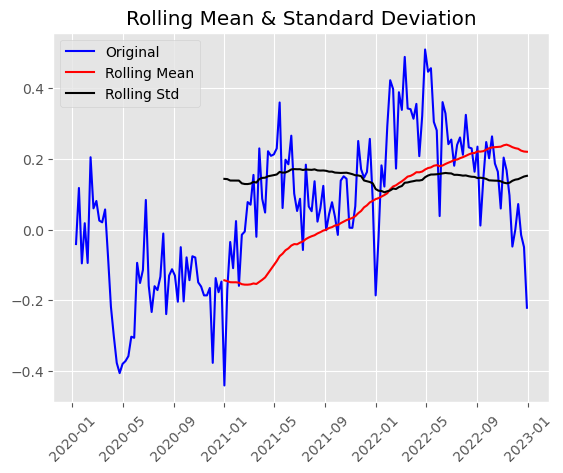

Results of Dickey-Fuller Test:
Test Statistic                  -1.823939
p-value                          0.368643
#Lags Used                       3.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [53]:
# dickey fuller test to check stationarity - 52 week window
check_stationarity(df, 52, df['bg_posts'])

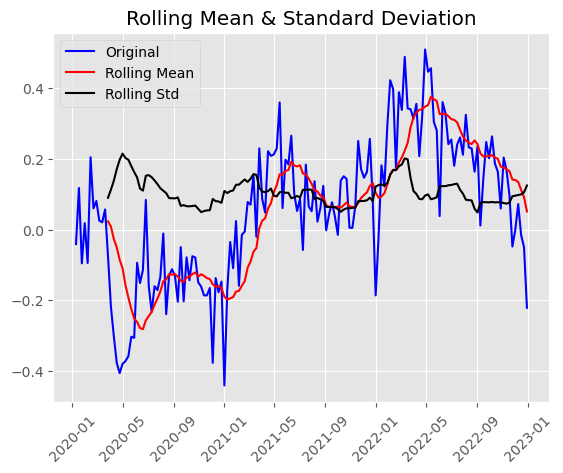

Results of Dickey-Fuller Test:
Test Statistic                  -1.823939
p-value                          0.368643
#Lags Used                       3.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [54]:
# dickey Fuller test to check stationarity - 12 week window
check_stationarity(df, 12, df['bg_posts'])

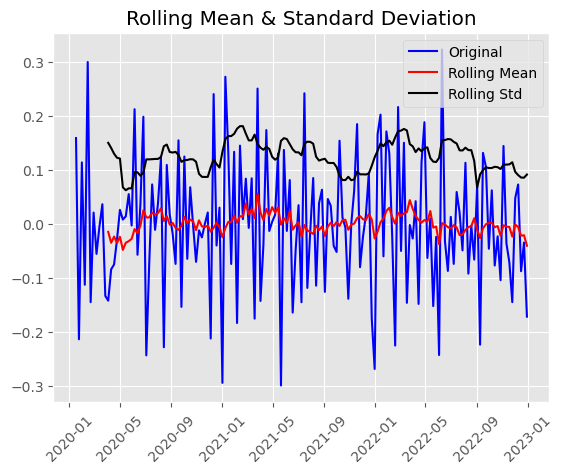

Results of Dickey-Fuller Test:
Test Statistic                -9.817304e+00
p-value                        5.454309e-17
#Lags Used                     2.000000e+00
Number of Observations Used    1.520000e+02
Critical Value (1%)           -3.474121e+00
Critical Value (5%)           -2.880750e+00
Critical Value (10%)          -2.577013e+00
dtype: float64


In [60]:
# this looks stationary, implies one degree of differencing needed
check_stationarity(df.diff(), 12, df['bg_posts'].diff().dropna())

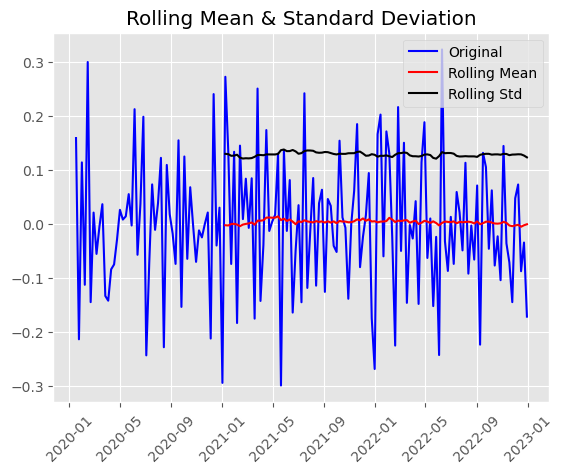

Results of Dickey-Fuller Test:
Test Statistic                -9.817304e+00
p-value                        5.454309e-17
#Lags Used                     2.000000e+00
Number of Observations Used    1.520000e+02
Critical Value (1%)           -3.474121e+00
Critical Value (5%)           -2.880750e+00
Critical Value (10%)          -2.577013e+00
dtype: float64


In [59]:
# this looks stationary, implies one degree of differencing needed
check_stationarity(df.diff(), 52, df['bg_posts'].diff().dropna())

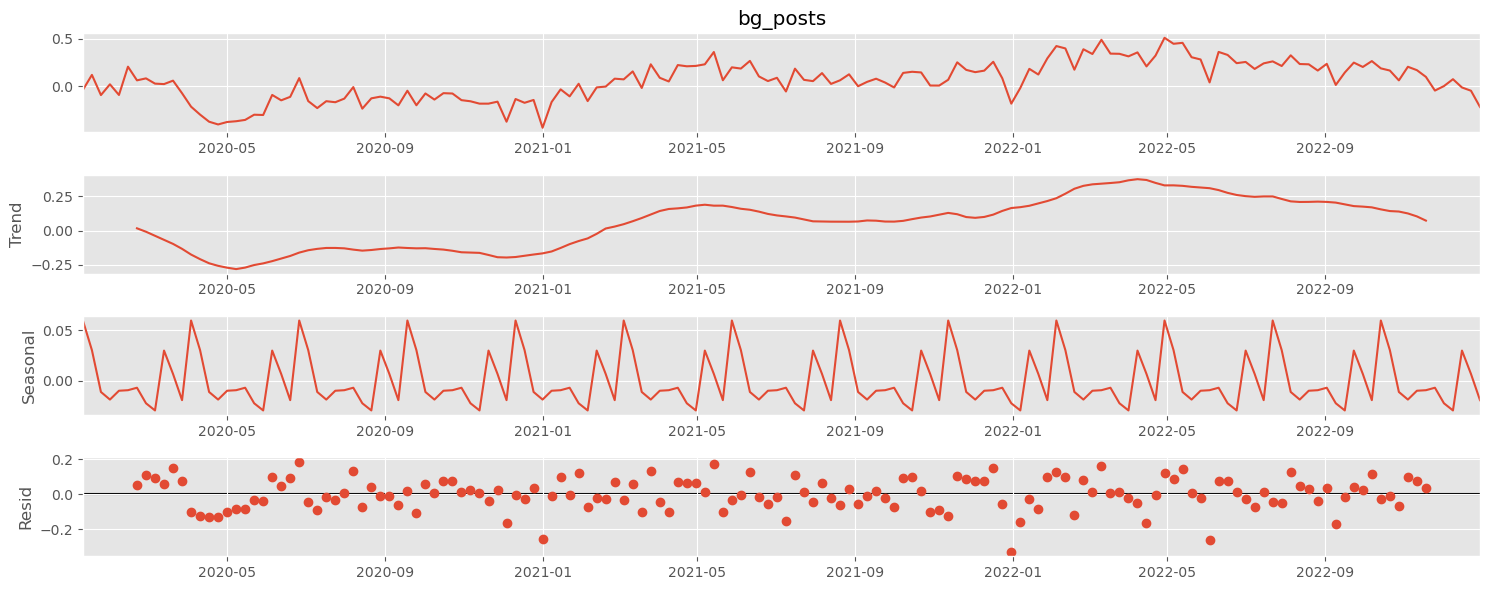

In [176]:
sd = seasonal_decompose(df, period=12)
sd.plot()
plt.show()

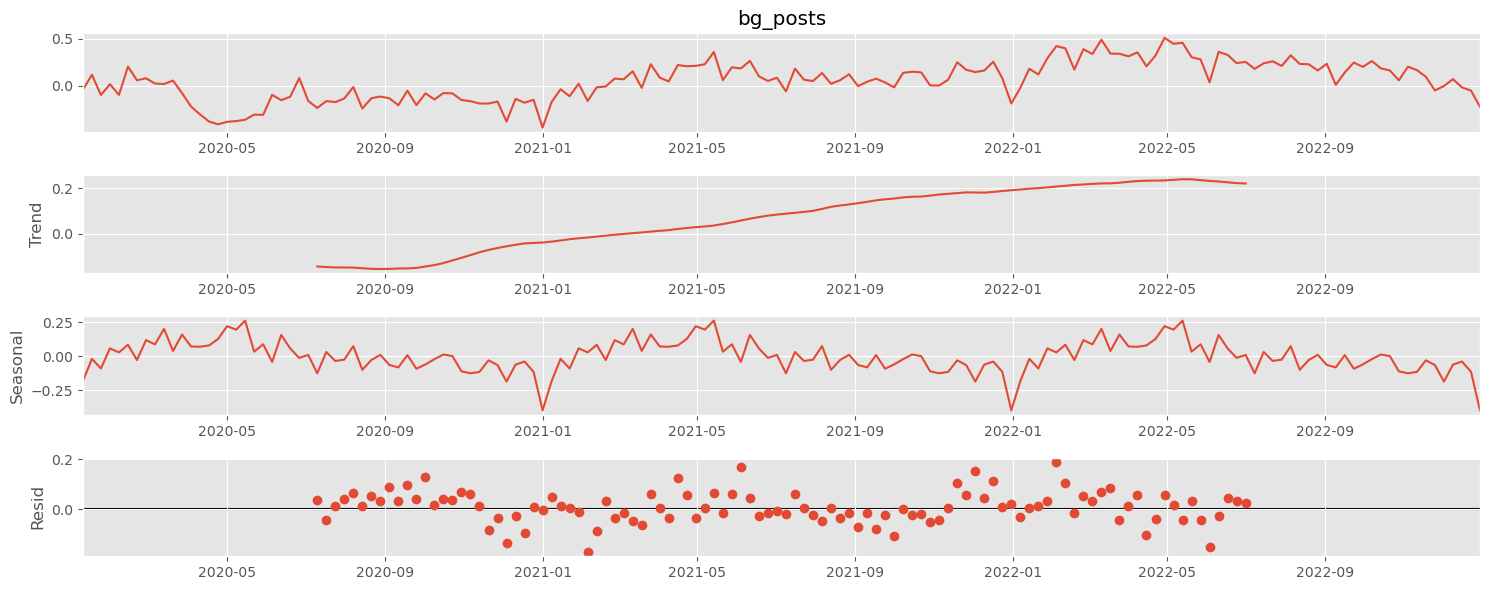

In [175]:
sd = seasonal_decompose(df, period=52)
sd.plot()
plt.show()

<AxesSubplot: xlabel='date'>

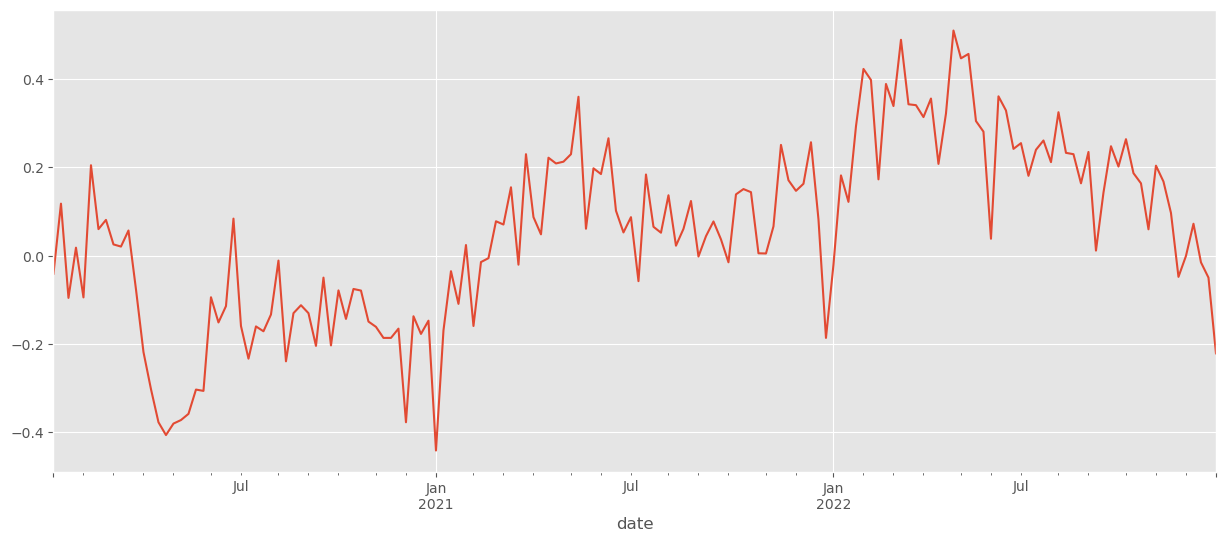

In [118]:
diff = df.dropna()
diff.plot()

<AxesSubplot: xlabel='date'>

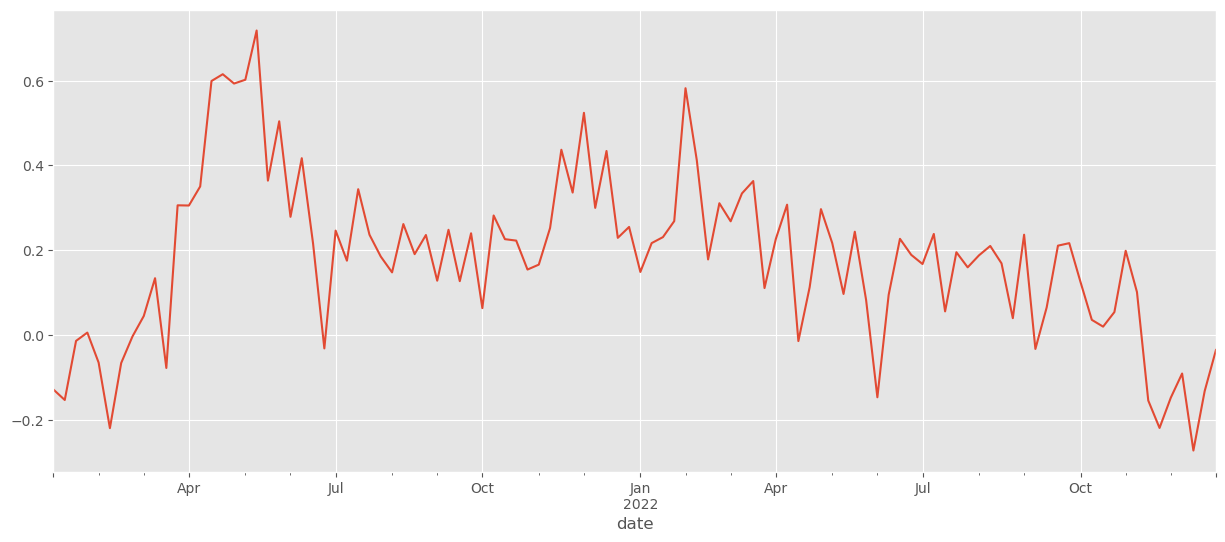

In [117]:
df_s_adj = diff - diff.shift(52)
df_s_adj = df_s_adj.dropna()
df_s_adj.plot()

In [77]:
df_monthly = df['bg_posts'].resample('MS').mean() # monthly frequency

df = df['bg_posts'].resample('W-FRI').mean()
df = df.fillna(df.bfill())
df.head()

date
2020-01-10   -0.0407
2020-01-17    0.1180
2020-01-24   -0.0954
2020-01-31    0.0183
2020-02-07   -0.0943
Freq: W-FRI, Name: bg_posts, dtype: float64

In [579]:
sd = seasonal_decompose(df_monthly, period=12)
sd.plot()
plt.show()

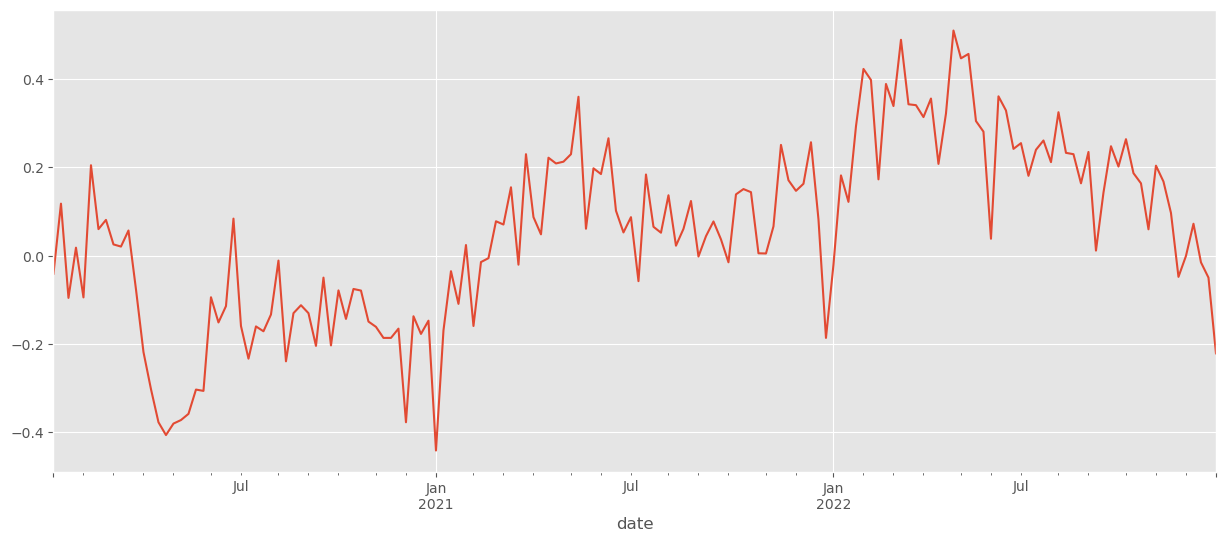

In [54]:
df.plot(figsize=(15, 6))
plt.show()

In [61]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (use 52 for frequency - yearly)
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [62]:
results = []

for comb in pdq:
    
    for combs in pdqs:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=df,
                                            order=comb,
                                            seasonal_order=combs)
                                            #enforce_invertibility=False, 
                                            #enforce_stationarity=False)

            output = mod.fit()
            results.append([comb, combs, output.aic])
            
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        
        except: 
            continue

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.40399D-01    |proj g|=  2.26146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     16      1     0     0   2.261D-04  -1.404D-01
  F = -0.14039867915566170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 0, 52): AIC Calculated=-41.80438789656645
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.



At iterate   10    f= -1.51941D-01    |proj g|=  1.00551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     16      1     0     0   9.248D-05  -1.519D-01
  F = -0.15194065710788707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 1, 52): AIC Calculated=-43.405485017660766
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28667D-02    |proj g|=  1.53860D+00

At iterate    5    f=  6.13551D-02    |proj g|=  1.09426D-06

 

 This problem is unconstrained.


ARIMA (0, 0, 0) x (0, 1, 0, 52): AIC Calculated=21.142788765382164
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48267D-01    |proj g|=  3.14050D+00


 This problem is unconstrained.



At iterate    5    f=  5.41722D-02    |proj g|=  6.27420D-02

At iterate   10    f=  5.39000D-02    |proj g|=  9.69997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     16      1     0     0   9.700D-06   5.390D-02
  F =   5.3899981440039199E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (0, 1, 1, 52): AIC Calculated=20.81679420929223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.42242D-01    |proj g|=  1.78347D-01


 This problem is unconstrained.



At iterate    5    f= -1.42620D-01    |proj g|=  9.14297D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   6.605D-07  -1.426D-01
  F = -0.14262041796551489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (1, 0, 0, 52): AIC Calculated=-40.497570405240644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38915D-01    |proj g|=  3.90152D-01


 This problem is unconstrained.



At iterate    5    f= -1.44182D-01    |proj g|=  1.74486D-01

At iterate   10    f= -1.48081D-01    |proj g|=  5.01669D-01

At iterate   15    f= -1.71927D-01    |proj g|=  6.20964D-03

At iterate   20    f= -1.72682D-01    |proj g|=  9.75467D-03

At iterate   25    f= -1.72939D-01    |proj g|=  1.06627D-02

At iterate   30    f= -1.72967D-01    |proj g|=  6.71227D-03

At iterate   35    f= -1.72972D-01    |proj g|=  1.61381D-03

At iterate   40    f= -1.72973D-01    |proj g|=  4.04139D-04

At iterate   45    f= -1.72973D-01    |proj g|=  3.21192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     51   

 This problem is unconstrained.



At iterate    5    f=  5.42982D-02    |proj g|=  2.17962D-02

At iterate   10    f=  5.39000D-02    |proj g|=  3.30572D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     17      1     0     0   2.992D-05   5.390D-02
  F =   5.3899981474985967E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (1, 1, 0, 52): AIC Calculated=20.81679422019562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48267D-01    |proj g|=  3.14050D+00


 This problem is unconstrained.



At iterate    5    f=  5.39037D-02    |proj g|=  1.15984D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   8.864D-06   5.390D-02
  F =   5.3899981473344932E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (1, 1, 1, 52): AIC Calculated=22.81679421968362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.50383D-01    |proj g|=  1.81963D+00

At iterate    5    f= -4.00013D-01    |proj g|=  2.94646D-01

At 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.01631D-01    |proj g|=  4.97785D-01

At iterate   10    f= -4.19332D-01    |proj g|=  1.91665D-01

At iterate   15    f= -4.20717D-01    |proj g|=  8.76351D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   4.993D-05  -4.207D-01
  F = -0.42071720512124228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 0, 1, 52): AIC Calculated=-125.26376799782759
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     32      1     0     0   2.815D-05  -1.338D-01
  F = -0.13380658717496435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 1, 0, 52): AIC Calculated=-37.74765519858888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.85880D-02    |proj g|=  1.06330D+00

At iterate    5    f= -1.30808D-01    |proj g|=  1.42326D-01

At iterate   10    f= -1.33868D-01    |proj g|=  2.93721D-03

At

 This problem is unconstrained.



At iterate   10    f= -4.12520D-01    |proj g|=  8.00577D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   8.006D-06  -4.125D-01
  F = -0.41251971117187747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1) x (1, 0, 0, 52): AIC Calculated=-122.70614988562576
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.50383D-01    |proj g|=  1.81963D+00


 This problem is unconstrained.



At iterate    5    f= -4.03479D-01    |proj g|=  5.91355D-01

At iterate   10    f= -4.15949D-01    |proj g|=  1.54487D-02

At iterate   15    f= -4.17500D-01    |proj g|=  3.75863D-01

At iterate   20    f= -4.28931D-01    |proj g|=  5.15442D-02

At iterate   25    f= -4.30749D-01    |proj g|=  2.71269D-02

At iterate   30    f= -4.31156D-01    |proj g|=  2.23399D-02

At iterate   35    f= -4.31228D-01    |proj g|=  1.27756D-02

At iterate   40    f= -4.31239D-01    |proj g|=  7.37215D-03

At iterate   45    f= -4.31241D-01    |proj g|=  1.11046D-04

At iterate   50    f= -4.31241D-01    |proj g|=  7.98064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.64202D-02    |proj g|=  1.07709D+00

At iterate    5    f= -1.29619D-01    |proj g|=  1.33454D-01

At iterate   10    f= -1.33815D-01    |proj g|=  2.88217D-02

At iterate   15    f= -1.33883D-01    |proj g|=  5.51474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   5.515D-05  -1.339D-01
  F = -0.13388344332821206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0

 This problem is unconstrained.



At iterate    5    f= -1.30901D-01    |proj g|=  1.43991D-01

At iterate   10    f= -1.33757D-01    |proj g|=  1.65486D-02

At iterate   15    f= -1.33883D-01    |proj g|=  7.61857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   1.200D-05  -1.339D-01
  F = -0.13388339777523345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 1, 1, 52): AIC Calculated=-33.771620105872834
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -6.90367D-01    |proj g|=  1.90289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     11      1     0     0   7.475D-06  -6.904D-01
  F = -0.69036725761692341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0) x (0, 0, 1, 52): AIC Calculated=-211.3945843764801
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96388D-01    |proj g|=  2.84435D+00

At iterate    5    f= -3.29214D-01    |proj g|=  1.87228D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      7     29      1     0     0   3.211D-04  -3.292D-01
  F = -0.32921425134848331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (0, 1, 0, 52): AIC Calculated=-100.71484642072679
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.29199D-01    |proj g|=  1.32453D-01

At iterate    5    f= -3.57544D-01    |proj g|=  1.24111D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     19      1     0     0   3.256D-04  -3.576D-01
  F = -0.35761504171511416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (0, 1, 1, 52): AIC Calculated=-107.57589301511561
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =         

 This problem is unconstrained.


At iterate   10    f= -6.93019D-01    |proj g|=  2.23694D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.485D-05  -6.930D-01
  F = -0.69301872214144311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 0, 0, 52): AIC Calculated=-212.22184130813025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.63340D-01    |proj g|=  1.93244D-01


 This problem is unconstrained.



At iterate    5    f= -6.91903D-01    |proj g|=  5.74749D-03

At iterate   10    f= -6.92545D-01    |proj g|=  9.56858D-02

At iterate   15    f= -6.93588D-01    |proj g|=  2.98666D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.927D-06  -6.936D-01
  F = -0.69359148546564164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0) x (1, 0, 1, 52): AIC Calculated=-210.4005434652802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.



At iterate    5    f= -3.57571D-01    |proj g|=  2.33972D-02

At iterate   10    f= -3.57615D-01    |proj g|=  3.22859D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     19      1     0     0   9.712D-05  -3.576D-01
  F = -0.35761505060241261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 1, 0, 52): AIC Calculated=-107.57589578795273
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.29199D-01    |proj g|=  1.32453D-01


 This problem is unconstrained.



At iterate    5    f= -3.57601D-01    |proj g|=  4.53462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   5.043D-05  -3.576D-01
  F = -0.35761504637058278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 1, 1, 52): AIC Calculated=-105.57589446762182
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.75169D-01    |proj g|=  2.54278D-02

At iterate    5    f= -7.75504D-01    |proj g|=  4.77998D-04

 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.96358D-01    |proj g|=  1.07187D-02

At iterate   10    f= -7.96469D-01    |proj g|=  9.63245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   9.632D-06  -7.965D-01
  F = -0.79646925325065687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (0, 0, 1, 52): AIC Calculated=-242.49840701420493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93627D-01    |proj g|=  1.23463D-01

A

 This problem is unconstrained.



At iterate   10    f= -3.93802D-01    |proj g|=  1.37918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     19      1     0     0   1.557D-04  -3.938D-01
  F = -0.39380188647585446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 0, 52): AIC Calculated=-118.8661885804666


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93627D-01    |proj g|=  1.25489D-01

At iterate    5    f= -4.21083D-01    |proj g|=  8.60838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     18      1     0     0   1.062D-05  -4.211D-01
  F = -0.42111750218689648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 1, 52): AIC Calculated=-125.3886606823117
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 

 This problem is unconstrained.



At iterate    5    f= -7.98685D-01    |proj g|=  7.47048D-02

At iterate   10    f= -7.98750D-01    |proj g|=  8.50735D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   6.335D-06  -7.987D-01
  F = -0.79874974501756824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (1, 0, 0, 52): AIC Calculated=-243.2099204454813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.75169D-01    |proj g|=  1.69167D-01


 This problem is unconstrained.



At iterate    5    f= -7.97721D-01    |proj g|=  9.17240D-03

At iterate   10    f= -7.97847D-01    |proj g|=  6.87711D-02

At iterate   15    f= -7.97950D-01    |proj g|=  8.46778D-02

At iterate   20    f= -7.98973D-01    |proj g|=  1.43566D-01

At iterate   25    f= -7.99518D-01    |proj g|=  3.59768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   6.373D-05  -7.995D-01
  F = -0.79951808196699869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 0, 1, 52): AIC Calculated=-241.4496415737036
RUNNING THE L-BFGS-B CODE

           * * *

M

 This problem is unconstrained.



At iterate    5    f= -4.21005D-01    |proj g|=  3.70582D-02

At iterate   10    f= -4.21116D-01    |proj g|=  9.29002D-04

At iterate   15    f= -4.21118D-01    |proj g|=  6.94547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   6.945D-05  -4.211D-01
  F = -0.42111750288852473     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 0, 52): AIC Calculated=-125.38866090121971
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.



At iterate    5    f= -4.21092D-01    |proj g|=  8.83715D-03

At iterate   10    f= -4.21107D-01    |proj g|=  2.93489D-02

At iterate   15    f= -4.21118D-01    |proj g|=  2.81573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   2.816D-05  -4.211D-01
  F = -0.42111750365934669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 1, 52): AIC Calculated=-123.38866114171617
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.36640D-01    |proj g|=  3.81546D-04

At iterate   10    f= -7.36641D-01    |proj g|=  6.43574D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   4.952D-06  -7.366D-01
  F = -0.73664066341765222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (0, 0, 1, 52): AIC Calculated=-223.8318869863075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.57541D-01    |proj g|=  3.49371D-02

At

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     21      1     0     0   2.826D-04  -3.576D-01
  F = -0.35759298089312919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 0, 52): AIC Calculated=-107.5690100386563
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.57541D-01    |proj g|=  1.15675D-01


 This problem is unconstrained.



At iterate    5    f= -3.79587D-01    |proj g|=  9.09002D-03

At iterate   10    f= -3.80291D-01    |proj g|=  2.91553D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   4.945D-04  -3.803D-01
  F = -0.38029109425186486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 1, 52): AIC Calculated=-112.65082140658184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.25702D-01    |proj g|=  3.33418D-01


 This problem is unconstrained.



At iterate    5    f= -7.29287D-01    |proj g|=  5.81889D-01

At iterate   10    f= -7.37750D-01    |proj g|=  3.76068D-03

At iterate   15    f= -7.37811D-01    |proj g|=  2.20475D-03

At iterate   20    f= -7.37816D-01    |proj g|=  2.00111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     40      1     0     0   2.001D-05  -7.378D-01
  F = -0.73781631503113054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 0, 0, 52): AIC Calculated=-224.19869028971274



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.10720D-01    |proj g|=  1.81071D-01

At iterate    5    f= -7.37461D-01    |proj g|=  2.14552D-03

At iterate   10    f= -7.37819D-01    |proj g|=  6.55072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   8.146D-06  -7.378D-01
  F = -0.73781903933321535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (1, 0, 1, 52): AIC Calculated=-222.1995402719632
RUN

 This problem is unconstrained.



At iterate    5    f= -3.79018D-01    |proj g|=  4.12591D-02

At iterate   10    f= -3.79174D-01    |proj g|=  1.12322D-01

At iterate   15    f= -3.80180D-01    |proj g|=  1.92988D-02

At iterate   20    f= -3.80186D-01    |proj g|=  7.17327D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   3.640D-04  -3.802D-01
  F = -0.38018633421875686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 1, 0, 52): AIC Calculated=-112.61813627625214
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =       

 This problem is unconstrained.



At iterate    5    f= -3.79294D-01    |proj g|=  1.10094D-02

At iterate   10    f= -3.80219D-01    |proj g|=  7.11549D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.80222D-01    |proj g|=  1.97341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     44      2     0     0   1.973D-04  -3.802D-01
  F = -0.38022166855365525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 1, 1, 52): AIC Calculated=-110.62916058874043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.89008D-01    |proj g|=  1.44194D-01

At iterate    5    f= -7.89287D-01    |proj g|=  1.79123D-01

A

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -8.10640D-01    |proj g|=  3.10622D-02

At iterate   10    f= -8.10668D-01    |proj g|=  4.90022D-03

At iterate   15    f= -8.10675D-01    |proj g|=  2.50858D-02

At iterate   20    f= -8.10779D-01    |proj g|=  4.79871D-02

At iterate   25    f= -8.10803D-01    |proj g|=  1.10081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   1.101D-05  -8.108D-01
  F = -0.81080266399124046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 0, 1, 52): AIC Calculated=-244.97043116526703
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.



At iterate    5    f= -4.02839D-01    |proj g|=  2.99962D-02

At iterate   10    f= -4.02929D-01    |proj g|=  2.20160D-02

At iterate   15    f= -4.03330D-01    |proj g|=  8.93908D-02

At iterate   20    f= -4.03389D-01    |proj g|=  1.48273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   1.923D-04  -4.034D-01
  F = -0.40338907170488086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 0, 52): AIC Calculated=-119.85739037192283
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =       

 This problem is unconstrained.



At iterate    5    f= -4.29755D-01    |proj g|=  6.79850D-03

At iterate   10    f= -4.29796D-01    |proj g|=  9.63017D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     20      1     0     0   1.066D-04  -4.298D-01
  F = -0.42979603103405867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 1, 52): AIC Calculated=-126.09636168262631
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.02648D-01    |proj g|=  4.23456D-01


 This problem is unconstrained.



At iterate    5    f= -8.12667D-01    |proj g|=  2.18992D-02

At iterate   10    f= -8.12701D-01    |proj g|=  7.55498D-02

At iterate   15    f= -8.12755D-01    |proj g|=  1.08171D-03

At iterate   20    f= -8.12767D-01    |proj g|=  1.90905D-02

At iterate   25    f= -8.12834D-01    |proj g|=  1.09846D-02

At iterate   30    f= -8.12835D-01    |proj g|=  1.40499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     38      1     0     0   8.133D-06  -8.128D-01
  F = -0.81283538551282652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1) x (1, 0, 0, 52): AIC Calculated=-24

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.89008D-01    |proj g|=  1.67301D-01

At iterate    5    f= -8.11877D-01    |proj g|=  1.98279D-02

At iterate   10    f= -8.12178D-01    |proj g|=  3.06193D-02

At iterate   15    f= -8.13326D-01    |proj g|=  2.75555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     20      1     0     0   2.756D-03  -8.133D-01
  F = -0.81332582026574307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.79455D-01    |proj g|=  1.72178D-01

At iterate    5    f= -4.29557D-01    |proj g|=  7.85010D-03

At iterate   10    f= -4.29623D-01    |proj g|=  2.35467D-03

At iterate   15    f= -4.29623D-01    |proj g|=  3.13549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     24      1     0     0   3.135D-03  -4.296D-01
  F = -0.42962336124123485     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 0, 52): AIC Calculated=-126.

 This problem is unconstrained.



At iterate    5    f= -4.29643D-01    |proj g|=  1.03929D-02

At iterate   10    f= -4.29663D-01    |proj g|=  3.37137D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   2.007D-04  -4.297D-01
  F = -0.42967607599851182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 1, 52): AIC Calculated=-124.0589357115357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.56051D-01    |proj g|=  3.56682D-02

At

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.78533D-01    |proj g|=  8.67602D-03

At iterate   10    f= -7.78590D-01    |proj g|=  3.29448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   4.687D-06  -7.786D-01
  F = -0.77858981509107472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 0) x (0, 0, 1, 52): AIC Calculated=-236.9200223084153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.81105D-01    |proj g|=  4.60342D-02

At

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     35      2     0     0   1.787D-04  -3.811D-01
  F = -0.38112441873646652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (0, 1, 0, 52): AIC Calculated=-114.91081864577755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.81105D-01    |proj g|=  1.29076D-01


 This problem is unconstrained.



At iterate    5    f= -4.09000D-01    |proj g|=  9.59215D-03

At iterate   10    f= -4.09052D-01    |proj g|=  1.59619D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     30      1     0     0   5.521D-05  -4.091D-01
  F = -0.40905169363273591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (0, 1, 1, 52): AIC Calculated=-121.6241284134136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.78833D-01    |proj g|=  6.19837D-01


 This problem is unconstrained.



At iterate    5    f= -7.80277D-01    |proj g|=  5.43336D-02

At iterate   10    f= -7.80288D-01    |proj g|=  2.89590D-03

At iterate   15    f= -7.80288D-01    |proj g|=  6.32683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     23      1     0     0   6.327D-04  -7.803D-01
  F = -0.78028824085355131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 0, 0, 52): AIC Calculated=-237.44993114630802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.



At iterate    5    f= -7.79534D-01    |proj g|=  9.69384D-03

At iterate   10    f= -7.80496D-01    |proj g|=  8.32505D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -7.80549D-01    |proj g|=  1.04042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     54      2     0     0   1.040D-04  -7.805D-01
  F = -0.78054891492556855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA (1, 1, 0) x (1, 0, 1, 52): AIC Calculated=-235.53126145677737
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.04311D-01    |proj g|=  7.71809D-01


 This problem is unconstrained.



At iterate    5    f= -4.09030D-01    |proj g|=  2.33612D-02

At iterate   10    f= -4.09053D-01    |proj g|=  2.98357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   1.099D-04  -4.091D-01
  F = -0.40905305829228766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 0, 52): AIC Calculated=-121.62455418719375
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.81105D-01    |proj g|=  1.29172D-01


 This problem is unconstrained.



At iterate    5    f= -4.09051D-01    |proj g|=  9.56790D-04

At iterate   10    f= -4.09052D-01    |proj g|=  4.18559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   8.073D-05  -4.091D-01
  F = -0.40905223806078295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 1, 52): AIC Calculated=-119.62429827496427
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.74829D-01    |proj g|=  2.46395D-02

A

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -7.95504D-01    |proj g|=  4.14583D-02

At iterate   10    f= -7.96404D-01    |proj g|=  3.15055D-03

At iterate   15    f= -7.96452D-01    |proj g|=  2.69304D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   4.080D-06  -7.965D-01
  F = -0.79647756960552762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 1) x (0, 0, 1, 52): AIC Calculated=-240.50100171692463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.



At iterate   10    f= -3.93737D-01    |proj g|=  1.86792D-02

At iterate   15    f= -3.93818D-01    |proj g|=  4.27859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     28      1     0     0   2.215D-04  -3.938D-01
  F = -0.39383252127314550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 1, 0, 52): AIC Calculated=-116.8757466372214
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93560D-01    |proj g|=  1.25512D-01


 This problem is unconstrained.



At iterate    5    f= -4.20874D-01    |proj g|=  6.76444D-03

At iterate   10    f= -4.21150D-01    |proj g|=  6.42271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   2.206D-04  -4.212D-01
  F = -0.42115257022043667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 1, 1, 52): AIC Calculated=-123.39960190877625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.97009D-01    |proj g|=  6.73643D-01


 This problem is unconstrained.



At iterate    5    f= -7.98612D-01    |proj g|=  5.55295D-02

At iterate   10    f= -7.98699D-01    |proj g|=  2.16314D-02

At iterate   15    f= -7.98755D-01    |proj g|=  1.53889D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   7.406D-06  -7.988D-01
  F = -0.79875492308646145     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 1) x (1, 0, 0, 52): AIC Calculated=-241.21153600297598


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.74829D-01    |proj g|=  1.69972D-01

At iterate    5    f= -7.97611D-01    |proj g|=  8.81377D-02

At iterate   10    f= -7.97686D-01    |proj g|=  3.72646D-02

At iterate   15    f= -7.98200D-01    |proj g|=  2.45171D-01

At iterate   20    f= -7.98597D-01    |proj g|=  4.98966D-03

At iterate   25    f= -7.98946D-01    |proj g|=  2.66889D-01

At iterate   30    f= -7.99520D-01    |proj g|=  3.00399D-03

At iterate   35    f= -7.99521D-01    |proj g|=  4.26041D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f= -4.20929D-01    |proj g|=  3.67924D-02

At iterate   10    f= -4.21028D-01    |proj g|=  1.90341D-02

At iterate   15    f= -4.21138D-01    |proj g|=  6.70207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     35      1     0     0   1.141D-04  -4.212D-01
  F = -0.42115903742656685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA (1, 1, 1) x (1, 1, 0, 52): AIC Calculated=-123.40161967708886
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93560D-01    |proj g|=  1.25512D-01


 This problem is unconstrained.



At iterate    5    f= -4.21029D-01    |proj g|=  7.42698D-03

At iterate   10    f= -4.21045D-01    |proj g|=  3.14633D-02

At iterate   15    f= -4.21108D-01    |proj g|=  5.02243D-02

At iterate   20    f= -4.21156D-01    |proj g|=  6.23967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   2.032D-05  -4.212D-01
  F = -0.42115614000696028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 1, 1, 52): AIC Calculated=-121.40071568217161


In [63]:
results_df = pd.DataFrame(results, columns=['pdq', 'pdqs', 'aic'])
results_df.loc[results_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (1, 0, 0, 52)
aic        -245.60464
Name: 44, dtype: object

In [64]:
order = results_df.iloc[results_df.loc[results_df['aic'].idxmin()].name]['pdq']
seasonal_order = results_df.iloc[results_df.loc[results_df['aic'].idxmin()].name]['pdqs']

In [129]:
#order_52 = results_df.iloc[results_df.loc[results_df['aic'].idxmin()].name]['pdq']
#seasonal_order_52 = results_df.iloc[results_df.loc[results_df['aic'].idxmin()].name]['pdqs']

In [150]:
# Plug the optimal parameter values into a new SARIMAX model
mod = sm.tsa.statespace.SARIMAX(df, 
                                order=order,
                                seasonal_order=seasonal_order)
                                #enforce_invertibility=False, 
                                #enforce_stationarity=False)

# Fit the model and print results
output = mod.fit()
print(output.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.02648D-01    |proj g|=  4.23456D-01


 This problem is unconstrained.



At iterate    5    f= -8.12667D-01    |proj g|=  2.18992D-02

At iterate   10    f= -8.12701D-01    |proj g|=  7.55498D-02

At iterate   15    f= -8.12755D-01    |proj g|=  1.08171D-03

At iterate   20    f= -8.12767D-01    |proj g|=  1.90905D-02

At iterate   25    f= -8.12834D-01    |proj g|=  1.09846D-02

At iterate   30    f= -8.12835D-01    |proj g|=  1.40499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     38      1     0     0   8.133D-06  -8.128D-01
  F = -0.81283538551282652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Resul

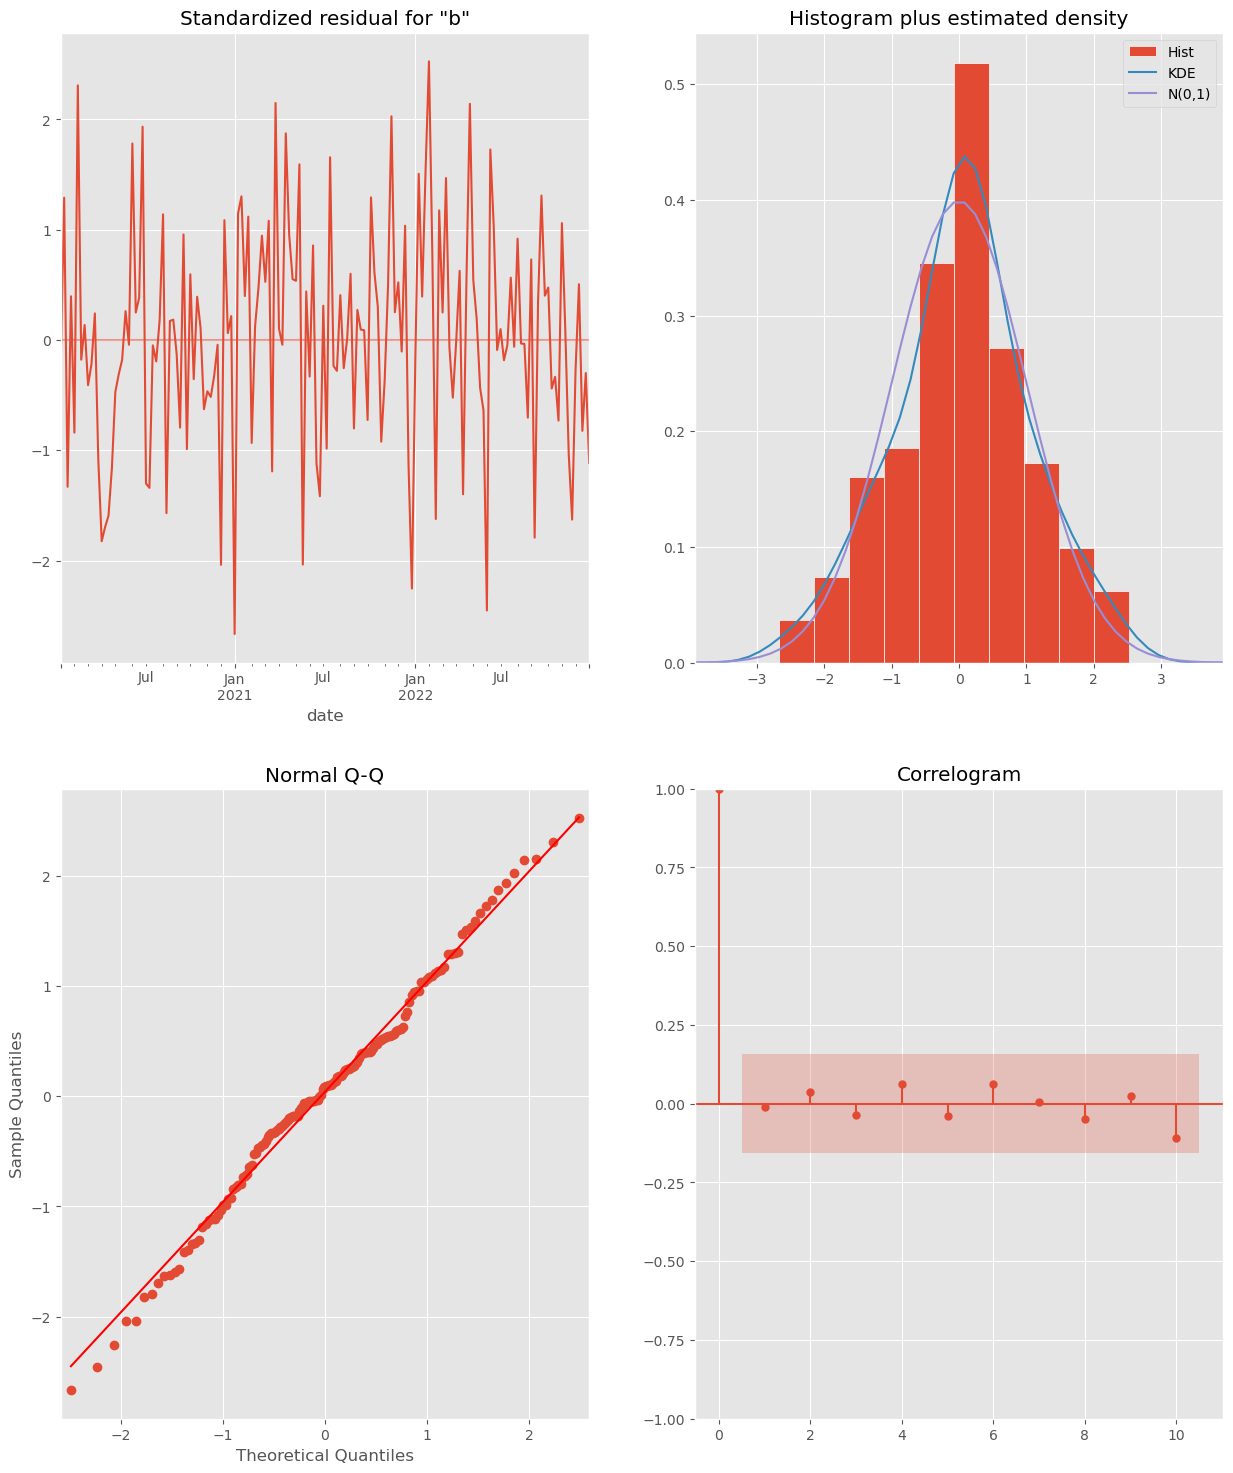

In [151]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [152]:
pred = output.get_prediction(start=pd.to_datetime('2022-01-07'), dynamic=True)
pred_conf = pred.conf_int()

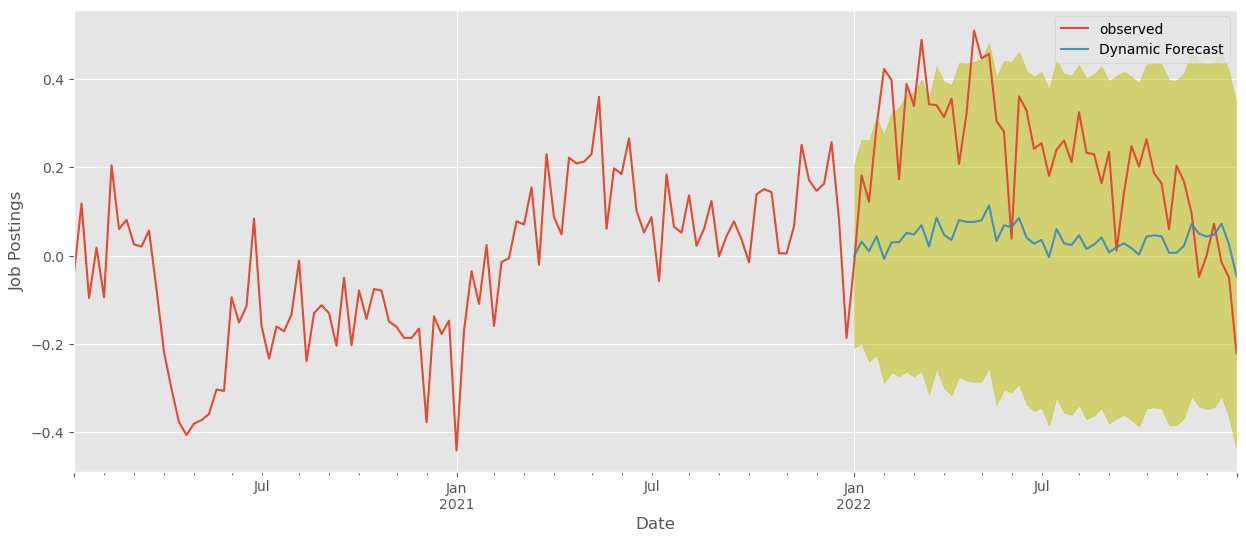

In [153]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6 #matplotlib runtime configuration

# Plot observed values
ax = df.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='y', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Job Postings')
plt.legend()

plt.show()

In [154]:
# Get the real and predicted values
jobs_forecasted = pred.predicted_mean
jobs_truth = df['2022-01-07':]

# Compute the mean square error
mse = ((jobs_forecasted - jobs_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.05


In [79]:
#jobs_forecasted[1] - jobs_truth[1]

In [80]:
# Get forecast 1yr ahead in future
prediction = output.get_forecast(steps=52)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [544]:
#forecast = output.predict(start=df.shape[0], end=df.shape[0] + 8)
#forecast

In [81]:
prediction.predicted_mean[:10]

2023-01-06   -0.114719
2023-01-13   -0.055429
2023-01-20   -0.066422
2023-01-27   -0.015941
2023-02-03    0.023354
2023-02-10    0.021015
2023-02-17   -0.034971
2023-02-24    0.026671
2023-03-03    0.017052
2023-03-10    0.060688
Freq: W-FRI, Name: predicted_mean, dtype: float64

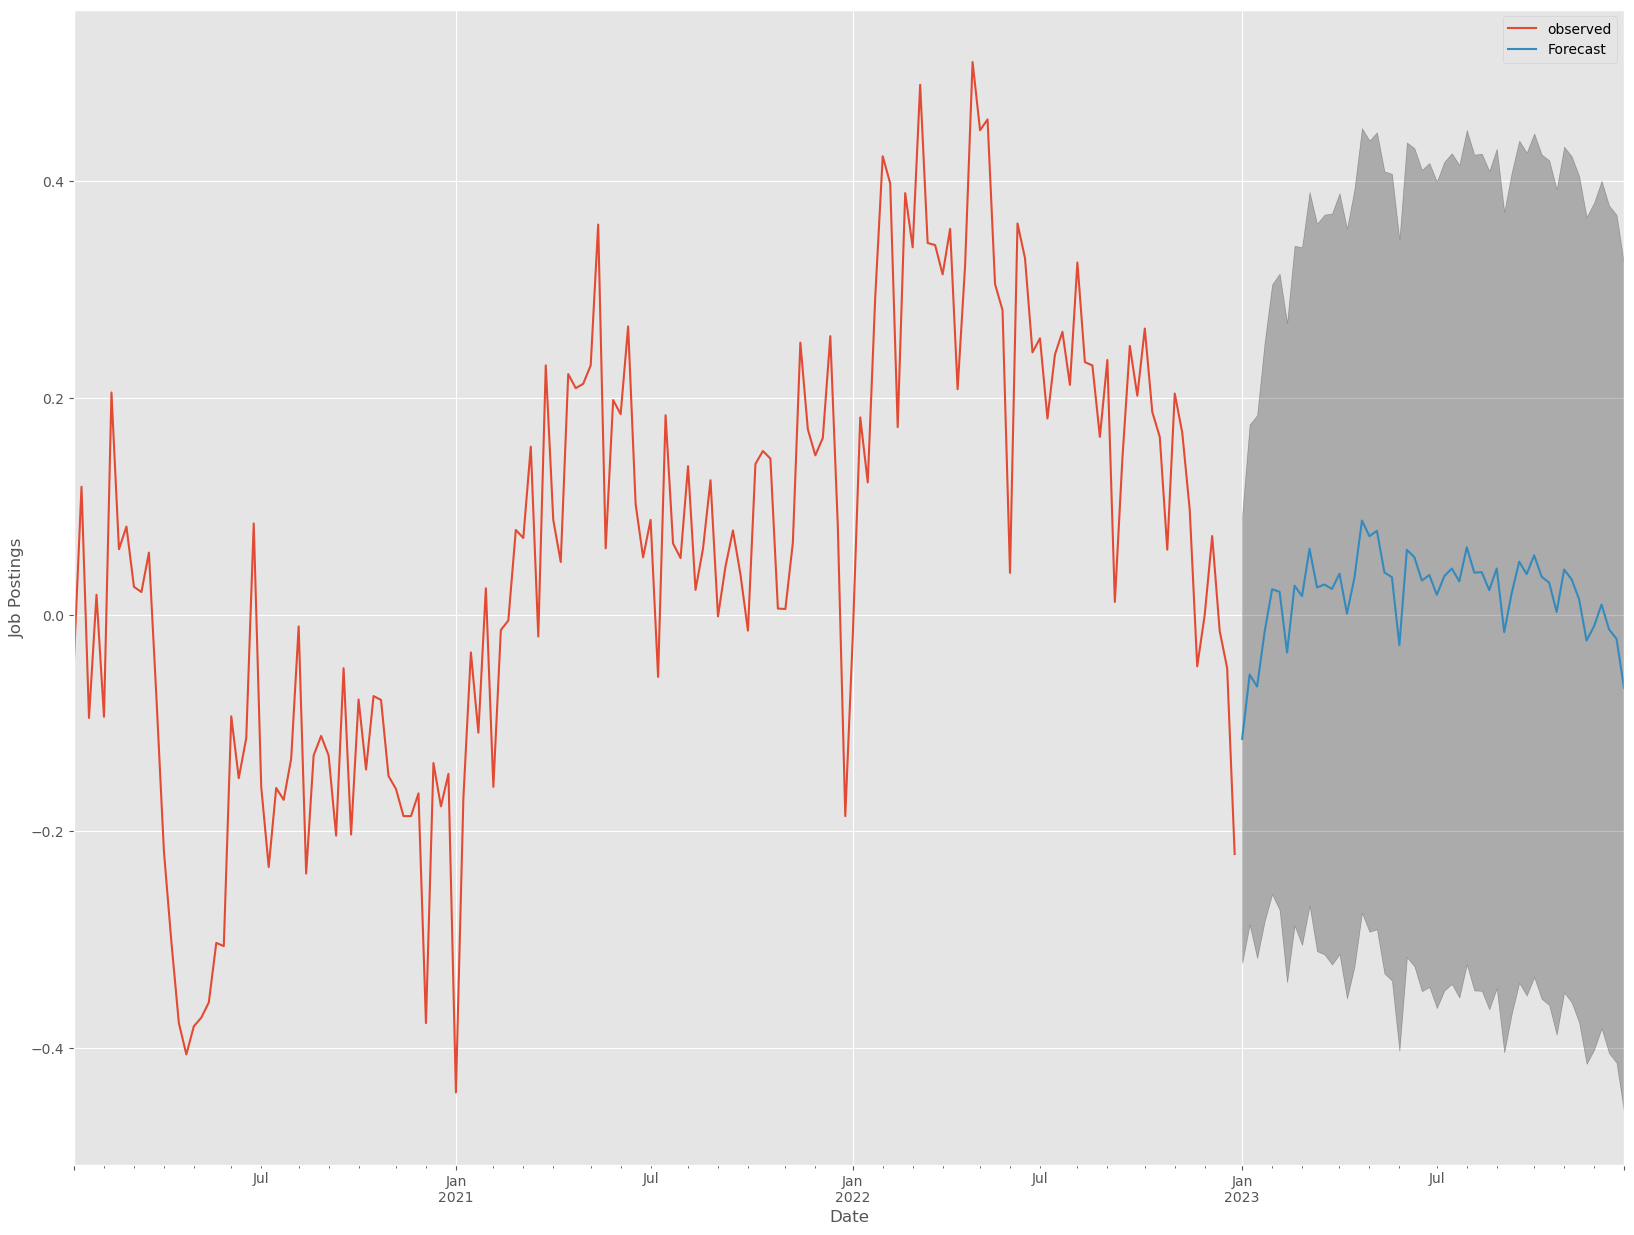

In [82]:
# Plot future predictions with confidence intervals
ax = df.plot(label='observed', figsize=(20, 15))

prediction.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)

ax.set_xlabel('Date')
ax.set_ylabel('Job Postings')

plt.legend()
plt.show()

#### Train Test Split

In [89]:
df.head() # weekly data

date
2020-01-10   -0.0407
2020-01-17    0.1180
2020-01-24   -0.0954
2020-01-31    0.0183
2020-02-07   -0.0943
Freq: W-FRI, Name: bg_posts, dtype: float64

In [90]:
# data needs to stay in chronological order so we cut off last 80% and set aside for test
cutoff = round(df.shape[0]*0.8) 
cutoff

125

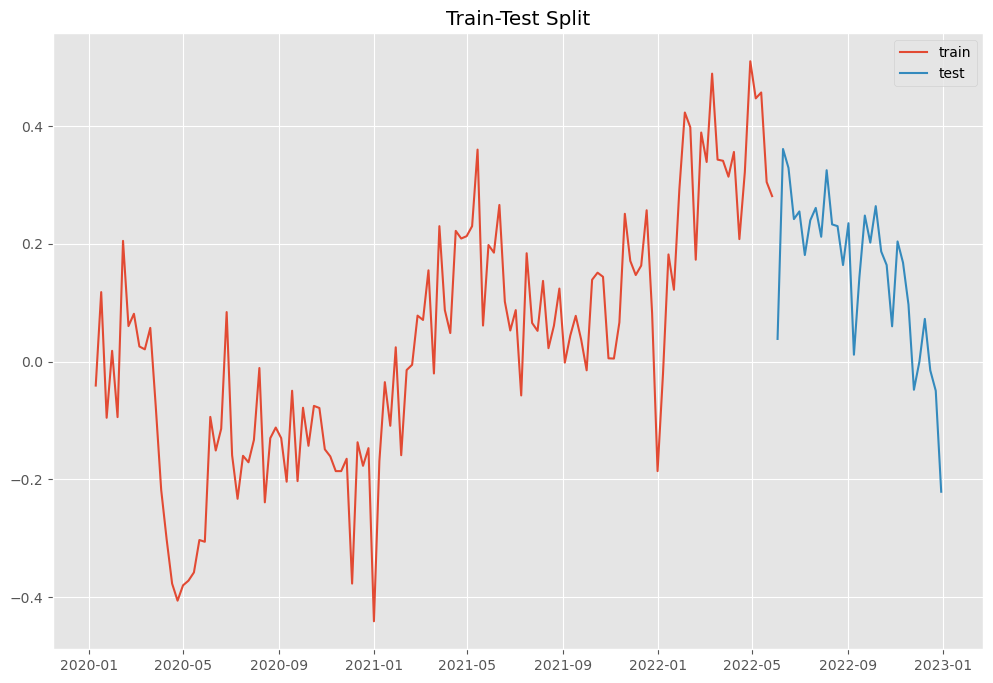

In [129]:
# train test split
train = df[:cutoff]
test = df[cutoff:]

# visualizing split
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [92]:
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84] [ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13

In [93]:
train_with_ind = train.reset_index()

In [185]:
order_52

(1, 0, 1)

In [94]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 0, 1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

0.11623070392021657
0.1658068259880681
0.18453464278901135
0.1281475316229865
0.37522835264206783


In [190]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

0.21855766439680074
0.19926201742447877
0.09911119738964623
0.10524074295630546
0.3981136068001826


In [189]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

0.30261965367816046
0.1954849863183548
0.10282301812443947
0.10566157420918747
0.3873463613596733


Our differenced series shows negative significant correlation at a lag of 1, which suggests adding 1 MA term

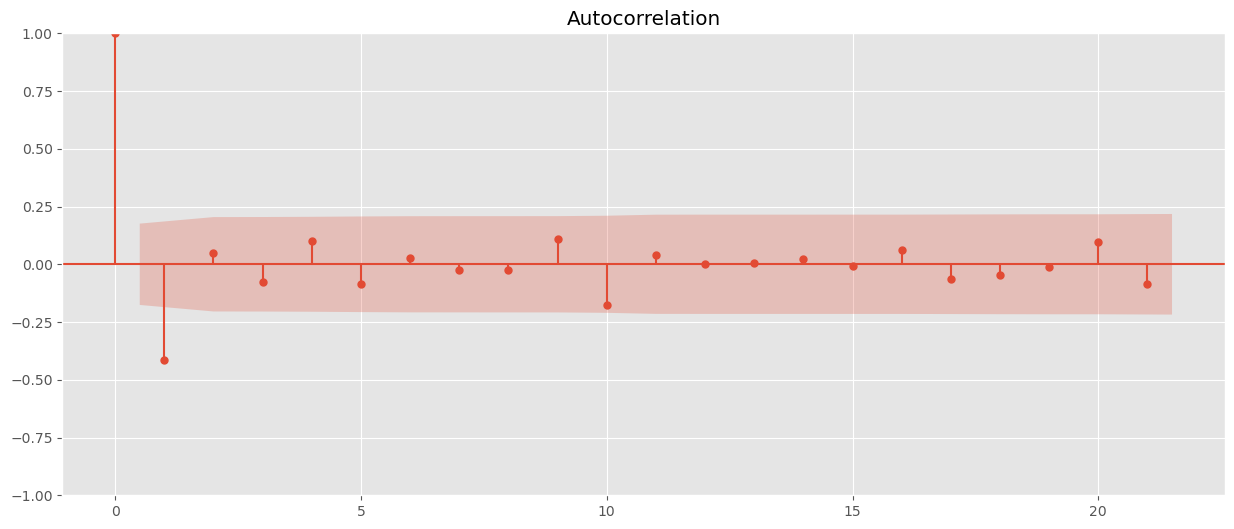

In [193]:
plot_acf(train.diff().dropna()); # 1 lag

- A sharp drop after lag "k" suggests an AR-k model. In this case, k=1
- A gradual decline suggests an MA.

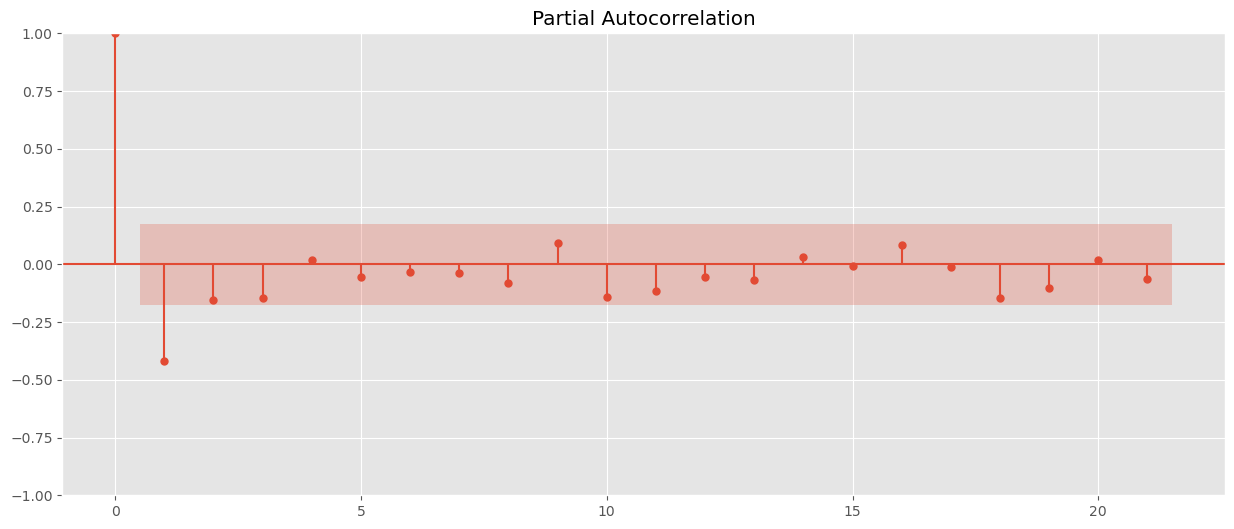

In [191]:
plot_pacf(train.diff().dropna()); 

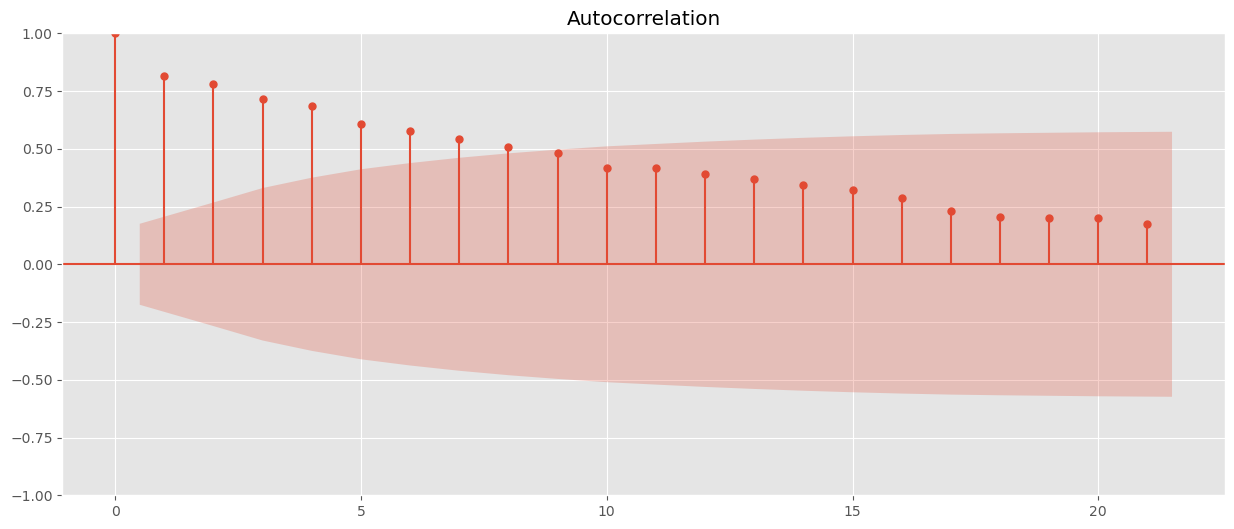

In [192]:
plot_acf(train); # period of 9-10 weeks

In [96]:
print(order)
seasonal_order

(1, 0, 1)


(1, 0, 0, 52)

In [131]:
# sari_mod = sm.tsa.statespace.SARIMAX(train,
#                                      order=order,
#                                      seasonal_order=seasonal_order,
#                                      enforce_stationarity=True,
#                                      enforce_invertibility=True).fit()

In [130]:
# display(sari_mod.summary())
# sari_mod.plot_diagnostics(figsize=(15, 18))
# plt.show()

Train / val on Sarima model

In [136]:
# dynamic
errors = []
for train_ind, val_ind in split.split(train_with_ind):
    sarimax = sm.tsa.statespace.SARIMAX(endog=train_with_ind.iloc[train_ind, -1],
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=True,
                                        enforce_invertibility=True).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1], dynamic=True)
    true = train_with_ind.iloc[val_ind, -1]
    error = np.sqrt(mean_squared_error(true, preds))
    errors.append(error)

[0.16725511758360487, 0.14395392598863074, 0.15686205745801654, 0.11640142096106322, 0.3239794163805492]


In [ ]:
print(errors)

In [138]:
# static / one step ahead
errors = []
for train_ind, val_ind in split.split(train_with_ind):
    sarimax = sm.tsa.statespace.SARIMAX(endog=train_with_ind.iloc[train_ind, -1],
                                        order=order,
                                        seasonal_order=seasonal_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1], dynamic=True)
    true = train_with_ind.iloc[val_ind, -1]
    error = np.sqrt(mean_squared_error(true, preds))
    errors.append(error)

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.



At iterate    5    f= -3.17669D-01    |proj g|=  6.02107D-01

At iterate   10    f= -3.31166D-01    |proj g|=  4.62468D-01

At iterate   15    f= -3.34393D-01    |proj g|=  3.22404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.066D-05  -3.344D-01
  F = -0.33439304746691451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42774D-01    |proj g|=  1.02686D+00


 This problem is unconstrained.



At iterate    5    f= -3.80381D-01    |proj g|=  2.73700D+00

At iterate   10    f= -4.09324D-01    |proj g|=  5.12258D-01

At iterate   15    f= -4.32449D-01    |proj g|=  1.08042D-01

At iterate   20    f= -4.32582D-01    |proj g|=  2.28824D-02

At iterate   25    f= -4.32616D-01    |proj g|=  2.70927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   4.050D-05  -4.326D-01
  F = -0.43261644494866996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[0.18590659615007044,
 0.14090778202625834,
 0.18078085547767916,
 0.11392760504509068,
 0.32896169706255]

In [139]:
print(errors)

[0.18590659615007044, 0.14090778202625834, 0.18078085547767916, 0.11392760504509068, 0.32896169706255]


In [96]:
train.tail()

date
2022-04-29    0.510
2022-05-06    0.447
2022-05-13    0.457
2022-05-20    0.305
2022-05-27    0.281
Freq: W-FRI, Name: bg_posts, dtype: float64

In [140]:
#valid = train[val_ind[0]:]

# y_hat_train = sarimax.predict(typ='levels')
# y_hat_val = sarimax.predict(start=val_ind[0], end=val_ind[-1],typ='levels')

# fig, ax = plt.subplots()
# ax.plot(train, label='train')
# ax.plot(valid, label='validation') # valid
# ax.plot(y_hat_train, label='train_pred')
# ax.plot(y_hat_val, label='val_pred')

# plt.legend();

In [141]:
# # Let's zoom in on validation
# fig, ax = plt.subplots()

# ax.plot(valid, label='true')
# ax.plot(y_hat_val, label='pred')

# plt.legend();

In [105]:
# print(np.sqrt(mean_squared_error(valid, y_hat_val)))
# print(np.sqrt(mean_squared_error(train, y_hat_train)))

0.12100707023898231
0.10948173385866404


In [142]:
sari_mod = sm.tsa.statespace.SARIMAX(train,
                                     order=order,
                                     seasonal_order=seasonal_order,
                                     enforce_stationarity=True,
                                     enforce_invertibility=True).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.57395D-01    |proj g|=  1.81562D-01


 This problem is unconstrained.



At iterate    5    f= -7.87491D-01    |proj g|=  2.13594D-02

At iterate   10    f= -7.87852D-01    |proj g|=  6.87789D-02

At iterate   15    f= -7.87870D-01    |proj g|=  6.99364D-03

At iterate   20    f= -7.88014D-01    |proj g|=  3.48942D-02

At iterate   25    f= -7.88384D-01    |proj g|=  8.53734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   8.556D-06  -7.884D-01
  F = -0.78838561286477582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


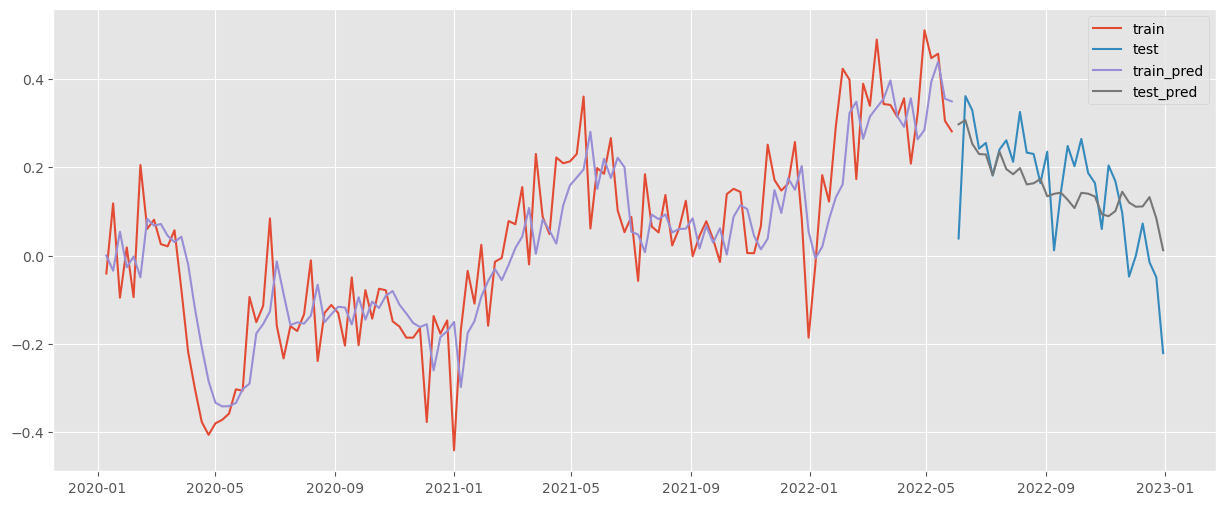

In [143]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels', dynamic=True)

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test') # valid
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

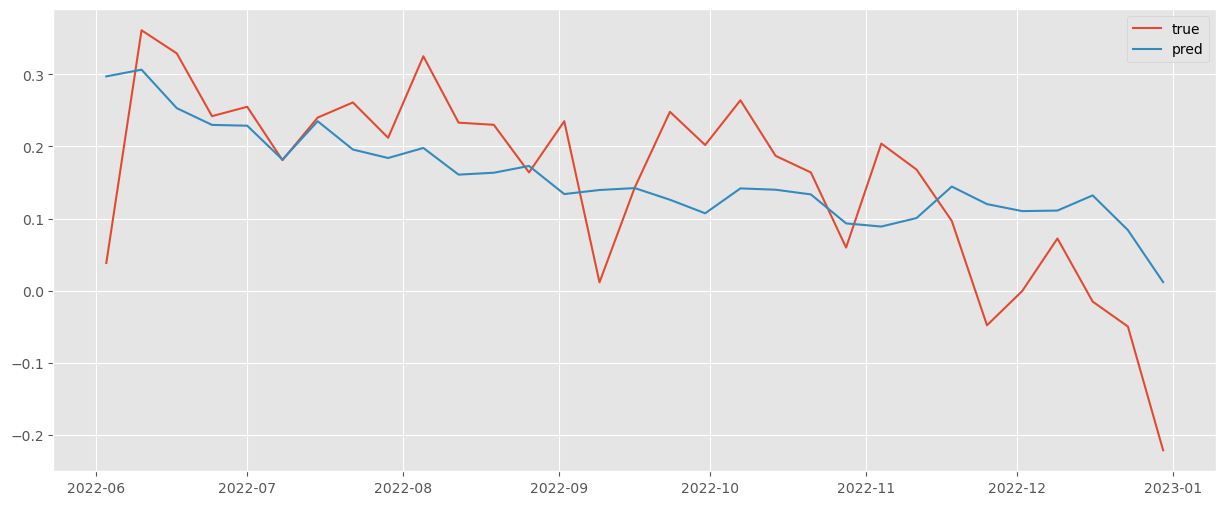

In [144]:
# Let's zoom in on validation
fig, ax = plt.subplots()

ax.plot(test, label='true')
ax.plot(y_hat_test, label='pred')

plt.legend();

In [145]:
# sari_mod = sm.tsa.statespace.SARIMAX(train,
#                                      order=order,
#                                      seasonal_order=seasonal_order,
#                                      enforce_stationarity=True,
#                                      enforce_invertibility=True).fit()

In [146]:
sari_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            bg_posts   No. Observations:                  125
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                  98.548
Date:                             Tue, 24 Jan 2023   AIC                           -189.096
Time:                                     20:18:27   BIC                           -177.783
Sample:                                 01-10-2020   HQIC                          -184.500
                                      - 05-27-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9536      0.031     30.506      0.000       0.892       1.015
ma.L1         -0.4428      0.091     -4.870      0.000      -0.621      -0.265
ar.S.L52       0.2578      0.099      2.594      0.009       0.063       0.453
sigma2         0.0116      0.002      7.627      0.000       0.009       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.75   Prob(JB):                         0.95
Heteroskedasticity (H):               1.10   Skew:                            -0.06
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
y_hat_train = sari_mod.predict(typ='levels', dynamic=True)
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels', dynamic=True)

In [148]:
print(np.sqrt(mean_squared_error(train, y_hat_train)))
print(np.sqrt(mean_squared_error(test, y_hat_test)))

0.21240209731921197
0.10358723013923056


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.02648D-01    |proj g|=  4.23456D-01


 This problem is unconstrained.



At iterate    5    f= -8.12667D-01    |proj g|=  2.18992D-02

At iterate   10    f= -8.12701D-01    |proj g|=  7.55498D-02

At iterate   15    f= -8.12755D-01    |proj g|=  1.08171D-03

At iterate   20    f= -8.12767D-01    |proj g|=  1.90905D-02

At iterate   25    f= -8.12834D-01    |proj g|=  1.09846D-02

At iterate   30    f= -8.12835D-01    |proj g|=  1.40499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     38      1     0     0   8.133D-06  -8.128D-01
  F = -0.81283538551282652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


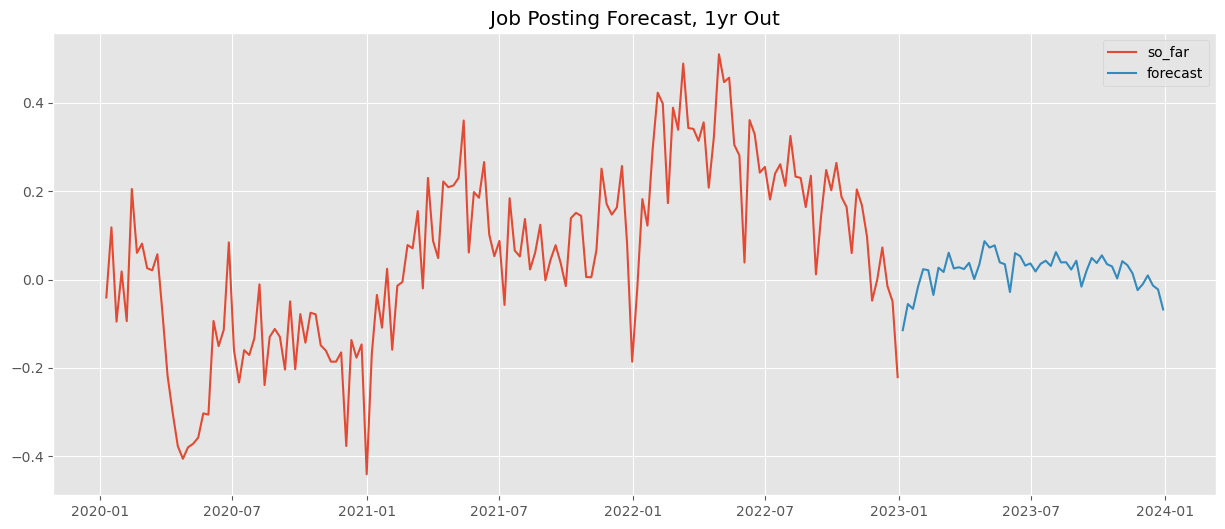

In [149]:
# Forecast

# training model on full series
sari_mod_final = sm.tsa.statespace.SARIMAX(df,
                                           order=order,
                                           seasonal_order=seasonal_order,
                                           enforce_stationarity=True,
                                           enforce_invertibility=True).fit()

forecast = sari_mod_final.forecast(steps=52, dynamic=True)

fig, ax = plt.subplots()
ax.plot(df, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('Job Posting Forecast, 1yr Out')

plt.legend();

#### Facebook Prophet Model

In [408]:
from prophet import Prophet

In [565]:
df_prophet = job_postings_national[['date', 'bg_posts']]
df_prophet = df_prophet.rename(columns={'date': 'ds', 'bg_posts': 'y'})

In [566]:
Model = Prophet(interval_width=0.95)
Model.fit(df_prophet)

17:37:42 - cmdstanpy - INFO - Chain [1] start processing
17:37:42 - cmdstanpy - INFO - Chain [1] done processing


In [567]:
future_dates = Model.make_future_dataframe(periods=52, freq='W-SAT')
future_dates.tail()

ds
203 2023-11-25
204 2023-12-02
205 2023-12-09
206 2023-12-16
207 2023-12-23

In [568]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-10 -0.208884   -0.552839   -0.074961    -0.208884    -0.208884   
1 2020-01-17 -0.205506   -0.388145    0.061553    -0.205506    -0.205506   
2 2020-01-24 -0.202128   -0.311618    0.149671    -0.202128    -0.202128   
3 2020-01-31 -0.198749   -0.289169    0.154841    -0.198749    -0.198749   
4 2020-02-07 -0.195371   -0.323479    0.156889    -0.195371    -0.195371   

   additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0       -0.097315             -0.097315             -0.097315 -0.097315   
1        0.039271              0.039271              0.039271  0.039271   
2        0.119544              0.119544              0.119544  0.119544   
3        0.126872              0.126872              0.126872  0.126872   
4        0.108079              0.108079              0.108079  0.108079   

   yearly_lower  yearly_upper  multiplicative_terms  \
0     -0.097315     -0.097315                   0.0   
1      0.039271      0.039271                   0.0   
2      0.119544      0.119544                   0.0   
3      0.126872      0.126872                   0.0   
4      0.108079      0.108079                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0 -0.306200  
1                         0.0                         0.0 -0.166235  
2                         0.0                         0.0 -0.082583  
3                         0.0                         0.0 -0.071877  
4                         0.0                         0.0 -0.087291

In [569]:
# Subset above mentioned columns and view the tail 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
203 2023-11-25  0.343216    0.098608    0.588175
204 2023-12-02  0.360484    0.121522    0.600604
205 2023-12-09  0.361987    0.127966    0.602158
206 2023-12-16  0.320453    0.080495    0.552397
207 2023-12-23  0.259500    0.007886    0.499737

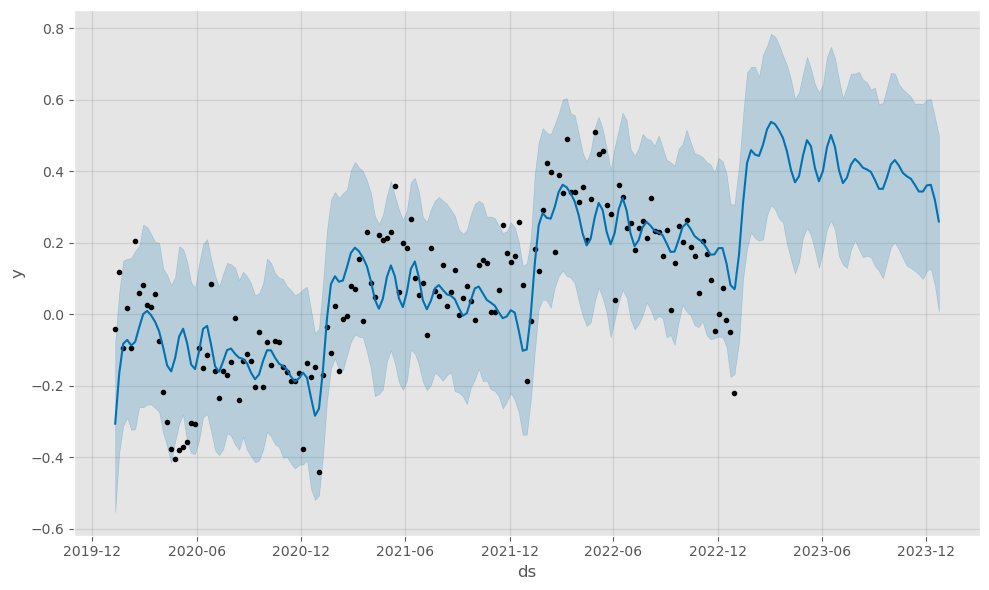

In [570]:
# Use Prophet's plot method to plot the predictions
Model.plot(forecast, uncertainty=True)
plt.show()

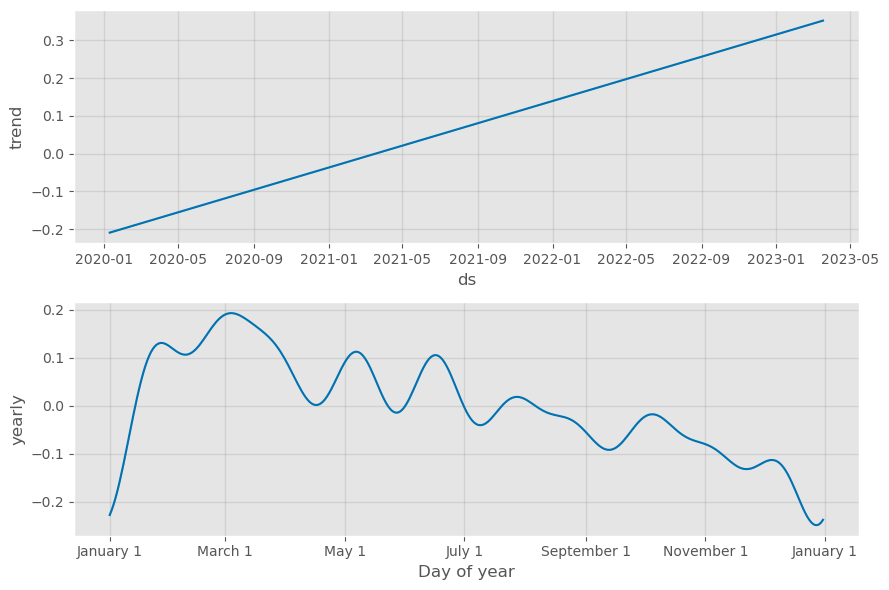

In [416]:
# Plot model components 
Model.plot_components(forecast)
plt.show()

### Regression

In [760]:
job_postings_national.head()

Unnamed: 0  year  month  day_endofweek  bg_posts  bg_posts_ss30  \
0           0  2020      1             10   -0.0407        -0.0748   
1           1  2020      1             17    0.1180         0.0922   
2           2  2020      1             24   -0.0954        -0.0819   
3           3  2020      1             31    0.0183         0.0645   
4           4  2020      2              7   -0.0943        -0.1200   

   bg_posts_ss55  bg_posts_ss60  bg_posts_ss65  bg_posts_ss70  bg_posts_jz1  \
0        -0.0399         -0.104        -0.1020        0.00711        0.0629   
1         0.0660          0.170         0.2240        0.07930        0.0934   
2        -0.1020         -0.117        -0.1520       -0.02490       -0.0591   
3         0.0758          0.051         0.0292       -0.06150       -0.0973   
4        -0.0350         -0.121        -0.0890       -0.09110       -0.0294   

   bg_posts_jzgrp12  bg_posts_jz2  bg_posts_jz3  bg_posts_jzgrp345  \
0           -0.0013      -0.00683       -0.0723            -0.0646   
1            0.1120       0.11400        0.1730             0.1260   
2           -0.0570      -0.05680       -0.1170            -0.1150   
3           -0.0538      -0.05010        0.0168             0.0535   
4           -0.0901      -0.09540       -0.1030            -0.1000   

   bg_posts_jz4  bg_posts_jz5        date  
0       -0.0512       -0.0889  2020-01-10  
1        0.0656        0.2060  2020-01-17  
2       -0.0985       -0.1640  2020-01-24  
3        0.0841        0.0465  2020-01-31  
4       -0.0933       -0.1140  2020-02-07

In [761]:
job_postings_national.shape

(156, 18)

In [762]:
indeed_jobs = pd.read_csv('data/Hiring_Lab_subset_country_data_to_2023-01-20_overall.csv')
indeed_sectors = pd.read_csv('data/Hiring_Lab_full_country_data_to_2023-01-20_sector.csv')

In [763]:
indeed_jobs.head()

Unnamed: 0        Date        Country  \
0           1  2020-02-01  United States   
1           2  2020-02-02  United States   
2           3  2020-02-03  United States   
3           4  2020-02-04  United States   
4           5  2020-02-05  United States   

                                     Index Type  \
0  Indeed Job Postings Index, Feb 01 2020 = 100   
1  Indeed Job Postings Index, Feb 01 2020 = 100   
2  Indeed Job Postings Index, Feb 01 2020 = 100   
3  Indeed Job Postings Index, Feb 01 2020 = 100   
4  Indeed Job Postings Index, Feb 01 2020 = 100   

   Seasonally adjusted percentage  Non-seasonally adjusted percentage  
0                           100.0                               100.0  
1                           100.0                               100.1  
2                           100.0                               100.1  
3                           100.0                               100.2  
4                           100.1                               100.3

In [773]:
indeed_sectors.head()

Unnamed: 0        Date jobcountry                     Sector  \
0           1  2020-02-01  Australia                 Accounting   
1           2  2020-02-01  Australia  Administrative Assistance   
2           3  2020-02-01  Australia   Agriculture and Forestry   
3           4  2020-02-01  Australia               Architecture   
4           5  2020-02-01  Australia     Arts and Entertainment   

                                     Index Type  \
0  Indeed Job Postings Index, Feb 01 2020 = 100   
1  Indeed Job Postings Index, Feb 01 2020 = 100   
2  Indeed Job Postings Index, Feb 01 2020 = 100   
3  Indeed Job Postings Index, Feb 01 2020 = 100   
4  Indeed Job Postings Index, Feb 01 2020 = 100   

   Seasonally adjusted percentage  Non-seasonally adjusted percentage  
0                           100.0                               100.0  
1                           100.0                               100.0  
2                           100.0                               100.0  
3                           100.0                               100.0  
4                           100.0                               100.0

In [774]:
set(indeed_sectors['Sector'])

{'Accounting',
 'Accounting (会計)',
 'Administrative Assistance',
 'Administrative Assistance (事務)',
 'Agriculture and Forestry',
 'Agriculture and Forestry (農業)',
 'Architecture',
 'Architecture (建築)',
 'Arts and Entertainment',
 'Arts and Entertainment (アート・エンターテインメント)',
 'Banking and Finance',
 'Beauty and Wellness',
 'Beauty and Wellness (美容・健康)',
 'Childcare',
 'Childcare (保育)',
 'Civil Engineering',
 'Cleaning and Sanitation',
 'Cleaning and Sanitation (クリーニング・清掃)',
 'Community and Social Service',
 'Construction',
 'Construction (建設)',
 'Customer Service',
 'Customer Service (カスタマーサービス)',
 'Dental',
 'Dental (歯科)',
 'Driving',
 'Driving (ドライバー)',
 'Education and Instruction',
 'Education and Instruction (教育)',
 'Electrical Engineering',
 'Food Preparation and Service',
 'Food Preparation and Service (飲食)',
 'Hospitality and Tourism',
 'Hospitality and Tourism (ホスピタリティ・観光)',
 'Human Resources',
 'Human Resources (人事)',
 'IT Operations and Helpdesk',
 'Industrial Engineering',
 'In

In [780]:
soft_dev_US = indeed_sectors[(indeed_sectors['Sector']=='Software Development') & 
                             (indeed_sectors['jobcountry']=='United States') & 
                             (indeed_sectors['Index Type']=='Indeed Job Postings Index, Feb 01 2020 = 100')]

In [788]:
soft_dev_US.iloc[:, 1:]

Date     jobcountry                Sector  \
127     2020-02-01  United States  Software Development   
428     2020-02-02  United States  Software Development   
729     2020-02-03  United States  Software Development   
1030    2020-02-04  United States  Software Development   
1331    2020-02-05  United States  Software Development   
...            ...            ...                   ...   
857328  2023-01-16  United States  Software Development   
858231  2023-01-17  United States  Software Development   
859134  2023-01-18  United States  Software Development   
860037  2023-01-19  United States  Software Development   
860940  2023-01-20  United States  Software Development   

                                          Index Type  \
127     Indeed Job Postings Index, Feb 01 2020 = 100   
428     Indeed Job Postings Index, Feb 01 2020 = 100   
729     Indeed Job Postings Index, Feb 01 2020 = 100   
1030    Indeed Job Postings Index, Feb 01 2020 = 100   
1331    Indeed Job Postings Index, Feb 01 2020 = 100   
...                                              ...   
857328  Indeed Job Postings Index, Feb 01 2020 = 100   
858231  Indeed Job Postings Index, Feb 01 2020 = 100   
859134  Indeed Job Postings Index, Feb 01 2020 = 100   
860037  Indeed Job Postings Index, Feb 01 2020 = 100   
860940  Indeed Job Postings Index, Feb 01 2020 = 100   

        Seasonally adjusted percentage  Non-seasonally adjusted percentage  
127                              100.0                               100.0  
428                               99.8                                99.9  
729                               99.5                                99.9  
1030                              99.3                                99.8  
1331                              99.2                                99.9  
...                                ...                                 ...  
857328                           132.2                               127.2  
858231                           132.2                               127.1  
859134                           132.2                               126.9  
860037                           132.1                               126.9  
860940                           131.7                               126.6  

[1085 rows x 6 columns]

In [768]:
print(indeed_jobs.shape)
indeed_jobs.info()

(1085, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1085 non-null   int64  
 1   Date                                1085 non-null   object 
 2   Country                             1085 non-null   object 
 3   Index Type                          1085 non-null   object 
 4   Seasonally adjusted percentage      1085 non-null   float64
 5   Non-seasonally adjusted percentage  1085 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 51.0+ KB


In [782]:
jobs_reg = soft_dev_US[['Date', 'Non-seasonally adjusted percentage']]
jobs_reg.columns = ['date', 'postings_pct']
jobs_reg['date'] = pd.to_datetime(jobs_reg['date'])
jobs_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 127 to 860940
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1085 non-null   datetime64[ns]
 1   postings_pct  1085 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.4 KB


In [801]:
jobs_reg_all = jobs_reg.merge(tech_stocks, on='date', how='left')
jobs_reg_all['close_px'] = jobs_reg_all['close_px'].ffill()
jobs_reg_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1085 non-null   datetime64[ns]
 1   postings_pct  1085 non-null   float64       
 2   close_px      1083 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 33.9 KB


In [790]:
sum(jobs_reg_all['date'].duplicated())

0

In [784]:
fig = px.scatter(x=jobs_reg_all['close_px'], 
                 y=jobs_reg_all['postings_pct'], 
                 trendline='ols')
fig.show()

In [798]:
ex = jobs_reg_all.dropna()
np.corrcoef(ex['close_px'], ex['postings_pct'])
#jobs_reg_all.dropna()

array([[1.        , 0.67226304],
       [0.67226304, 1.        ]])

In [802]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 2 to 1084
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1083 non-null   datetime64[ns]
 1   postings_pct  1083 non-null   float64       
 2   close_px      1083 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 33.8 KB


In [805]:
fig = px.line(ex, x='date', y = 'close_px')
fig.show()

# Supervised Models

When you are modeling for prediction, you are asking the question "How well can I use X (independent variables or features) to predict Y (dependent or target or outcome variable)?" Thus, in this case, you are less concerned about how and which features impact Y as opposed to how you can efficiently use them to predict Y.

When modeling for prediction, you typically use all available features (and most likely engineer new features) because you are trying to accurately predict Y, at all costs. As a result, you are less concerned about the coefficients of these features and instead focus on the overall accuracy of the model.

target = layoffs 
inputs:
- sector
- econ data
- job postings by sector?
- business openings?
- some measure of revenues

Regression for each sector?

Classification - given one layoff, prob of second?

### Data Prep

In [839]:
layoffs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2047 non-null   object 
 1   location             2047 non-null   object 
 2   industry             2046 non-null   object 
 3   total_laid_off       1414 non-null   float64
 4   percentage_laid_off  1377 non-null   float64
 5   date                 2047 non-null   object 
 6   stage                2041 non-null   object 
 7   country              2047 non-null   object 
 8   funds_raised         1890 non-null   float64
dtypes: float64(3), object(6)
memory usage: 144.1+ KB


In [1011]:
layoffs_raw.isnull().sum()

company                  0
location                 0
industry                 1
total_laid_off         657
percentage_laid_off    690
date                     0
stage                    6
country                  0
funds_raised           171
dtype: int64

In [1012]:
# converting to numeric type
layoffs_raw['funds_raised'] = pd.to_numeric(layoffs_raw['funds_raised'], 
                                            errors='coerce')

In [1013]:
# replacing missing value of funds raised with median
layoffs_raw['funds_raised'].fillna(layoffs_raw['funds_raised'].median(), 
                                   inplace=True)

In [1014]:
# converting to datetime, adding column for year
layoffs_raw['date'] = pd.to_datetime(layoffs_raw['date'])
layoffs_raw['year'] = [day.year for day in layoffs_raw['date']]

In [1015]:
# getting rid of nans (very few for this subset)
layoffs_raw = layoffs_raw.dropna(subset=['industry', 'stage']).reset_index(drop=True)

In [1016]:
# checking for duplicates
layoffs_raw[layoffs_raw.duplicated()]

company location        industry  total_laid_off  percentage_laid_off  \
1245   Cazoo   London  Transportation           750.0                 0.15   

           date stage         country  funds_raised  year  
1245 2022-06-07   IPO  United Kingdom        2000.0  2022

In [1017]:
# after some research, it appears there were indeed two rounds of layoffs
# for Cazoo
layoffs_raw[layoffs_raw.company=='Cazoo']

company location        industry  total_laid_off  percentage_laid_off  \
96     Cazoo   London  Transportation             NaN                  NaN   
1244   Cazoo   London  Transportation           750.0                 0.15   
1245   Cazoo   London  Transportation           750.0                 0.15   

           date stage         country  funds_raised  year  
96   2023-01-18   IPO  United Kingdom        2000.0  2023  
1244 2022-06-07   IPO  United Kingdom        2000.0  2022  
1245 2022-06-07   IPO  United Kingdom        2000.0  2022

In [1018]:
# second round of layoffs where on 9/8/2022
# source: https://sifted.eu/articles/cazoo-layoffs-european-union/ 

layoffs_raw.iloc[1245]['date'] = '2022-09-08' # adding correct value

In [1019]:
# list of companies that had more than one round of layoffs
mult_layoffs = list(layoffs_raw.company.value_counts()[layoffs_raw.company.value_counts() > 1].index)

In [1020]:
data_classification = layoffs_raw.drop(['total_laid_off', 'percentage_laid_off', 
                                        'date', 'year'], axis=1)

grouped = data_classification.groupby(by=['company', 'location', 'industry', 
                                          'stage', 'country']).sum().reset_index()

In [1021]:
data_classification['multiple'] = [True if co in mult_layoffs else False 
                                   for co in data_classification.company]
data_classification.head()

company     location industry     stage        country  funds_raised  \
0     Me Poupe    Sao Paulo  Finance   Unknown         Brazil         148.0   
1  CoinTracker  SF Bay Area   Crypto  Series A  United States         101.0   
2       SSense     Montreal   Retail  Series A         Canada         148.0   
3    DealShare    Bengaluru   Retail  Series E          India         390.0   
4     Synopsys  SF Bay Area    Other       IPO  United States         148.0   

   multiple  
0     False  
1     False  
2     False  
3     False  
4     False

In [1087]:
layoffs_raw[layoffs_raw.date>'22-01-2023'].to_csv('extra_cos.csv')

### Classification

In [1082]:
layoffs_sorted = layoffs_raw[['company', 'funds_raised', 'date']].sort_values(by='date')
ff = layoffs_sorted.drop_duplicates(subset=['company'], keep='first')
ff[ff.company=='Uber']
#funds_first_round = 

company  funds_raised       date
1676    Uber       24700.0 2020-05-06

In [1083]:
layoffs_sorted[layoffs_sorted.company=='Uber']

company  funds_raised       date
1676    Uber       24700.0 2020-05-06
1631    Uber       24700.0 2020-05-18
1612    Uber       24700.0 2020-05-26
1580    Uber       24700.0 2020-06-12
758     Uber       24700.0 2022-09-07

In [1022]:
funds = data_classification[['company', 'funds_raised']].groupby(by='company').sum().reset_index()
display(funds.head())

company  funds_raised
0            E Inc.         148.0
1   Included Health         272.0
2             #Paid          21.0
3             &Open          35.0
4       100 Thieves         240.0

69

In [1023]:
mult_layoffs = data_classification[['company', 'multiple']].groupby(by='company').sum().reset_index()

In [1024]:
mult_layoffs['multiple'] = [1 if val > 0 else 0 for val in mult_layoffs['multiple']]
mult_layoffs

company  multiple
0               E Inc.         0
1      Included Health         0
2                #Paid         0
3                &Open         0
4          100 Thieves         1
...                ...       ...
1712            iRobot         0
1713            kununu         0
1714             nCino         0
1715             tZero         0
1716             uShip         0

[1717 rows x 2 columns]

In [1025]:
df1 = pd.pivot_table(data_classification, 
                     index=['company', 'location', 'stage', 'industry', 'country'], 
                     values='funds_raised', aggfunc=np.sum).reset_index()

# still need to deal with duplicated companies = drop one, add value to sum
# then do multiple count column

df1 = df1.sort_values(by='stage').reset_index(drop=True)
df1

company       location     stage     industry        country  \
0     Morning Brew  New York City  Acquired        Media  United States   
1       RateGenius         Austin  Acquired      Finance  United States   
2      Realtor.com    SF Bay Area  Acquired  Real Estate  United States   
3          Harappa      New Delhi  Acquired    Education          India   
4          Cheddar  New York City  Acquired        Media  United States   
...            ...            ...       ...          ...            ...   
1830        Sherpa        Toronto   Unknown       Travel         Canada   
1831     ShareChat      Bengaluru   Unknown     Consumer          India   
1832    Fareportal       Gurugram   Unknown       Travel          India   
1833       Feedzai        Coimbra   Unknown      Finance       Portugal   
1834         Smava         Berlin   Unknown      Finance        Germany   

      funds_raised  
0            148.0  
1              2.0  
2            148.0  
3            148.0  
4             54.0  
...            ...  
1830          11.0  
1831        1700.0  
1832         148.0  
1833         273.0  
1834         376.0  

[1835 rows x 6 columns]

In [1026]:
# duplicated companies
dup = df1[df1.duplicated(subset='company')]

In [ ]:
# checking that index location is same in dup and df1

In [1027]:
dup[dup.company=='Ebanx']

company  location    stage industry country  funds_raised
1809   Ebanx  Curitiba  Unknown  Finance  Brazil          30.0

In [1029]:
df1[df1.company=='Ebanx']

company  location     stage industry country  funds_raised
904    Ebanx  Curitiba  Series B  Finance  Brazil         460.0
1809   Ebanx  Curitiba   Unknown  Finance  Brazil          30.0

In [1030]:
# dropping duplicated where stage is Unknown
df1 = df1.drop(index=list(dup[dup['stage']=='Unknown'].index)).reset_index(drop=True)

In [1031]:
df1.tail(11)

company       location    stage     industry        country  \
1797  Simple Feast     Copenhagen  Unknown         Food        Denmark   
1798       Etermax   Buenos Aires  Unknown        Other      Argentina   
1799      Everlane    SF Bay Area  Unknown       Retail  United States   
1800          Side    SF Bay Area  Unknown  Real Estate  United States   
1801        Exodus  Nebraska City  Unknown       Crypto  United States   
1802        Shopee      Singapore  Unknown         Food      Singapore   
1803         ShopX      Bengaluru  Unknown       Retail          India   
1804        Sherpa        Toronto  Unknown       Travel         Canada   
1805    Fareportal       Gurugram  Unknown       Travel          India   
1806       Feedzai        Coimbra  Unknown      Finance       Portugal   
1807         Smava         Berlin  Unknown      Finance        Germany   

      funds_raised  
1797         173.0  
1798         148.0  
1799         194.0  
1800         626.0  
1801          60.0  
1802         148.0  
1803          56.0  
1804          11.0  
1805         148.0  
1806         273.0  
1807         376.0

In [1032]:
# dropping all duplicates, resetting funds_raised to sum of funds
# raised during all layoffs per company, retagging target 

df_final = df1.drop_duplicates(subset='company', keep='last').reset_index(drop=True)
df_final['funds_raised'] = [float(funds['funds_raised'][funds['company']==co]) 
                            for co in df_final['company']]
df_final['multiple'] = [int(mult_layoffs['multiple'][mult_layoffs['company']==co]) 
                        for co in df_final['company']]

In [1033]:
df_final

company       location     stage     industry        country  \
0     Morning Brew  New York City  Acquired        Media  United States   
1       RateGenius         Austin  Acquired      Finance  United States   
2      Realtor.com    SF Bay Area  Acquired  Real Estate  United States   
3          Harappa      New Delhi  Acquired    Education          India   
4          Cheddar  New York City  Acquired        Media  United States   
...            ...            ...       ...          ...            ...   
1712         ShopX      Bengaluru   Unknown       Retail          India   
1713        Sherpa        Toronto   Unknown       Travel         Canada   
1714    Fareportal       Gurugram   Unknown       Travel          India   
1715       Feedzai        Coimbra   Unknown      Finance       Portugal   
1716         Smava         Berlin   Unknown      Finance        Germany   

      funds_raised  multiple  
0            148.0         0  
1              2.0         0  
2            148.0         0  
3            148.0         0  
4             54.0         0  
...            ...       ...  
1712          56.0         0  
1713          11.0         0  
1714         148.0         0  
1715         273.0         0  
1716         376.0         1  

[1717 rows x 7 columns]

In [1034]:
X = df_final.drop(['multiple', 'company'], axis=1)
y = df_final['multiple']

In [1035]:
y.value_counts(normalize=True) # fairly imbalanced, will need to address

0    0.830518
1    0.169482
Name: multiple, dtype: float64

In [1036]:
X.head()

location     stage     industry        country  funds_raised
0  New York City  Acquired        Media  United States         148.0
1         Austin  Acquired      Finance  United States           2.0
2    SF Bay Area  Acquired  Real Estate  United States         148.0
3      New Delhi  Acquired    Education          India         148.0
4  New York City  Acquired        Media  United States          54.0

In [1037]:
print(len(set(X['location'])))
print(len(set(X['country'])))

175
55


In [1053]:
# train test split & preprocess
cat_columns = ['industry', 'stage', 'country'] #'location'

X_train_processed, X_train_scaled, X_test_processed, X_test_scaled, \
y_train, y_test = train_test_preprocess(X, y, cat_columns)

In [1039]:
X_train_processed.shape

(1287, 91)

In [1040]:
# baseline
baseline_model = LogisticRegression(random_state=42) 
baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [1041]:
# baseline is no better than random guessing, & very low recall
y_hat_train = baseline_model.predict(X_train_scaled)
y_hat_test = baseline_model.predict(X_test_scaled)

print_scores(y_train, y_hat_train, y_test, y_hat_test) 

Training Recall:  0.0330188679245283
Testing Recall:  0.0


Training F1:  0.06278026905829595
Testing F1:  0.0


ROC AUC:  0.4943019943019943


Training Accuracy:  0.8376068376068376
Testing Accuracy:  0.8069767441860465


In [1057]:
dtc = DecisionTreeClassifier(random_state=42)#, class_weight='balanced')

dtc.fit(X_train_res, y_train_res)
y_hat_train = dtc.predict(X_train_res)
y_hat_test = dtc.predict(X_test_processed)

print_scores(y_train_res, y_hat_train, y_test, y_hat_test)

Training Recall:  0.998139534883721
Testing Recall:  0.3670886075949367


Training F1:  0.9990689013035382
Testing F1:  0.4027777777777778


ROC AUC:  0.6322622525154171


Training Accuracy:  0.9990697674418605
Testing Accuracy:  0.8


In [1058]:
pipe = Pipeline([('classifier' , DecisionTreeClassifier(random_state=42))])

param_grid = [{
    
    'classifier' : [DecisionTreeClassifier(random_state=42)],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth': [None, 1, 5, 10],
    'classifier__min_samples_split': [2, 5, 15],
    'classifier__max_features': [None, 10, 'auto']
    #'classifier__class_weight': [None, 'balanced'] # only need w/o SMOTE
}]

dtc_grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='recall')

best_dtc = dtc_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been depre

In [1042]:
# Logistic Regression with balanced class weight - big improvement

lr = LogisticRegression(random_state=42, class_weight='balanced') 

lr.fit(X_train_scaled, y_train)

y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)

print_scores(y_train, y_hat_train, y_test, y_hat_test)

Training Recall:  0.7216981132075472
Testing Recall:  0.6075949367088608


Training F1:  0.4123989218328841
Testing F1:  0.38554216867469876


ROC AUC:  0.6300082945652566


Training Accuracy:  0.6612276612276612
Testing Accuracy:  0.6441860465116279


In [1054]:
# Logistic Regression with SMOTE to deal with class imbalance
# try with processed and scaled

from imblearn.over_sampling import SMOTE

print(y_train.value_counts())

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)
X_train_res_scaled, y_train_res_scaled = sm.fit_resample(X_train_scaled, y_train)

print(pd.Series(y_train_res).value_counts()) 

lr2 = LogisticRegression(random_state=42)
model_res = lr2.fit(X_train_res_scaled, y_train_res_scaled)

y_hat_train = lr2.predict(X_train_res_scaled)
y_hat_test = lr2.predict(X_test_scaled)

print_scores(y_train_res_scaled, y_hat_train, y_test, y_hat_test)

0    1075
1     212
Name: multiple, dtype: int64
0    1075
1    1075
Name: multiple, dtype: int64
Training Recall:  0.7711627906976745
Testing Recall:  0.5949367088607594


Training F1:  0.7468468468468469
Testing F1:  0.40869565217391307


ROC AUC:  0.6493202062822316


Training Accuracy:  0.7386046511627907
Testing Accuracy:  0.6837209302325581


In [1044]:
# param tuning logistic regression model
pipe = Pipeline([('classifier' , LogisticRegression(random_state=42))])

param_grid = [{
    
    'classifier' : [LogisticRegression(random_state=42)],
    'classifier__C': [0, 0.5, 1, 2, 1e12],
    'classifier__solver': ['newton-cg', 'liblinear', 'lbfgs', 'saga'],
    'classifier__penalty': ['l1', 'l2', None],
   
}]

lr_grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='recall')

best_lr = lr_grid.fit(X_train_res_scaled, y_train_res_scaled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/natalyadoris/opt/anaconda3/envs/cap-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

This model correctly identifies 58% of companies that had more than one round of layoffs (recall).
When it predicts a company had multiple layoffs, it is correct 40% of the time (precision).

In [1045]:
y_hat_train = best_lr.predict(X_train_res_scaled) # or scaled
y_hat_test = best_lr.predict(X_test_scaled) # or scaled

print_scores(y_train_res_scaled, y_hat_train, y_test, y_hat_test)

Training Recall:  0.7813953488372093
Testing Recall:  0.5822784810126582


Training F1:  0.7588075880758807
Testing F1:  0.40888888888888886


ROC AUC:  0.6486890980561867


Training Accuracy:  0.7516279069767442
Testing Accuracy:  0.6906976744186046


In [1046]:
best_lr.best_params_

{'classifier': LogisticRegression(C=1000000000000.0, random_state=42),
 'classifier__C': 1000000000000.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [1055]:
best_lr = LogisticRegression(random_state=42, C=1000000000000.0, penalty='l2', solver='lbfgs')
best_lr.fit(X_train_res_scaled, y_train_res_scaled)

LogisticRegression(C=1000000000000.0, random_state=42)

In [1056]:
## Top coefficients

coef_df = pd.DataFrame(best_lr.coef_, columns=X_train_res_scaled.columns).transpose()
#coef_df.to_csv('coef_logreg.csv')

coef_df.columns=['coef']
coef_df['coef_abs'] = abs(coef_df['coef'])

coef_df.sort_values(by='coef_abs', ascending=False)[:20]

coef   coef_abs
stage_Series I          15.236711  15.236711
country_Romania         12.274411  12.274411
funds_raised            10.651652  10.651652
industry_Energy         -8.518744   8.518744
industry_Hardware       -7.474732   7.474732
country_Vietnam          7.164388   7.164388
stage_Subsidiary        -6.883253   6.883253
country_Chile            6.580253   6.580253
industry_Manufacturing  -6.579118   6.579118
country_Hong Kong       -6.547081   6.547081
stage_Series J          -6.494979   6.494979
country_Poland          -6.264149   6.264149
country_Argentina       -6.049577   6.049577
country_Nigeria         -5.878305   5.878305
country_Estonia          5.459397   5.459397
country_Malaysia        -5.429886   5.429886
country_Finland         -5.392482   5.392482
country_Austria         -5.274009   5.274009
country_Peru            -5.141764   5.141764
country_Denmark         -5.128066   5.128066

In [1077]:
X.head()

location     stage     industry        country  funds_raised
0  New York City  Acquired        Media  United States         148.0
1         Austin  Acquired      Finance  United States           2.0
2    SF Bay Area  Acquired  Real Estate  United States         148.0
3      New Delhi  Acquired    Education          India         148.0
4  New York City  Acquired        Media  United States          54.0

In [ ]:
example_company = ['Austin', 'Stage B', 'Real Estate', 'United States', 50.0]

In [1059]:
y_hat_train = best_dtc.predict(X_train_res) 
y_hat_test = best_dtc.predict(X_test_processed)

print_scores(y_train_res, y_hat_train, y_test, y_hat_test)

Training Recall:  0.998139534883721
Testing Recall:  0.34177215189873417


Training F1:  0.9990689013035382
Testing F1:  0.35526315789473684


ROC AUC:  0.6053590104223014


Training Accuracy:  0.9990697674418605
Testing Accuracy:  0.772093023255814


In [1061]:
xgb = XGBClassifier(random_state=42)#, scale_pos_weight=1.5)
xgb.fit(X_train_res_scaled, y_train_res_scaled)
y_hat_train = xgb.predict(X_train_res_scaled)
y_hat_test = xgb.predict(X_test_scaled)

print_scores(y_train_res, y_hat_train, y_test, y_hat_test)

Training Recall:  0.9674418604651163
Testing Recall:  0.4936708860759494


Training F1:  0.9728718428437794
Testing F1:  0.513157894736842


ROC AUC:  0.6984023946049263


Training Accuracy:  0.9730232558139534
Testing Accuracy:  0.827906976744186


In [1070]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=7)
xgb.fit(X_train_processed, y_train)
y_hat_train = xgb.predict(X_train_processed)
y_hat_test = xgb.predict(X_test_processed)

print_scores(y_train, y_hat_train, y_test, y_hat_test)

Training Recall:  1.0
Testing Recall:  0.5822784810126582


Training F1:  0.9098712446351932
Testing F1:  0.5380116959064327


ROC AUC:  0.7256121749792634


Training Accuracy:  0.9673659673659674
Testing Accuracy:  0.8162790697674419


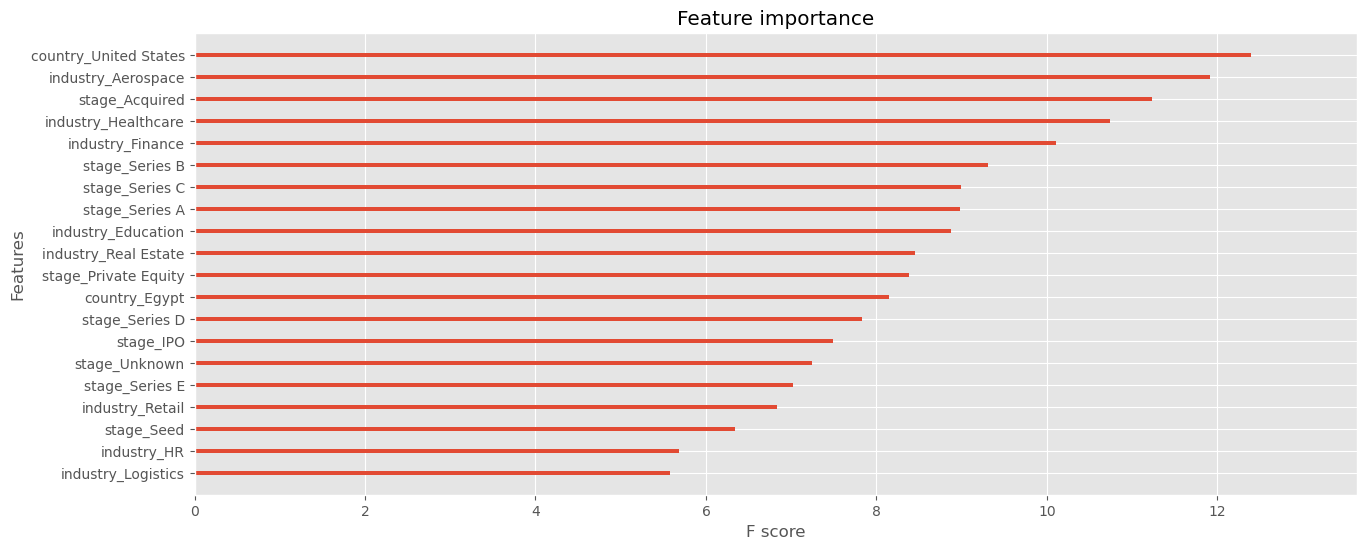

In [1067]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features=20, importance_type='gain', 
                show_values=False)
plt.show()

In [1072]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_processed, y_train)
y_hat_train = rf.predict(X_train_processed)
y_hat_test = rf.predict(X_test_processed)

print_scores(y_train, y_hat_train, y_test, y_hat_test)

Training Recall:  1.0
Testing Recall:  0.25316455696202533


Training F1:  0.9953051643192489
Testing F1:  0.3508771929824562


ROC AUC:  0.6052147571134913


Training Accuracy:  0.9984459984459985
Testing Accuracy:  0.827906976744186


### Regression

In [1073]:
# daily layoffs

total_layoffs_by_date = layoffs_raw[['total_laid_off', 'date']].groupby(by=['date']).sum().reset_index()
total_layoffs_by_date.head()

date  total_laid_off
0 2020-03-11            75.0
1 2020-03-12            20.0
2 2020-03-13            14.0
3 2020-03-16           146.0
4 2020-03-18             4.0

In [1074]:
layoffs_raw['month'] = [pd.to_datetime(pd.to_datetime(day).strftime('%Y-%m')) for day in layoffs_raw['date']]

In [1075]:
total_layoffs_by_month = layoffs_raw[['total_laid_off', 'month']].groupby(by=['month']).sum().reset_index()
total_layoffs_by_month.head()

month  total_laid_off
0 2020-03-01          9628.0
1 2020-04-01         26710.0
2 2020-05-01         25804.0
3 2020-06-01          7627.0
4 2020-07-01          7112.0

In [1076]:
# add in external economic data

bf_seas = pd.read_csv('data/business_formations_seasonal.csv')
bf_nonseas = pd.read_csv('data/business_formations_nonseasonal.csv')

nfp = pd.read_csv('data/nfp.csv')

In [685]:
bf_nonseas.head()

Unnamed: 0  cell_value  time_slot_id error_data category_code  \
0         977      354726             0         no         TOTAL   
1         978      319359             0         no         TOTAL   
2         979      327898             0         no         TOTAL   
3         980      299709             0         no         TOTAL   
4         981      343347             0         no         TOTAL   

  seasonally_adj data_type_code        time  us               sector  \
0             no          BA_BA  2019-01-01   1  Total for All NAICS   
1             no          BA_BA  2019-02-01   1  Total for All NAICS   
2             no          BA_BA  2019-03-01   1  Total for All NAICS   
3             no          BA_BA  2019-04-01   1  Total for All NAICS   
4             no          BA_BA  2019-05-01   1  Total for All NAICS   

       month  
0 2019-01-01  
1 2019-02-01  
2 2019-03-01  
3 2019-04-01  
4 2019-05-01

In [672]:
nfp.head()

date  change_nfp
0  1/1/20         339
1  2/1/20         376
2  3/1/20       -1498
3  4/1/20      -20493
4  5/1/20        2642

In [683]:
bf_nonseas['month'] = [pd.to_datetime(month) for month in bf_nonseas['time']]
nfp['month'] = [pd.to_datetime(month) for month in nfp['date']]

In [689]:
# monthly

all = total_layoffs_by_month.merge(bf_nonseas[['month', 'cell_value']], 
                                   on='month', how='left')

all.head()

month  total_laid_off  cell_value
0 2020-03-01          9628.0    282298.0
1 2020-04-01         26710.0    301463.0
2 2020-05-01         25804.0    285221.0
3 2020-06-01          7627.0    349320.0
4 2020-07-01          7112.0    584760.0

In [690]:
all = all.merge(nfp[['month', 'change_nfp']], on='month', how='left')
all.head()

month  total_laid_off  cell_value  change_nfp
0 2020-03-01          9628.0    282298.0     -1498.0
1 2020-04-01         26710.0    301463.0    -20493.0
2 2020-05-01         25804.0    285221.0      2642.0
3 2020-06-01          7627.0    349320.0      4505.0
4 2020-07-01          7112.0    584760.0      1388.0

In [696]:
fig = px.scatter(x=all['cell_value'][(all['total_laid_off']<50000)], 
                 y=all['total_laid_off'][(all['total_laid_off']<50000)], 
                 trendline='ols')
fig.show()

In [695]:
fig = px.scatter(x=all['change_nfp'][(all['change_nfp']>-5000) & (all['total_laid_off']<50000)], 
                 y=all['total_laid_off'][(all['change_nfp']>-5000) & (all['total_laid_off']<50000)], 
                 trendline='ols')
fig.show()

In [702]:
# monthly
df_model = all[(all['change_nfp']>-5000) & (all['total_laid_off']<50000)]
df_model.dropna()

target = df_model['total_laid_off']
features = df_model[['change_nfp', 'cell_value']]

In [ ]:
# daily

In [752]:
df_model = all_data[(all_data['change_nfp']>-5000) & 
                    (all_data['total_laid_off']<50000) & 
                    (all_data['date'] < '01-01-2023')]


target = df_model['total_laid_off']
features = df_model[['change_nfp', 'business_formations', 'close_px']]

In [753]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    # If using an older version of sklearn:
    # rmse = np.sqrt(mean_squared_error(y_true, y_predict))

    # Return the score
    return [r2, rmse]


In [754]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=42)

In [757]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45, max_depth=30)

# Fit the model to training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

[-0.052285781241756535, 1623.5447513765127]

In [701]:
fortune_1000[fortune_1000.sector=='Technology'].head()

company  rank  rank_change   revenue   profit  \
2               Apple     3          0.0  365817.0  94680.0   
7            Alphabet     8          1.0  257637.0  76033.0   
13          Microsoft    14          1.0  168088.0  61271.0   
26     Meta Platforms    27          7.0  117929.0  39370.0   
30  Dell Technologies    31         -3.0  106995.0   5563.0   

    num. of employees      sector           city state newcomer ceo_founder  \
2            154000.0  Technology      Cupertino    CA       no          no   
7            156500.0  Technology  Mountain View    CA       no          no   
13           181000.0  Technology        Redmond    WA       no          no   
26            71970.0  Technology     Menlo Park    CA       no         yes   
30           133000.0  Technology     Round Rock    TX       no         yes   

   ceo_woman profitable prev_rank              CEO                   Website  \
2         no        yes       3.0  Timothy D. Cook             www.apple.com   
7         no        yes       9.0    Sundar Pichai       https://www.abc.xyz   
13        no        yes      15.0    Satya Nadella         www.microsoft.com   
26        no        yes      34.0  Mark Zuckerberg   https://investor.fb.com   
30        no        yes      28.0  Michael S. Dell  www.delltechnologies.com   

   Ticker Market Cap  
2    AAPL    2443962  
7   GOOGL    1309359  
13   MSFT    1941033  
26   META     475718  
30   DELL      32568

In [640]:
bf_nonseas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48 non-null     int64 
 1   cell_value      48 non-null     int64 
 2   time_slot_id    48 non-null     int64 
 3   error_data      48 non-null     object
 4   category_code   48 non-null     object
 5   seasonally_adj  48 non-null     object
 6   data_type_code  48 non-null     object
 7   time            48 non-null     object
 8   us              48 non-null     int64 
 9   sector          48 non-null     object
dtypes: int64(4), object(6)
memory usage: 3.9+ KB


In [741]:
bf_nonseas = bf_nonseas[['time', 'cell_value']]

bf_nonseas.set_index('time', inplace=True)
bf_nonseas.index = pd.to_datetime(bf_nonseas.index)
bf_nonseas.index.rename('date')
#bf_nonseas = bf_nonseas['cell_value'].resample('D').ffill()

idx = pd.date_range(bf_nonseas.index.min(), bf_nonseas.index.max().to_period('M').to_timestamp('M'))
bf_nonseas = bf_nonseas.reindex(idx, method='ffill')


bf_nonseas = pd.DataFrame(bf_nonseas).reset_index()
bf_nonseas

index  cell_value
0    2019-01-01      354726
1    2019-01-02      354726
2    2019-01-03      354726
3    2019-01-04      354726
4    2019-01-05      354726
...         ...         ...
1456 2022-12-27      293688
1457 2022-12-28      293688
1458 2022-12-29      293688
1459 2022-12-30      293688
1460 2022-12-31      293688

[1461 rows x 2 columns]

In [742]:
bf_nonseas.columns = ['date', 'business_formations']

In [743]:
#all_data = pd.concat([total_layoffs_by_date, bf_nonseas])

all_data = total_layoffs_by_date.merge(bf_nonseas, on='date', how='left')
all_data

date  total_laid_off  business_formations
0   2020-03-11            75.0             282298.0
1   2020-03-12            20.0             282298.0
2   2020-03-13            14.0             282298.0
3   2020-03-16           146.0             282298.0
4   2020-03-18             4.0             282298.0
..         ...             ...                  ...
435 2023-01-16          1125.0                  NaN
436 2023-01-17          1816.0                  NaN
437 2023-01-18         11816.0                  NaN
438 2023-01-19          1753.0                  NaN
439 2023-01-20         14559.0                  NaN

[440 rows x 3 columns]

In [744]:
nfp.set_index('date', inplace=True)
nfp.index = pd.to_datetime(nfp.index)

#nfp = nfp['change_nfp'].resample('D').ffill()
idx = pd.date_range(nfp.index.min(), nfp.index.max().to_period('M').to_timestamp('M'))
nfp = nfp.reindex(idx, method='ffill')

nfp = pd.DataFrame(nfp).reset_index()
nfp.columns = ['date', 'change_nfp']
nfp

date  change_nfp
0    2020-01-01         339
1    2020-01-02         339
2    2020-01-03         339
3    2020-01-04         339
4    2020-01-05         339
...         ...         ...
1091 2022-12-27         223
1092 2022-12-28         223
1093 2022-12-29         223
1094 2022-12-30         223
1095 2022-12-31         223

[1096 rows x 2 columns]

In [712]:
ixn = yf.Ticker("IXN")
hist = ixn.history(period="3y")

In [713]:
hist

Open       High        Low      Close  \
Date                                                                    
2020-01-28 00:00:00-05:00  35.587471  36.019852  35.528735  35.975800   
2020-01-29 00:00:00-05:00  36.207494  36.256442  35.897481  35.988853   
2020-01-30 00:00:00-05:00  35.835477  36.138961  35.651104  36.111221   
2020-01-31 00:00:00-05:00  35.876269  35.917057  35.053928  35.140404   
2020-02-03 00:00:00-05:00  35.208932  35.749001  35.208932  35.706577   
...                              ...        ...        ...        ...   
2023-01-23 00:00:00-05:00  48.169998  49.290001  48.139999  49.099998   
2023-01-24 00:00:00-05:00  48.730000  49.130001  48.630001  48.980000   
2023-01-25 00:00:00-05:00  48.209999  49.090000  47.889999  48.930000   
2023-01-26 00:00:00-05:00  49.389999  49.700001  48.919998  49.700001   
2023-01-27 00:00:00-05:00  49.340000  50.180000  49.290001  49.880001   

                            Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                        
2020-01-28 00:00:00-05:00   366600        0.0           0.0            0.0  
2020-01-29 00:00:00-05:00   421200        0.0           0.0            0.0  
2020-01-30 00:00:00-05:00   383400        0.0           0.0            0.0  
2020-01-31 00:00:00-05:00   412800        0.0           0.0            0.0  
2020-02-03 00:00:00-05:00   640800        0.0           0.0            0.0  
...                            ...        ...           ...            ...  
2023-01-23 00:00:00-05:00   552100        0.0           0.0            0.0  
2023-01-24 00:00:00-05:00   135800        0.0           0.0            0.0  
2023-01-25 00:00:00-05:00   600500        0.0           0.0            0.0  
2023-01-26 00:00:00-05:00  1164900        0.0           0.0            0.0  
2023-01-27 00:00:00-05:00   429900        0.0           0.0            0.0  

[757 rows x 8 columns]

In [745]:
tech_stocks = hist['Close'].reset_index()
#tech_stocks['Date'][0].replace(tzinfo=None)
tech_stocks['Date'] = pd.to_datetime(tech_stocks['Date'].dt.date)

In [746]:
tech_stocks.columns = ['date', 'close_px']
tech_stocks['close_px'] = tech_stocks['close_px'].ffill()

In [747]:
tech_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      757 non-null    datetime64[ns]
 1   close_px  757 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [748]:
all_data = all_data.merge(nfp, on='date', how='left')
all_data

date  total_laid_off  business_formations  change_nfp
0   2020-03-11            75.0             282298.0     -1498.0
1   2020-03-12            20.0             282298.0     -1498.0
2   2020-03-13            14.0             282298.0     -1498.0
3   2020-03-16           146.0             282298.0     -1498.0
4   2020-03-18             4.0             282298.0     -1498.0
..         ...             ...                  ...         ...
435 2023-01-16          1125.0                  NaN         NaN
436 2023-01-17          1816.0                  NaN         NaN
437 2023-01-18         11816.0                  NaN         NaN
438 2023-01-19          1753.0                  NaN         NaN
439 2023-01-20         14559.0                  NaN         NaN

[440 rows x 4 columns]

In [749]:
all_data = all_data.merge(tech_stocks, on='date', how='left')
all_data

date  total_laid_off  business_formations  change_nfp   close_px
0   2020-03-11            75.0             282298.0     -1498.0  30.870432
1   2020-03-12            20.0             282298.0     -1498.0  27.887814
2   2020-03-13            14.0             282298.0     -1498.0  30.976486
3   2020-03-16           146.0             282298.0     -1498.0  26.562931
4   2020-03-18             4.0             282298.0     -1498.0  27.112787
..         ...             ...                  ...         ...        ...
435 2023-01-16          1125.0                  NaN         NaN        NaN
436 2023-01-17          1816.0                  NaN         NaN  47.790001
437 2023-01-18         11816.0                  NaN         NaN  47.259998
438 2023-01-19          1753.0                  NaN         NaN  46.779999
439 2023-01-20         14559.0                  NaN         NaN  47.990002

[440 rows x 5 columns]

In [750]:
all_data['close_px'] = all_data['close_px'].ffill()

In [751]:
all_data

date  total_laid_off  business_formations  change_nfp   close_px
0   2020-03-11            75.0             282298.0     -1498.0  30.870432
1   2020-03-12            20.0             282298.0     -1498.0  27.887814
2   2020-03-13            14.0             282298.0     -1498.0  30.976486
3   2020-03-16           146.0             282298.0     -1498.0  26.562931
4   2020-03-18             4.0             282298.0     -1498.0  27.112787
..         ...             ...                  ...         ...        ...
435 2023-01-16          1125.0                  NaN         NaN  47.660000
436 2023-01-17          1816.0                  NaN         NaN  47.790001
437 2023-01-18         11816.0                  NaN         NaN  47.259998
438 2023-01-19          1753.0                  NaN         NaN  46.779999
439 2023-01-20         14559.0                  NaN         NaN  47.990002

[440 rows x 5 columns]

In [ ]:
### Add more data? public companies htat havent had layoffs with easy data??

In [300]:
layoffs = layoffs_raw.dropna(subset=['total_laid_off', 'industry', 'stage']).reset_index(drop=True)
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1411 non-null   object 
 1   location             1411 non-null   object 
 2   industry             1411 non-null   object 
 3   total_laid_off       1411 non-null   float64
 4   percentage_laid_off  1054 non-null   float64
 5   date                 1411 non-null   object 
 6   stage                1411 non-null   object 
 7   country              1411 non-null   object 
 8   funds_raised         1315 non-null   float64
dtypes: float64(3), object(6)
memory usage: 99.3+ KB


In [302]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1411 non-null   object 
 1   location             1411 non-null   object 
 2   industry             1411 non-null   object 
 3   total_laid_off       1411 non-null   float64
 4   percentage_laid_off  1054 non-null   float64
 5   date                 1411 non-null   object 
 6   stage                1411 non-null   object 
 7   country              1411 non-null   object 
 8   funds_raised         1411 non-null   object 
dtypes: float64(2), object(7)
memory usage: 99.3+ KB


In [ ]:
#### JUST DO REGRESSION WITH PUBLIC COMPANIES, CLASSIFICATION WITH 

In [303]:
layoffs.company.value_counts()[layoffs.company.value_counts() > 1]

Loft          5
Swiggy        5
Uber          5
Gopuff        4
Salesforce    4
             ..
Unico         2
ChowNow       2
Clutch        2
Hubilo        2
ConsenSys     2
Name: company, Length: 175, dtype: int64

In [166]:
print(len(layoffs))

2047


In [258]:
layoffs['implied_no_employees'] = round(layoffs['total_laid_off'] / layoffs['percentage_laid_off'], 0)
layoffs.head()

company         location    industry  total_laid_off  \
0     Google      SF Bay Area    Consumer         12000.0   
1    Wayfair           Boston      Retail          1750.0   
2     Swiggy        Bengaluru        Food           380.0   
3  MediBuddy        Bengaluru  Healthcare           200.0   
4  Vox Media  Washington D.C.       Media           130.0   

   percentage_laid_off        date     stage        country  funds_raised  \
0                 0.06  2023-01-20       IPO  United States          26.0   
1                 0.10  2023-01-20       IPO  United States        1700.0   
2                 0.06  2023-01-20   Unknown          India        3600.0   
3                  NaN  2023-01-20  Acquired          India         192.0   
4                 0.07  2023-01-20  Series F  United States         307.0   

   multiple  implied_no_employees  
0         0              200000.0  
1         1               17500.0  
2         1                6333.0  
3         0                   NaN  
4         1                1857.0

In [259]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               1411 non-null   object 
 1   location              1411 non-null   object 
 2   industry              1411 non-null   object 
 3   total_laid_off        1411 non-null   float64
 4   percentage_laid_off   1054 non-null   float64
 5   date                  1411 non-null   object 
 6   stage                 1411 non-null   object 
 7   country               1411 non-null   object 
 8   funds_raised          1315 non-null   float64
 9   multiple              1411 non-null   int64  
 10  implied_no_employees  1054 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 121.4+ KB


In [261]:
list(layoffs.company[layoffs.percentage_laid_off.isna()])

['MediBuddy',
 'Karat',
 'Edifecs',
 'Capital One',
 'WeWork ',
 'Riot Games',
 'Hydrow',
 'Rappi',
 'Clutch',
 'Tul',
 'Luxury Presence',
 'RingCentral',
 'Gramophone',
 'Captain Fresh ',
 'Ola',
 'Vial',
 'Skit.ai',
 'Cashfree Payments',
 'Mapbox',
 'Career Karma',
 'CoinDCX',
 'HashiCorp',
 'Embark',
 'Citizen',
 'Till Payments',
 'LEAD',
 'Carbon Health',
 'Cue',
 'Twitter',
 'Zoopla',
 'Qualcomm',
 'GoStudent',
 'Quanergy Systems',
 'Freshly',
 'Balto',
 'Chrono24',
 'Inscripta',
 'Vedantu',
 'Recur Forever',
 'Intel',
 'Adobe',
 'OYO',
 'HealthifyMe',
 'ShareChat',
 'StudySmarter',
 'Etermax',
 'Bitso',
 'Splyt',
 'Orchard',
 'Homepoint',
 'Chili Piper',
 'Properly',
 'The Zebra',
 'Sema4',
 'Science 37',
 'Science 37 ',
 'Cardlytics',
 'Nestcoin',
 'Coinbase',
 'Wistia',
 'Cameo',
 'HighRadius',
 'EverBridge',
 'Brainly',
 'Udaan',
 'Delivery Hero',
 'Argo AI',
 'Booking.com',
 'Oracle',
 'Drop',
 'Tapps Games',
 'Notarize',
 'Dukaan',
 'Amazon',
 'Lattice',
 'Argo AI',
 'Philip

In [264]:
layoffs[(layoffs.percentage_laid_off.isna()) & (layoffs.stage=='IPO')] 
# might be able to get revenue / 

company         location        industry  total_laid_off  \
8           Capital One  Washington D.C.         Finance          1100.0   
9               WeWork     New York City     Real Estate           300.0   
37          RingCentral      SF Bay Area           Other            30.0   
64            HashiCorp      SF Bay Area        Security            69.0   
85                  Cue        San Diego      Healthcare           388.0   
90              Twitter      SF Bay Area        Consumer            40.0   
109            Qualcomm        San Diego        Hardware           153.0   
121    Quanergy Systems      SF Bay Area  Transportation            72.0   
163               Intel      SF Bay Area        Hardware           201.0   
166               Adobe      SF Bay Area       Marketing           100.0   
221           Homepoint          Phoenix     Real Estate           113.0   
249               Sema4         Stamford      Healthcare           500.0   
254          Science 37      Los Angeles      Healthcare            90.0   
255         Science 37       Los Angeles      Healthcare            90.0   
257          Cardlytics          Atlanta       Marketing            51.0   
266            Coinbase      SF Bay Area          Crypto            60.0   
280          EverBridge           Boston           Other           200.0   
296       Delivery Hero           Berlin            Food           100.0   
308              Oracle      SF Bay Area           Other           200.0   
322              Amazon          Seattle          Retail           150.0   
335             Philips        Amsterdam      Healthcare          4000.0   
360          Salesforce      SF Bay Area           Sales            90.0   
372          HelloFresh      SF Bay Area            Food           611.0   
388            Westwing           Munich          Retail           125.0   
399             Compass    New York City     Real Estate           271.0   
413             Netflix      SF Bay Area           Media            30.0   
429                Uber          Vilnius  Transportation            60.0   
439             Shopify           Ottawa          Retail            70.0   
457                Okta      SF Bay Area           Other            24.0   
502                 Wix         Tel Aviv       Marketing           100.0   
507               Absci        Vancouver      Healthcare            40.0   
511               Vroom    New York City  Transportation           337.0   
512        Warby Parker    New York City        Consumer            63.0   
527         RingCentral      SF Bay Area         Support            50.0   
530         Beyond Meat      Los Angeles            Food            40.0   
555              Laybuy         Auckland         Finance            45.0   
556            Allbirds      SF Bay Area          Retail            23.0   
583   Just Eat Takeaway        Amsterdam            Food           390.0   
593             Invitae      SF Bay Area      Healthcare          1000.0   
619             Babylon           London      Healthcare           100.0   
632             Shopify           Ottawa          Retail            50.0   
684                 Cue        San Diego      Healthcare           170.0   
701            Sprinklr    New York City         Support            50.0   
819              PayPal      SF Bay Area         Finance            83.0   
859             Netflix      SF Bay Area           Media            25.0   
866            Lemonade    New York City         Finance            52.0   
876            Goodfood          Calgary            Food            70.0   
880                 Sea        Bengaluru          Retail           350.0   
905      Root Insurance         Columbus         Finance           330.0   
906       Delivery Hero           Berlin            Food           300.0   
911            Zymergen      SF Bay Area           Other           120.0   
944          LivePerson    New York City         Support        

In [289]:
display(layoffs[layoffs['implied_no_employees'] == layoffs['implied_no_employees'].max()])
#layoffs['implied_no_employees'][layoffs['implied_no_employees'] == layoffs['implied_no_employees'].max()] = np.nan

company location industry  total_laid_off  percentage_laid_off        date  \
96  Amazon  Seattle   Retail          8000.0                 0.02  2023-01-04   

   stage        country  funds_raised  multiple  implied_no_employees  
96   IPO  United States         108.0         1              400000.0

In [291]:
layoffs_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1409
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               1054 non-null   object 
 1   location              1054 non-null   object 
 2   industry              1054 non-null   object 
 3   total_laid_off        1054 non-null   float64
 4   percentage_laid_off   1054 non-null   float64
 5   date                  1054 non-null   object 
 6   stage                 1054 non-null   object 
 7   country               1054 non-null   object 
 8   funds_raised          976 non-null    float64
 9   multiple              1054 non-null   int64  
 10  implied_no_employees  1053 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 98.8+ KB


In [293]:
#np.corrcoef(layoffs_nonan['implied_no_employees'], layoffs_nonan['percentage_laid_off'])
from scipy.stats import pearsonr

corr, _ = pearsonr(layoffs_nonan['implied_no_employees'], layoffs_nonan['percentage_laid_off'])

In [294]:
corr

-0.10021612156147094

In [295]:
np.corrcoef(layoffs_nonan['implied_no_employees'], layoffs_nonan['percentage_laid_off'])

array([[ 1.        , -0.10021612],
       [-0.10021612,  1.        ]])

In [292]:
layoffs_nonan = layoffs[~layoffs.percentage_laid_off.isna() & ~layoffs.implied_no_employees.isna()]

fig = px.scatter(x=np.log(layoffs_nonan['implied_no_employees']), 
                 y=np.log(layoffs_nonan['percentage_laid_off']), 
                 trendline='ols')
fig.show()

array([[<AxesSubplot: title={'center': 'implied_no_employees'}>,
        <AxesSubplot: title={'center': 'total_laid_off'}>],
       [<AxesSubplot: title={'center': 'percentage_laid_off'}>,
        <AxesSubplot: >]], dtype=object)

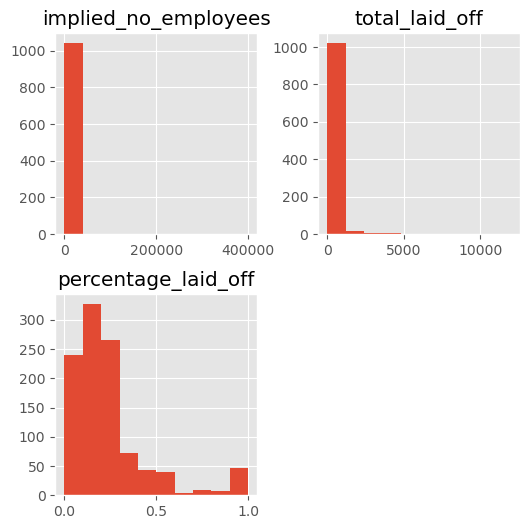

In [282]:
#layoffs[layoffs['implied_no_employees'] == layoffs['implied_no_employees'].max()]
layoffs_nonan[['implied_no_employees', 'total_laid_off', 
               'percentage_laid_off']].hist(figsize  = [6, 6])

In [ ]:
# DATA I WANT:

# no. employees
# revenues / earnings etc

In [11]:
total_layoffs_by_month.head()

total_laid_off
month                     
2020-03-01          9628.0
2020-04-01         26710.0
2020-05-01         25804.0
2020-06-01          7627.0
2020-07-01          7112.0

In [ ]:
## Gather company data from Crunchbase - need paid subscription

In [191]:
companies = list(set(layoffs['company']))
print(len(companies))
companies[:10]

1177


['Pegasystems',
 'Dynamic Signal',
 'Kavak',
 'Lambda School',
 'Teleport',
 'Apartment List',
 'Instructure',
 'Snappy',
 'Hopin',
 'SoFi']

In [494]:
print(companies)

['Pegasystems', 'Dynamic Signal', 'Kavak', 'Lambda School', 'Teleport', 'Apartment List', 'Instructure', 'Snappy', 'Hopin', 'SoFi', 'Cisco', 'Airbnb', 'Moss', 'PayJoy', 'People.ai', 'Kontist', 'Lola', 'Aqgromalin', 'Tidepool', 'ApplyBoard', 'CTO.ai', 'Thriver', 'OrCam', 'BlackBuck', 'Carbon Health', 'Revelate', 'Community', 'Foodpanda', 'Bird', 'TravelBank', 'HOOQ', 'Shipsi', 'Sauce Labs', 'Pear Therapeutics', 'Rubrik', 'Superloop', 'Voyage SMS', 'Gopuff', 'Aura', 'Zipcar', 'Captain Fresh ', 'Triplebyte', 'Aqua Security', 'Rows', 'Shelf Engine', 'Grab', 'CyCognito', 'Skit.ai', 'Simple Feast', 'Artnight', 'Noom', 'Oye Rickshaw', 'Rasa', 'Heroes', 'Kitopi', 'Synthego', 'Xerpa', 'Truiloo', 'WanderJaunt', 'Qualtrics', 'Intuit', 'GoStudent', 'Showpad', 'OneWeb', 'CodeCombat', 'Tomorrow', 'Houzz', 'Parallel Wireless', 'Monzo', 'Momentive', 'GrayMeta', 'InfoSum', 'TripAdvisor', 'Waze', 'Polarr', 'Clear', 'Built In', 'Buy.com / Rakuten', 'WeDoctor', 'TripActions', 'Zak', 'CS Disco', 'SynapseFI

In [192]:
companies_ipo = list(set(layoffs['company'][layoffs['stage']=='IPO']))
len(companies_ipo)

173

In [231]:
companies_ipo = [name.lower() for name in companies_ipo]

In [232]:
companies_ipo[:20]

['pegasystems',
 'thinkific',
 'funding circle',
 'cisco',
 'delivery hero',
 'netflix',
 'splunk',
 'root insurance',
 'vtex',
 'playtika',
 'nutanix',
 'zymergen',
 'teladoc health',
 'bird',
 'laybuy',
 'microsoft',
 'definitive healthcare',
 'pear therapeutics',
 'blend',
 'applovin']

In [217]:
import json
def get_data(path):
    with open(path) as f:
        return json.load(f)
    
ticker_dict = get_data('data/company_tickers.json')

In [219]:
ticker_dict['0']

{'cik_str': 320193, 'ticker': 'AAPL', 'title': 'Apple Inc.'}

In [481]:
tickers = []
co_names = []
ticker_map = {}

for key in ticker_dict:
    #print(key, '->', tickers[key]['ticker'])
    ticker = ticker_dict[key]['ticker']
    co_name = ticker_dict[key]['title'].lower()
    
    ticker_map[co_name] = ticker
    tickers.append(ticker)
    co_names.append(co_name)

In [482]:
ticker_map

{'apple inc.': 'AAPL',
 'microsoft corp': 'MSFT',
 'berkshire hathaway inc': 'BRK-A',
 'taiwan semiconductor manufacturing co ltd': 'TSM',
 'exxon mobil corp': 'XOM',
 'nvidia corp': 'NVDA',
 'unitedhealth group inc': 'UNH',
 'johnson & johnson': 'JNJ',
 'lvmh moet hennessy louis vuitton': 'LVMHF',
 'jpmorgan chase & co': 'AMJ',
 'walmart inc.': 'WMT',
 'mastercard inc': 'MA',
 'spdr s&p 500 etf trust': 'SPY',
 'chevron corp': 'CVX',
 'procter & gamble co': 'PG',
 'home depot, inc.': 'HD',
 'eli lilly & co': 'LLY',
 'alibaba group holding ltd': 'BABAF',
 'novo nordisk a s': 'NONOF',
 'bank of america corp /de/': 'BAC-PQ',
 'merck & co., inc.': 'MRK',
 'asml holding nv': 'ASMLF',
 'abbvie inc.': 'ABBV',
 'coca cola co': 'KO',
 'pfizer inc': 'PFE',
 'broadcom inc.': 'AVGO',
 'thermo fisher scientific inc.': 'TMO',
 'oracle corp': 'ORCL',
 'pepsico inc': 'PEP',
 'costco wholesale corp /new': 'COST',
 'astrazeneca plc': 'AZNCF',
 'novartis ag': 'NVSEF',
 'nike, inc.': 'NKE',
 'toyota motor

In [486]:
layoffs_raw['ticker'] = [ticker_map[co.lower()] if co.lower() in ticker_map else np.nan for co in layoffs_raw['company']]

In [488]:
layoffs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2040 non-null   object        
 1   location             2040 non-null   object        
 2   industry             2040 non-null   object        
 3   total_laid_off       1411 non-null   float64       
 4   percentage_laid_off  1371 non-null   float64       
 5   date                 2040 non-null   datetime64[ns]
 6   stage                2040 non-null   object        
 7   country              2040 non-null   object        
 8   funds_raised         2040 non-null   float64       
 9   year                 2040 non-null   int64         
 10  multiple             2040 non-null   int64         
 11  ticker               4 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 191.4+ KB


In [235]:
ipos = pd.DataFrame({'cos': companies_ipo})

ipos['ticker'] = np.nan
ipos.head()

cos  ticker
0     pegasystems     NaN
1       thinkific     NaN
2  funding circle     NaN
3           cisco     NaN
4   delivery hero     NaN

In [491]:
ipos['ticker'] = [ticker_map[co] if co in ticker_map else np.nan for co in ipos['cos']]

In [493]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cos     173 non-null    object
 1   ticker  1 non-null      object
dtypes: object(2)
memory usage: 2.8+ KB


In [514]:

'''
Credit: bruhbruhroblox @ github
https://gist.github.com/bruhbruhroblox/dd9d981c8c37983f61e423a45085e063
Company name to ticker using Yahoo Finance API endpoint
'''

def getTicker(company_name):
    yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    params = {"q": company_name, "quotes_count": 1, "country": "United States"}

    res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
    data = res.json()
    
    if data['quotes']:
        company_code = data['quotes'][0]['symbol']
        return company_code
   
    else:
        return 'N/A'

In [511]:
ipos['cos'][2]

'funding circle'

In [515]:
ipos['ticker'] = [getTicker(co) for co in ipos['cos']]
ipos

cos   ticker
0          pegasystems     PEGA
1            thinkific  THNC.TO
2       funding circle    FCH.L
3                cisco     CSCO
4        delivery hero  DHER.DE
..                 ...      ...
168              edgio     EGIO
169  fate therapeutics     FATE
170         cardlytics     CDLX
171             oracle     ORCL
172           cargurus     CARG

[173 rows x 2 columns]

In [519]:
ipos[ipos.ticker=='N/A']

cos ticker
7         root insurance    N/A
11              zymergen    N/A
25                 jd.id    N/A
35   deliveroo australia    N/A
56                 sema4    N/A
63          lending club    N/A
67             homepoint    N/A
110      hippo insurance    N/A
113            forescout    N/A
139              pagbank    N/A
142           goto group    N/A
145             mindbody    N/A
167      rubicon project    N/A

In [498]:
getTicker('Google')

'GOOG'

In [229]:
#ticker_map = pd.DataFrame({, 'co_name': co_names, 'ticker': tickers})
#ticker_map.head()

ticker                                    co_name
0   AAPL                                 apple inc.
1   MSFT                             microsoft corp
2  BRK-B                     berkshire hathaway inc
3    TSM  taiwan semiconductor manufacturing co ltd
4    XOM                           exxon mobil corp

In [173]:
import yfinance as yf

In [174]:
msft = yf.Ticker("MSFT")

In [176]:
msft.fast_info

lazy-loading dict with keys = ['currency', 'exchange', 'timezone', 'shares', 'market_cap', 'last_price', 'previous_close', 'open', 'day_high', 'day_low', 'last_volume', 'fifty_day_average', 'two_hundred_day_average', 'ten_day_average_volume', 'three_month_average_volume', 'year_high', 'year_low', 'year_change']

In [531]:
# stock price 3m before and after layoff?
#hist = msft.history(period="1y")
hist

Open        High         Low       Close  \
Date                                                                        
2022-01-28 00:00:00-05:00  297.442922  305.616335  291.716580  305.398376   
2022-01-31 00:00:00-05:00  306.081986  309.480137  303.525919  308.093140   
2022-02-01 00:00:00-05:00  307.528415  307.746373  302.297431  305.893738   
2022-02-02 00:00:00-05:00  306.755647  312.194673  306.012610  310.550079   
2022-02-03 00:00:00-05:00  306.616927  308.340795  297.175397  298.453430   
...                               ...         ...         ...         ...   
2023-01-23 00:00:00-05:00  241.100006  245.169998  239.649994  242.580002   
2023-01-24 00:00:00-05:00  242.500000  243.949997  240.440002  242.039993   
2023-01-25 00:00:00-05:00  234.479996  243.300003  230.899994  240.610001   
2023-01-26 00:00:00-05:00  243.649994  248.309998  242.000000  248.000000   
2023-01-27 00:00:00-05:00  248.990005  249.830002  246.830002  248.160004   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-01-28 00:00:00-05:00  49743700        0.0           0.0  
2022-01-31 00:00:00-05:00  46444500        0.0           0.0  
2022-02-01 00:00:00-05:00  40950400        0.0           0.0  
2022-02-02 00:00:00-05:00  36636000        0.0           0.0  
2022-02-03 00:00:00-05:00  43730000        0.0           0.0  
...                             ...        ...           ...  
2023-01-23 00:00:00-05:00  31934000        0.0           0.0  
2023-01-24 00:00:00-05:00  40234400        0.0           0.0  
2023-01-25 00:00:00-05:00  66526600        0.0           0.0  
2023-01-26 00:00:00-05:00  33454500        0.0           0.0  
2023-01-27 00:00:00-05:00  26480800        0.0           0.0  

[251 rows x 7 columns]

In [533]:
earn = msft.earnings

In [532]:
info = msft.info

In [558]:
info

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 221000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise su

In [535]:
print(info['sector'])
print(info['industry'])
print(info['fullTimeEmployees'])
print(info['earningsQuarterlyGrowth'])

Technology
Software—Infrastructure
221000
-0.125


In [547]:
len(list(info.values()))

Price data removed from info. Use Ticker.fast_info or history() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Symbol removed from info. You know this already
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed 

155

In [553]:
ex = pd.DataFrame([list(info.values())], columns=list(info.keys()))
#ex.iloc[0] = [list(info.values())]
ex

Price data removed from info. Use Ticker.fast_info or history() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Exchange data removed from info. Use Ticker.fast_info or Ticker.get_history_metadata() instead
Symbol removed from info. You know this already
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed from info. Use Ticker.fast_info or history() instead
Price data removed 

zip      sector  fullTimeEmployees  \
0  98052-6399  Technology             221000   

                                 longBusinessSummary     city         phone  \
0  Microsoft Corporation develops, licenses, and ...  Redmond  425 882 8080   

  state        country companyOfficers                    website  ...  \
0    WA  United States              []  https://www.microsoft.com  ...   

      bid tradeable dividendYield bidSize  dayHigh  coinMarketCapLink  \
0  244.87     False        0.0112     900     None               None   

   regularMarketPrice  preMarketPrice  \
0                None          243.51   

                                  logo_url  trailingPegRatio  
0  https://logo.clearbit.com/microsoft.com            2.0536  

[1 rows x 155 columns]

In [557]:
public_cos = ipos[ipos.ticker!='N/A'].reset_index(drop=True)
public_cos

cos   ticker
0          pegasystems     PEGA
1            thinkific  THNC.TO
2       funding circle    FCH.L
3                cisco     CSCO
4        delivery hero  DHER.DE
..                 ...      ...
155              edgio     EGIO
156  fate therapeutics     FATE
157         cardlytics     CDLX
158             oracle     ORCL
159           cargurus     CARG

[160 rows x 2 columns]

In [563]:
test['ticker'][0]

'PEGA'

In [621]:
cols = ['company', 'ticker', 'sector', 'industry', 'fullTimeEmployees', 
        'profitMargins', 'earningsGrowth', 'earningsQuarterlyGrowth',  
        'recommendationKey', 'totalRevenue', 'totalCash', 'forwardPE', 
        'freeCashflow', 'targetMedianPrice'] #, 'currentPrice', 'marketCap'],

new_df = pd.DataFrame(columns=cols, index=range(0,len(public_cos)))

#test = public_cos[:5]

for i in range(len(public_cos)):
    
    company = public_cos['cos'][i]
    ticker = public_cos['ticker'][i]
    
    yf_data = yf.Ticker(public_cos['ticker'][i])
    info = yf_data.info
          
    try:
    
        sector = info['sector']
        industry = info['industry']
        fullTimeEmployees = info['fullTimeEmployees']
        profitMargins = info['profitMargins']
        earningsGrowth = info['earningsGrowth']
        earningsQuarterlyGrowth = info['earningsQuarterlyGrowth']
        recommendationKey = info['recommendationKey']
        totalRevenue = info['totalRevenue']
        totalCash = info['totalCash']
        forwardPE = info['forwardPE']
        freeCashflow = info['freeCashflow']
        targetMedianPrice = info['targetMedianPrice']
        currentPrice = info['currentPrice']
        marketCap = info['marketCap']
        
        print('The key exists in the dictionary')
        
    except KeyError as error:
        print("The key doesn't exist in the dictionary", 'index = ', str(i)) 
        # also print missing key?
    
    new_df.iloc[i,:] = [company, ticker, sector, industry, fullTimeEmployees, 
                        profitMargins, earningsGrowth, earningsQuarterlyGrowth, 
                        recommendationKey, totalRevenue, totalCash, forwardPE, 
                        freeCashflow, targetMedianPrice]#, currentPrice, marketCap]
    

Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data remov

Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
The key doesn't exist in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
The key doesn't exist in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info

Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data removed from info. Use Ticker.fast_info or history() instead
Market cap removed from info. Use Ticker.fast_info instead
The key exists in the dictionary
Price data remov

In [623]:
# for i in range(len(public_cos)):
    
#     company = public_cos['cos'][i]
#     ticker = public_cos['ticker'][i]
    
#     new_df.iloc[i,0] = company
#     new_df.iloc[i,1] = ticker

In [624]:
new_df

company   ticker                  sector  \
0          pegasystems     PEGA              Technology   
1            thinkific  THNC.TO              Technology   
2       funding circle    FCH.L      Financial Services   
3                cisco     CSCO              Technology   
4        delivery hero  DHER.DE       Consumer Cyclical   
..                 ...      ...                     ...   
155              edgio     EGIO              Technology   
156  fate therapeutics     FATE              Healthcare   
157         cardlytics     CDLX  Communication Services   
158             oracle     ORCL              Technology   
159           cargurus     CARG  Communication Services   

                           industry fullTimeEmployees profitMargins  \
0              Software—Application              6133      -0.33731   
1              Software—Application               450      -0.87031   
2                   Credit Services              1029       0.18804   
3           Communication Equipment             83300       0.21997   
4                   Internet Retail             49417      -0.21792   
..                              ...               ...           ...   
155         Software—Infrastructure              1317      -0.20424   
156                   Biotechnology               542             0   
157            Advertising Agencies               710      -0.50145   
158         Software—Infrastructure            143000       0.13153   
159  Internet Content & Information              1203      -0.00756   

    earningsGrowth earningsQuarterlyGrowth recommendationKey totalRevenue  \
0             None                    None              hold   1237559040   
1             None                    None               buy     48438004   
2           -0.795                  -0.787               buy    185600000   
3           -0.071                  -0.104               buy  52288999424   
4             None                    None               buy   7213700096   
..             ...                     ...               ...          ...   
155           None                    None               buy    250356992   
156           None                    None               buy     68257000   
157           None                    None              hold    298366016   
158         -0.349                   -0.37              hold  44157001728   
159           None                  -0.313               buy   1504093952   

       totalCash  forwardPE freeCashflow targetMedianPrice  
0      275711008  62.967213    159770000                36  
1       95358336     -7.625    -16069208              3.99  
2      292000000   1.996552     30475000             116.5  
3    19783999488  12.665796  10578499584                52  
4     3062000128 -22.234818   -857574976                62  
..           ...        ...          ...               ...  
155     77333000       None    -28278250                 6  
156    568849984  -2.740741   -176060128                71  
157    157038000  -37.63158     22818750                15  
158  11219999744  18.539581   9601750016              84.5  
159    368238016  15.690909    148468128                28  

[160 rows x 14 columns]

In [236]:
fortune_1000 = pd.read_csv('data/Fortune_1000.csv')
fortune_1000.head()

company  rank  rank_change   revenue   profit  \
0             Walmart     1          0.0  572754.0  13673.0   
1              Amazon     2          0.0  469822.0  33364.0   
2               Apple     3          0.0  365817.0  94680.0   
3          CVS Health     4          0.0  292111.0   7910.0   
4  UnitedHealth Group     5          0.0  287597.0  17285.0   

   num. of employees       sector         city state newcomer ceo_founder  \
0          2300000.0    Retailing  Bentonville    AR       no          no   
1          1608000.0    Retailing      Seattle    WA       no          no   
2           154000.0   Technology    Cupertino    CA       no          no   
3           258000.0  Health Care   Woonsocket    RI       no          no   
4           350000.0  Health Care   Minnetonka    MN       no          no   

  ceo_woman profitable prev_rank                  CEO  \
0        no        yes       1.0  C. Douglas McMillon   
1        no        yes       2.0      Andrew R. Jassy   
2        no        yes       3.0      Timothy D. Cook   
3       yes        yes       4.0          Karen Lynch   
4        no        yes       5.0      Andrew P. Witty   

                         Website Ticker Market Cap  
0  https://www.stock.walmart.com    WMT     352037  
1                 www.amazon.com   AMZN    1202717  
2                  www.apple.com   AAPL    2443962  
3      https://www.cvshealth.com    CVS     125204  
4      www.unitedhealthgroup.com    UNH     500468

In [239]:
layoffs_comb = pd.concat([layoffs, fortune_1000], axis=1, keys='company', join='inner')
layoffs_comb.head()

c                                                                  \
     company         location    industry total_laid_off percentage_laid_off   
0     Google      SF Bay Area    Consumer        12000.0                0.06   
1    Wayfair           Boston      Retail         1750.0                0.10   
2     Swiggy        Bengaluru        Food          380.0                0.06   
3  MediBuddy        Bengaluru  Healthcare          200.0                 NaN   
4  Vox Media  Washington D.C.       Media          130.0                0.07   

                                                                      o  ...  \
         date     stage        country funds_raised             company  ...   
0  2023-01-20       IPO  United States         26.0             Walmart  ...   
1  2023-01-20       IPO  United States       1700.0              Amazon  ...   
2  2023-01-20   Unknown          India       3600.0               Apple  ...   
3  2023-01-20  Acquired          India        192.0          CVS Health  ...   
4  2023-01-20  Series F  United States        307.0  UnitedHealth Group  ...   

                                                             \
  state newcomer ceo_founder ceo_woman profitable prev_rank   
0    AR       no          no        no        yes       1.0   
1    WA       no          no        no        yes       2.0   
2    CA       no          no        no        yes       3.0   
3    RI       no          no       yes        yes       4.0   
4    MN       no          no        no        yes       5.0   

                                                                         
                   CEO                        Website Ticker Market Cap  
0  C. Douglas McMillon  https://www.stock.walmart.com    WMT     352037  
1      Andrew R. Jassy                 www.amazon.com   AMZN    1202717  
2      Timothy D. Cook                  www.apple.com   AAPL    2443962  
3          Karen Lynch      https://www.cvshealth.com    CVS     125204  
4      Andrew P. Witty      www.unitedhealthgroup.com    UNH     500468  

[5 rows x 27 columns]

In [245]:
cb_data = pd.read_csv("/Users/natalyadoris/flatiron_datascience_flex/phase_3/dsc-project-3/data/investments_VC.csv", 
                      encoding="ISO-8859-1")
cb_data.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0              0.0                   0.0     0.0     0.0     0.0      0.0   
1              0.0                   0.0     0.0     0.0     0.0      0.0   
2              0.0                   0.0     0.0     0.0     0.0      0.0   
3              0.0                   0.0     0.0     0.0     0.0      0.0   
4              0.0                   0.0     0.0     0.0     0.0      0.0   

  round_E round_F  round_G  round_H  
0     0.0     0.0      0.0      0.0  
1     0.0     0.0      0.0      0.0  
2     0.0     0.0      0.0      0.0  
3     0.0     0.0      0.0      0.0  
4     0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

In [246]:
layoffs_comb2 = pd.concat([layoffs, cb_data], axis=1, keys=['company', 'name'], join='inner')
layoffs_comb2.head()

company                                                                  \
     company         location    industry total_laid_off percentage_laid_off   
0     Google      SF Bay Area    Consumer        12000.0                0.06   
1    Wayfair           Boston      Retail         1750.0                0.10   
2     Swiggy        Bengaluru        Food          380.0                0.06   
3  MediBuddy        Bengaluru  Healthcare          200.0                 NaN   
4  Vox Media  Washington D.C.       Media          130.0                0.07   

                                                     \
         date     stage        country funds_raised   
0  2023-01-20       IPO  United States         26.0   
1  2023-01-20       IPO  United States       1700.0   
2  2023-01-20   Unknown          India       3600.0   
3  2023-01-20  Acquired          India        192.0   
4  2023-01-20  Series F  United States        307.0   

                              name  ...                                        \
                         permalink  ... secondary_market product_crowdfunding   
0            /organization/waywire  ...              0.0                  0.0   
1  /organization/tv-communications  ...              0.0                  0.0   
2    /organization/rock-your-paper  ...              0.0                  0.0   
3   /organization/in-touch-network  ...              0.0                  0.0   
4   /organization/r-ranch-and-mine  ...              0.0                  0.0   

                                                                   
  round_A round_B round_C round_D round_E round_F round_G round_H  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 48 columns]

In [247]:
layoffs.shape

(1411, 9)

In [169]:
layoffs.head()

company         location    industry  total_laid_off  \
0     Google      SF Bay Area    Consumer         12000.0   
1    Wayfair           Boston      Retail          1750.0   
2     Swiggy        Bengaluru        Food           380.0   
3  MediBuddy        Bengaluru  Healthcare           200.0   
4  Vox Media  Washington D.C.       Media           130.0   

   percentage_laid_off        date     stage        country  funds_raised  
0                 0.06  2023-01-20       IPO  United States          26.0  
1                 0.10  2023-01-20       IPO  United States        1700.0  
2                 0.06  2023-01-20   Unknown          India        3600.0  
3                  NaN  2023-01-20  Acquired          India         192.0  
4                 0.07  2023-01-20  Series F  United States         307.0

In [ ]:
layoffs_reg = layoffs[['location', 'industry', 'stage', 'country']]

In [ ]:
X = layoffs.drop(["total_laid_off", "percentage_laid_off"], axis=1)
y = layoffs["total_laid_off"]

In [15]:
pd.to_datetime(total_layoffs_by_month.index)

DatetimeIndex(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [16]:
df_monthly = total_layoffs_by_month

# index needs to be DatetimeIndex named "date"
if isinstance(df_monthly.index, pd.DatetimeIndex):
    df_monthly.index.name = 'date'
else:
    df_monthly.index = pd.to_datetime(df_monthly.index)
    df_monthly.index.name = 'date'
    
    #df_monthly.rename(columns={'index':'date'}, inplace=True)
    #df_monthly.set_index('month', inplace=True)

In [17]:
isinstance(df_monthly.index, pd.DatetimeIndex)

True

In [18]:
# setting frequency to monthly and backfilling any missing values

#df_monthly = df_monthly.asfreq('MS')
df_monthly = df_monthly.fillna(df_monthly.bfill())
df_monthly = df_monthly['total_laid_off'].resample('MS').mean()

In [19]:
df_monthly.head()

date
2020-03-01     9628.0
2020-04-01    26710.0
2020-05-01    25804.0
2020-06-01     7627.0
2020-07-01     7112.0
Freq: MS, Name: total_laid_off, dtype: float64

In [42]:
df_weekly = layoffs[['day', 'total_laid_off']]

# Make sure that index is DatetimeIndex named "date"
if isinstance(df_weekly.index, pd.DatetimeIndex):
    df_weekly.index.name = 'date'
else:
    df_weekly.rename(columns={'index':'date'}, inplace=True)
    df_weekly.set_index('day', inplace=True)
    
    
df_weekly = df_weekly['total_laid_off'].resample('W').sum()
df_weekly.head()

day
2020-03-15     109.0
2020-03-22    1315.0
2020-03-29    6400.0
2020-04-05    6643.0
2020-04-12    6652.0
Freq: W-SUN, Name: total_laid_off, dtype: float64

<AxesSubplot: >

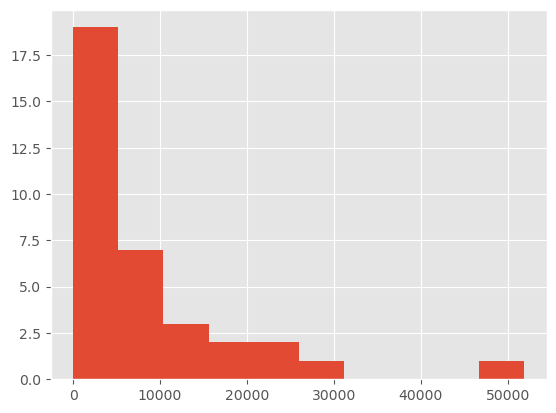

In [45]:
df_monthly.hist()

<AxesSubplot: >

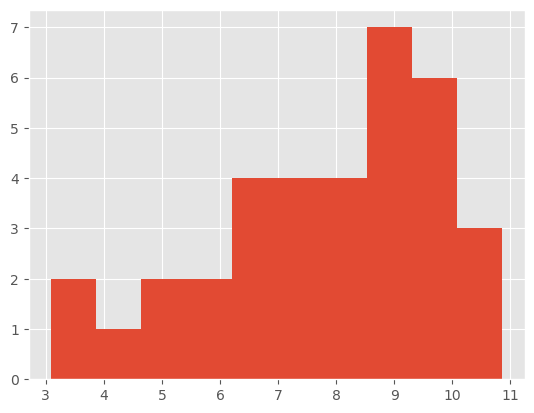

In [46]:
np.log(df_monthly).hist()

In [47]:
df_log = np.log(df_monthly)
df_log.head()

month
2020-03-01     9.172431
2020-04-01    10.192793
2020-05-01    10.158285
2020-06-01     8.939450
2020-07-01     8.869539
Freq: MS, Name: total_laid_off, dtype: float64

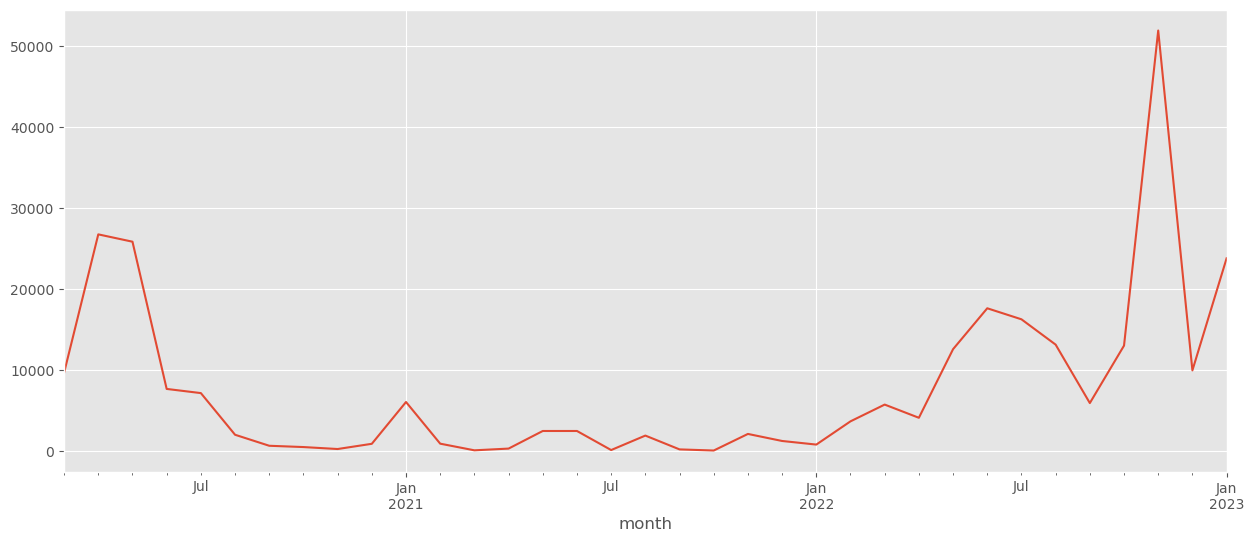

month
2020-03-01     9628.0
2020-04-01    26710.0
2020-05-01    25804.0
2020-06-01     7627.0
2020-07-01     7112.0
Freq: MS, Name: total_laid_off, dtype: float64


In [48]:
df_monthly.plot(figsize=(15, 6))
plt.show()
print(df_monthly.head())

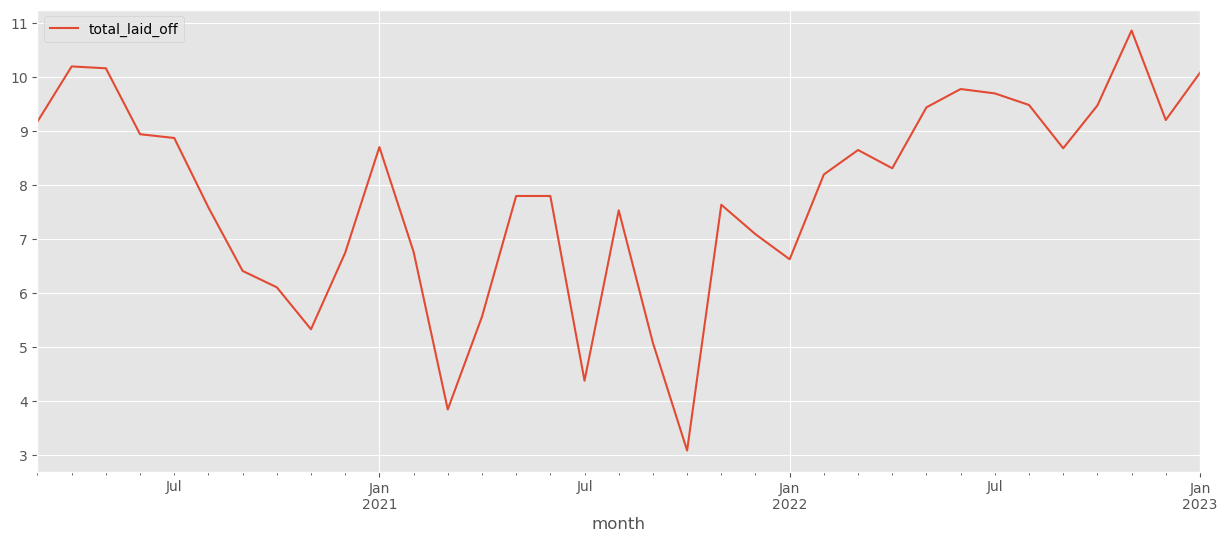

            total_laid_off
month                     
2020-03-01          9628.0
2020-04-01         26710.0
2020-05-01         25804.0
2020-06-01          7627.0
2020-07-01          7112.0


In [180]:
df_log.plot(figsize=(15, 6))
plt.show()
print(df.head())

# Appendix

### Adding Exog

In [203]:
# start date needs to be on or after 3/15/2020
# end date needs to be on or before 12/30/2022
display(df.head())
display(df.tail())
display(df_weekly.head())
display(df_weekly.tail())

date
2020-01-10   -0.0407
2020-01-17    0.1180
2020-01-24   -0.0954
2020-01-31    0.0183
2020-02-07   -0.0943
Freq: W-FRI, Name: bg_posts, dtype: float64

date
2022-12-02   -0.000331
2022-12-09    0.072500
2022-12-16   -0.015000
2022-12-23   -0.049500
2022-12-30   -0.221000
Freq: W-FRI, Name: bg_posts, dtype: float64

day
2020-03-15     109.0
2020-03-22    1315.0
2020-03-29    6400.0
2020-04-05    6643.0
2020-04-12    6652.0
Freq: W-SUN, Name: total_laid_off, dtype: float64

day
2022-12-18     1989.0
2022-12-25      836.0
2023-01-01      150.0
2023-01-08    18392.0
2023-01-15     5358.0
Freq: W-SUN, Name: total_laid_off, dtype: float64

In [204]:
df_layoffs = layoffs[['day', 'total_laid_off']]

# Make sure that index is DatetimeIndex named "date"
if isinstance(df_layoffs.index, pd.DatetimeIndex):
    df_layoffs.index.name = 'date'
else:
    df_layoffs.rename(columns={'index':'date'}, inplace=True)
    df_layoffs.set_index('day', inplace=True)
    
    
df_layoffs = df_layoffs['total_laid_off'].resample('W-FRI').sum()
df_layoffs.head()

day
2020-03-13     109.0
2020-03-20    1315.0
2020-03-27    5473.0
2020-04-03    7480.0
2020-04-10    6742.0
Freq: W-FRI, Name: total_laid_off, dtype: float64

In [205]:
df_postings = df['2020-03-13':]
df_postings.head()

date
2020-03-13    0.0208
2020-03-20    0.0572
2020-03-27   -0.0760
2020-04-03   -0.2180
2020-04-10   -0.3020
Freq: W-FRI, Name: bg_posts, dtype: float64

In [ ]:
df_log_layoffs = df_layoffs[:'2023-01-01']
df_layoffs.tail()

In [214]:
df_log_layoffs = np.log(df_layoffs[:'2023-01-01']).fillna(value=0)

day
2022-12-02    2.143833
2022-12-09    2.167912
2022-12-16    2.031638
2022-12-23    1.906371
2022-12-30    1.611563
Freq: W-FRI, Name: total_laid_off, dtype: float64

In [218]:
mod_exog = sm.tsa.statespace.SARIMAX(endog=df_postings,
                                     exog=df_layoffs,
                                     order=order_52,
                                     seasonal_order=seasonal_order_52).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.87238D-01    |proj g|=  4.61113D-01

At iterate    5    f= -8.15711D-01    |proj g|=  2.05640D-01

At iterate   10    f= -8.15890D-01    |proj g|=  4.44269D-02

At iterate   15    f= -8.15944D-01    |proj g|=  3.65224D-03

At iterate   20    f= -8.15944D-01    |proj g|=  1.77664D-03

At iterate   25    f= -8.15954D-01    |proj g|=  1.91002D-03

At iterate   30    f= -8.15959D-01    |proj g|=  1.20183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

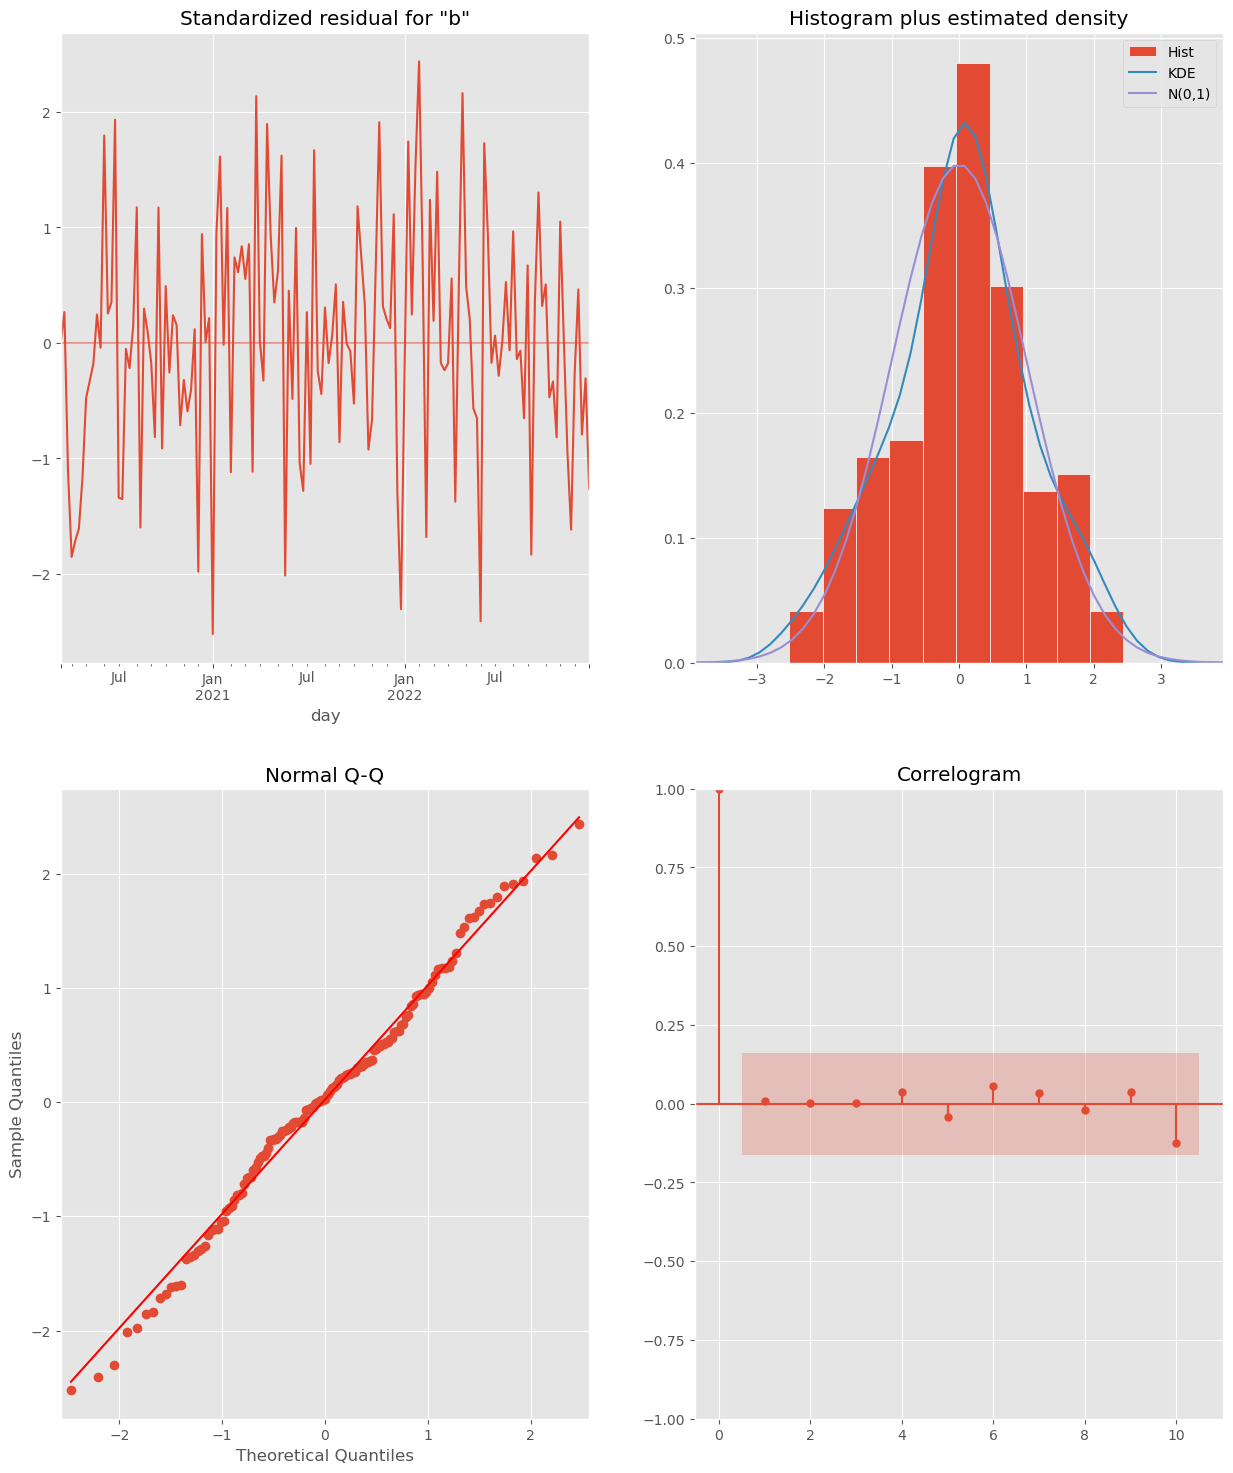

In [219]:
mod_exog.plot_diagnostics(figsize=(15, 18))
plt.show()

In [220]:
mod_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            bg_posts   No. Observations:                  147
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                 119.946
Date:                             Fri, 20 Jan 2023   AIC                           -229.892
Time:                                     17:24:40   BIC                           -214.940
Sample:                                 03-13-2020   HQIC                          -223.817
                                      - 12-30-2022                                         
Covariance Type:                               opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
total_laid_off     0.0130      0.014      0.904      0.366      -0.015       0.041
ar.L1              0.9524      0.026     36.804      0.000       0.902       1.003
ma.L1             -0.4495      0.076     -5.947      0.000      -0.598      -0.301
ar.S.L52           0.2168      0.092      2.348      0.019       0.036       0.398
sigma2             0.0111      0.001      8.208      0.000       0.008       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.92   Prob(JB):                         0.84
Heteroskedasticity (H):               1.00   Skew:                            -0.11
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [225]:
pred = mod_exog.get_prediction(start=pd.to_datetime('2022-01-07'), dynamic=False, exog=df_layoffs['2022-01-07':])
pred_conf = pred.conf_int()

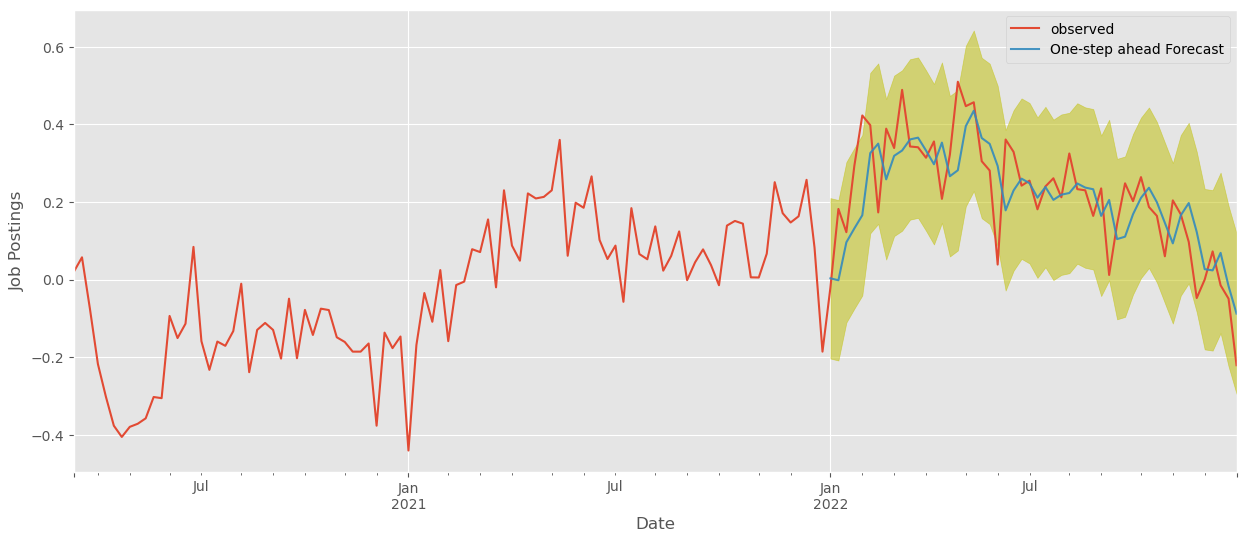

In [226]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6 #matplotlib runtime configuration

# Plot observed values
ax = df_postings.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='y', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Job Postings')
plt.legend()

plt.show()

In [227]:
# Get the real and predicted values
jobs_forecasted = pred.predicted_mean
jobs_truth = df_layoffs['2022-01-07':]

# Compute the mean square error
mse = ((jobs_forecasted - jobs_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3.09


Text(0.5, 1.0, 'Heatmap of Correlation Between Attributes (Including Target)')

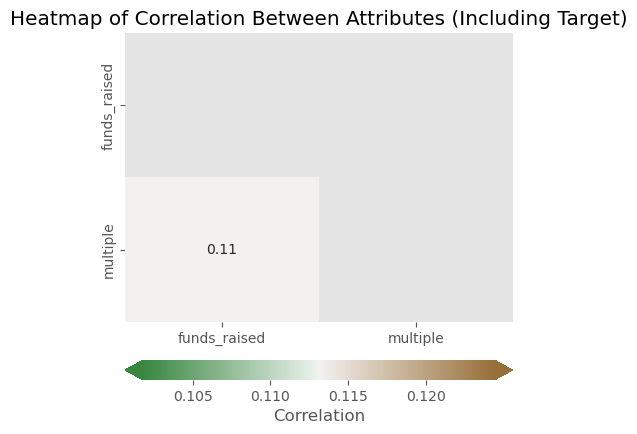

In [1008]:
# check correlations

heatmap_data = pd.concat([X, y], axis=1)
h_corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(5, 5))
mask = np.triu(np.ones_like(h_corr, dtype=bool))
cmap = sns.diverging_palette(130, 50, as_cmap=True)
cbar_kws = {'label': 'Correlation', 'orientation': 'horizontal', 
            'pad': .1, 'extend': 'both'}
sns.heatmap(data=h_corr, mask=mask, ax=ax, annot=True, cbar_kws=cbar_kws, cmap=cmap)
ax.set_title('Heatmap of Correlation Between Attributes (Including Target)')

https://github.com/statsmodels/statsmodels/issues/4284

EXOG ISSUES

In [224]:
forecast = mod_exog.predict(start=df.shape[0], end=df.shape[0] + 8, exog=df_layoffs)
forecast

ValueError: Provided exogenous values are not of the appropriate shape. Required (18, 1), got (147,).

In [221]:
# Get forecast 1yr ahead in future
prediction = mod_exog.get_forecast(steps=52)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [222]:
forecast = mod_exog.forecast(steps=52)

fig, ax = plt.subplots()
ax.plot(df, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title('Job Posting Forecast, 1yr Out')

plt.legend();

ValueError: Provided exogenous values are not of the appropriate shape. Required (52, 1), got (147,).

In [ ]:
    
    # need to add try / except for if row dosnt exist
    
#     for col in cols:
        
#         for var in col_vars:
        
#             if col in info.keys():

#                 var = info[col]

#             else:

#                 var = 'N/A'
                
#             lst.append(var)

# sector = 0
# industry = 0
# fullTimeEmployees = 0
# profitMargins = 0
# earningsGrowth = 0
# earningsQuarterlyGrowth = 0
# recommendationKey = 0
# totalRevenue = 0
# totalCash = 0
# forwardPE = 0
# freeCashflow = 0
# targetMedianPrice = 0

# col_vars = [sector, industry, fullTimeEmployees, profitMargins, 
#             earningsGrowth, earningsQuarterlyGrowth, recommendationKey, 
#             totalRevenue, totalCash, forwardPE, freeCashflow, 
#             targetMedianPrice]
  

#### ARMA Test

In [580]:
data_diff = df.diff().dropna()
data_diff

date
2020-01-17    0.158700
2020-01-24   -0.213400
2020-01-31    0.113700
2020-02-07   -0.112600
2020-02-14    0.299300
                ...   
2022-12-02    0.047469
2022-12-09    0.072831
2022-12-16   -0.087500
2022-12-23   -0.034500
2022-12-30   -0.171500
Freq: W-FRI, Name: bg_posts, Length: 155, dtype: float64

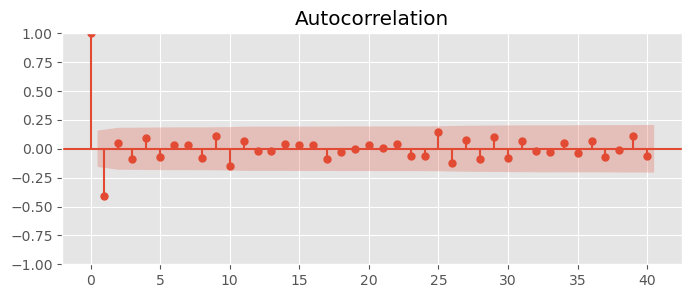

In [594]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=40);

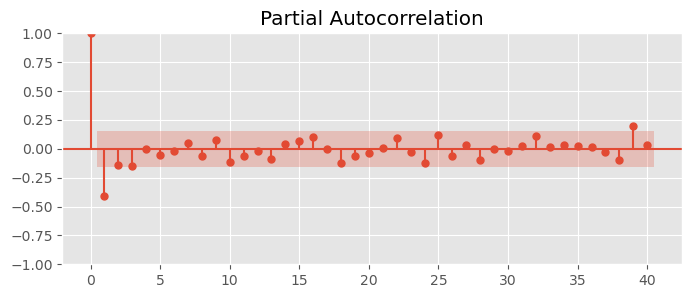

In [595]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=40);

In [592]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,0) model
mod_arma = ARIMA(data_diff, order=(1,1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:               bg_posts   No. Observations:                  155
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  67.705
Date:                Thu, 19 Jan 2023   AIC                           -131.410
Time:                        17:58:28   BIC                           -125.337
Sample:                    01-17-2020   HQIC                          -128.943
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6679      0.058    -11.597      0.000      -0.781      -0.555
sigma2         0.0242      0.003      8.084      0.000       0.018       0.030
Ljung-Box (L1) (Q):                  10.48   Jarque-

In [601]:
# Fit an ARMA(1,0) model
mod_arma = ARIMA(data_diff, order=(0,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:               bg_posts   No. Observations:                  155
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 120.994
Date:                Thu, 19 Jan 2023   AIC                           -235.987
Time:                        18:03:07   BIC                           -226.857
Sample:                    01-17-2020   HQIC                          -232.279
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.004     -0.172      0.863      -0.009       0.008
ma.L1         -0.5080      0.064     -7.903      0.000      -0.634      -0.382
sigma2         0.0123      0.001      8.909      0.0